In [1]:
import array
import random
import json

import numpy as np

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#@title Defining bounds for the Map
min_bounds = 0
max_bounds = 100
destinations = 22

random.seed(222)

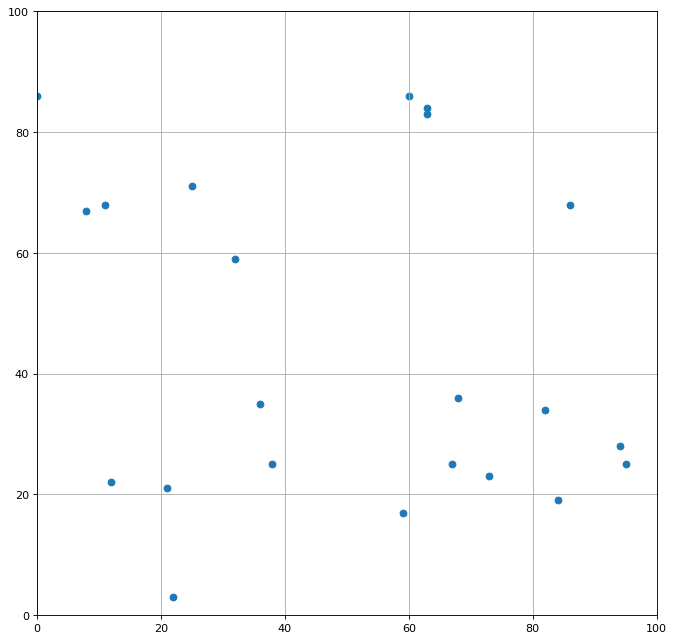

In [3]:
#@title Plotting Random Individual on Map
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
map = np.random.randint(min_bounds,max_bounds, size=(destinations,2))

plt.scatter(map[:,0], map[:,1])
axes = plt.gca()
axes.set_xlim([min_bounds,max_bounds])
axes.set_ylim([min_bounds,max_bounds])
plt.grid()

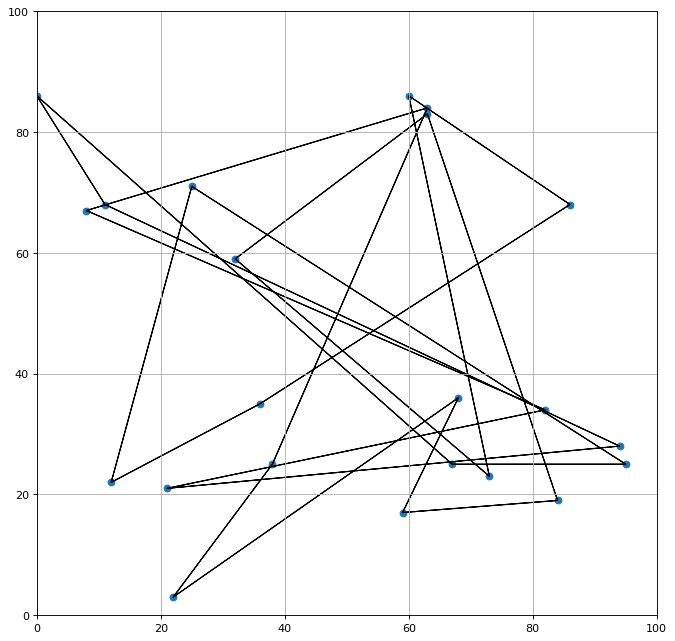

In [4]:
def linear_path(map):
  path = []
  for i,pt in enumerate(map):
    path.append(i)
  return path

path = linear_path(map)

def draw_path(path):
  figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
  prev_pt = None
  plt.scatter(map[:,0], map[:,1])
  for i in path:
    pt = map[i]
    if prev_pt is not None:
      plt.arrow(pt[0],pt[1], prev_pt[0]-pt[0], prev_pt[1]-pt[1])
    else:
      start_pt = pt
    prev_pt = pt
  plt.arrow(pt[0],pt[1], start_pt[0]-pt[0], start_pt[1]-pt[1])
  axes = plt.gca()
  axes.set_xlim([min_bounds,max_bounds])
  axes.set_ylim([min_bounds,max_bounds])
  plt.grid()
  plt.show()

draw_path(path)

In [5]:
#@title Evaluating the Path Fitness
import math
def evaluate_path(path):
  prev_pt = None
  distance = 0
  for i in path:
    pt = map[i]
    if prev_pt is not None:
      distance += math.sqrt((prev_pt[0]-pt[0]) ** 2 + (prev_pt[1]-pt[1]) ** 2)
    else:
      start_pt = pt
    prev_pt = pt
  distance += math.sqrt((start_pt[0]-pt[0]) ** 2 + (start_pt[1]-pt[1]) ** 2)
  return distance,

evaluate_path(path)

(1178.867490888098,)

In [6]:
#@title Creating the Creator
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

In [7]:
#@title Setting up the Toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("indices", random.sample, range(destinations), destinations)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [8]:
#@title Filling the Toolbox
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_path)

In [9]:
#@title Defining the Evolution Function
def eaSimple(population, toolbox, cxpb, mutpb, ngen, stats=None, halloffame=None):
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    print(logbook.stream)
    done = False

    # Begin the generational process
    for gen in range(1, ngen + 1):
        if done: return
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        offspring = [toolbox.clone(ind) for ind in offspring]

        # Apply crossover and mutation on the offspring
        for i in range(1, len(offspring), 2):
            if random.random() < cxpb:
                offspring[i - 1], offspring[i] = toolbox.mate(offspring[i - 1],
                                                              offspring[i])
                del offspring[i - 1].fitness.values, offspring[i].fitness.values

        for i in range(len(offspring)):
            if random.random() < mutpb:
                offspring[i], = toolbox.mutate(offspring[i])
                del offspring[i].fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)

        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)
            draw_path(halloffame[0])

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        print(logbook.stream)

gen	nevals	avg    	std    	min    	max    
0  	500   	1152.64	97.7074	883.871	1414.74


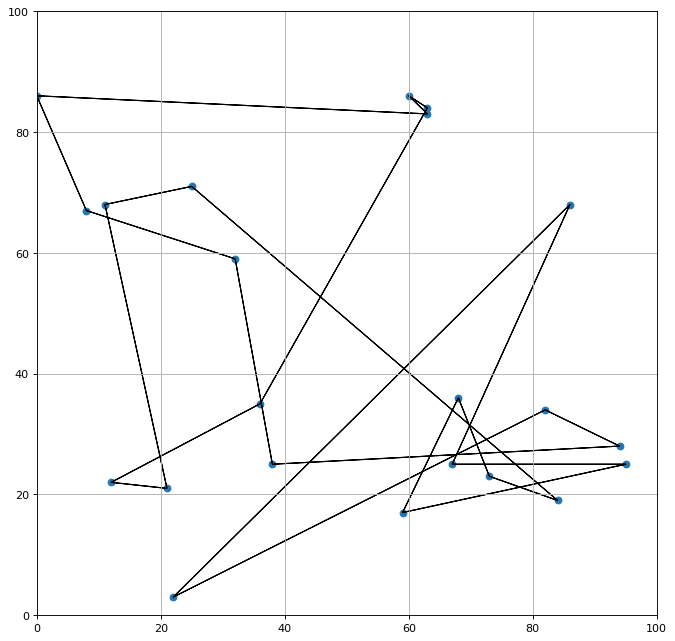

1  	400   	1094.76	92.5068	771.467	1395.27


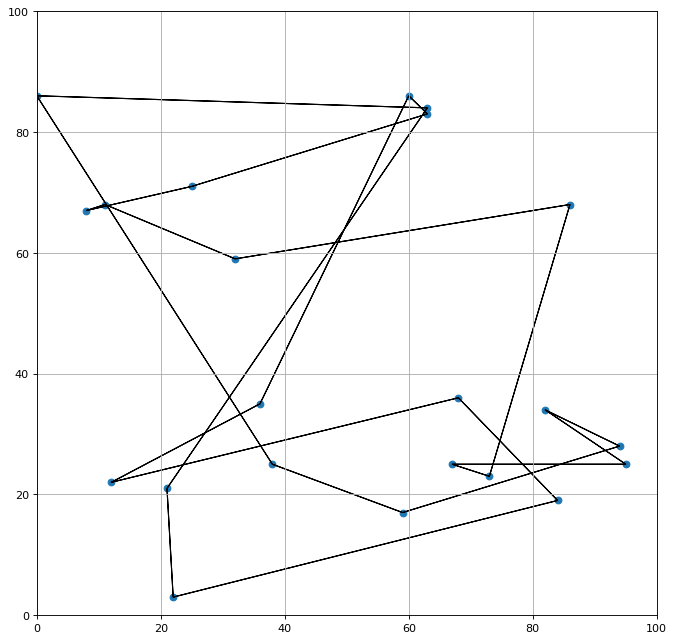

2  	393   	1065.13	102.608	769.267	1387.18


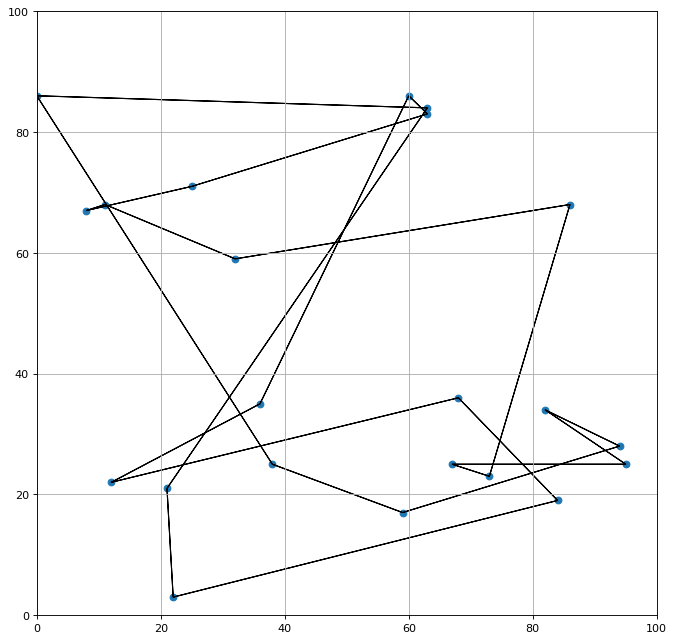

3  	404   	1052.21	107.997	805.669	1353.81


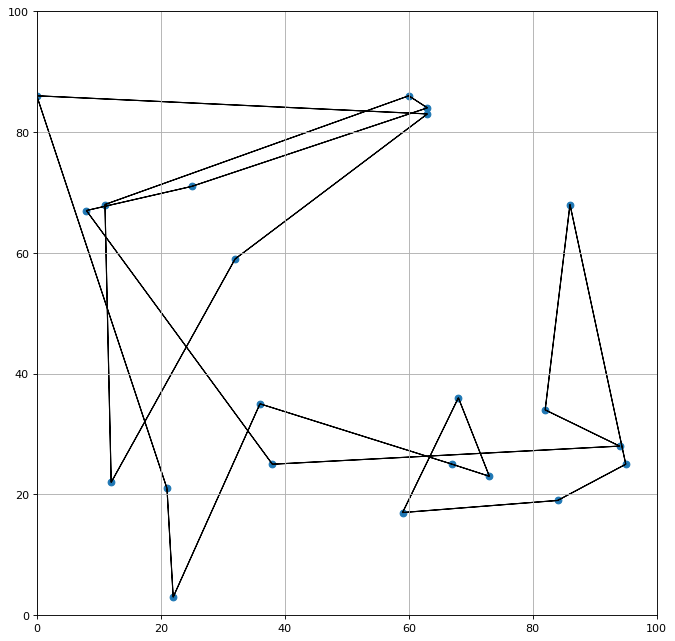

4  	400   	1034.93	112.465	735.781	1332.31


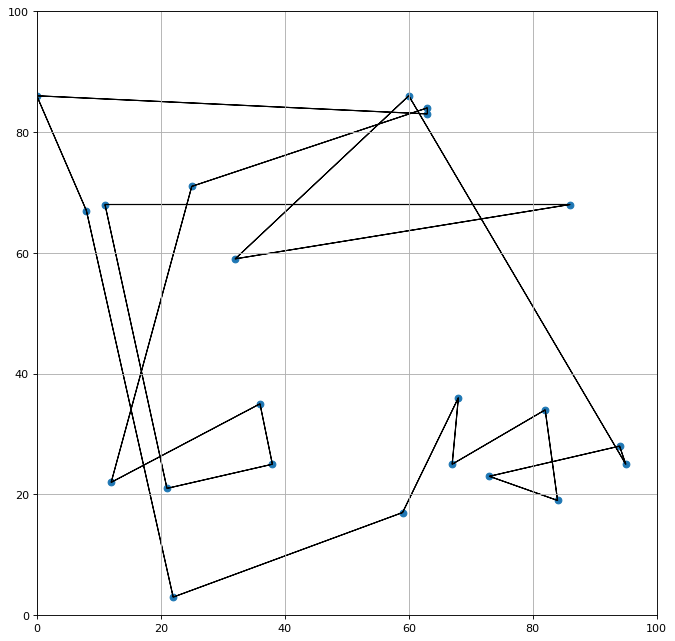

5  	370   	1017.49	114.633	723.745	1383.36


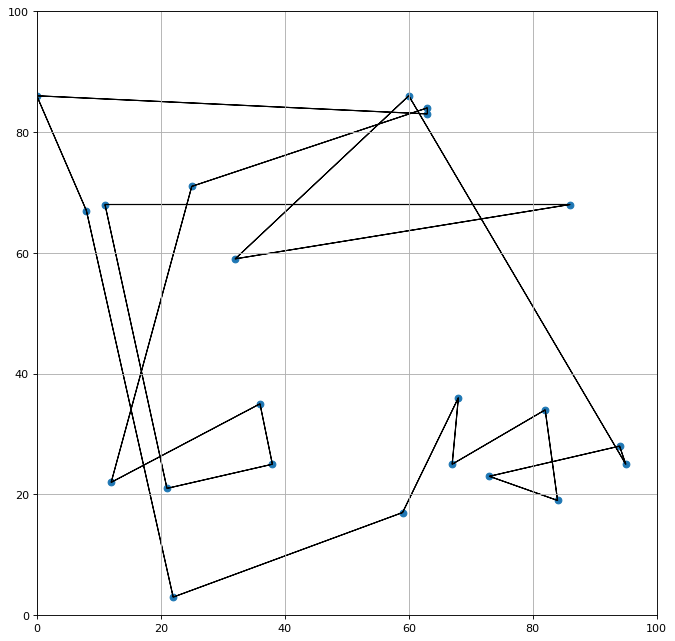

6  	393   	1001.45	114.679	733.631	1315.18


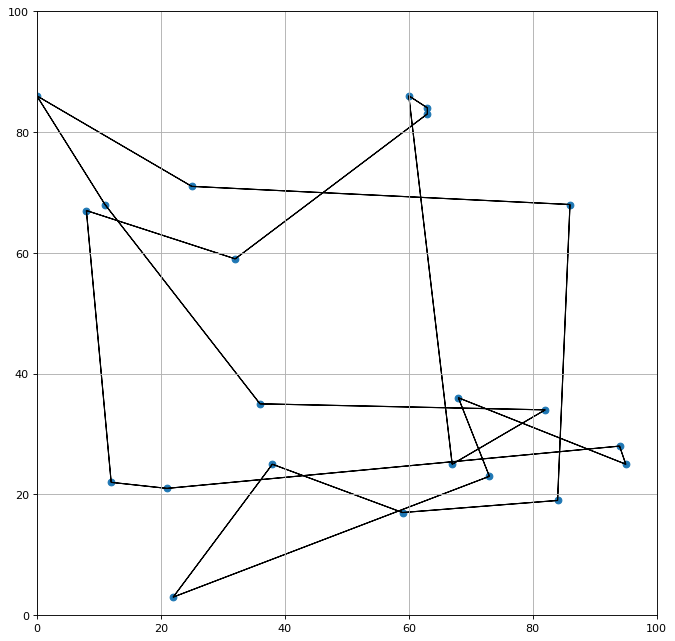

7  	388   	986.313	116.667	699.127	1360.95


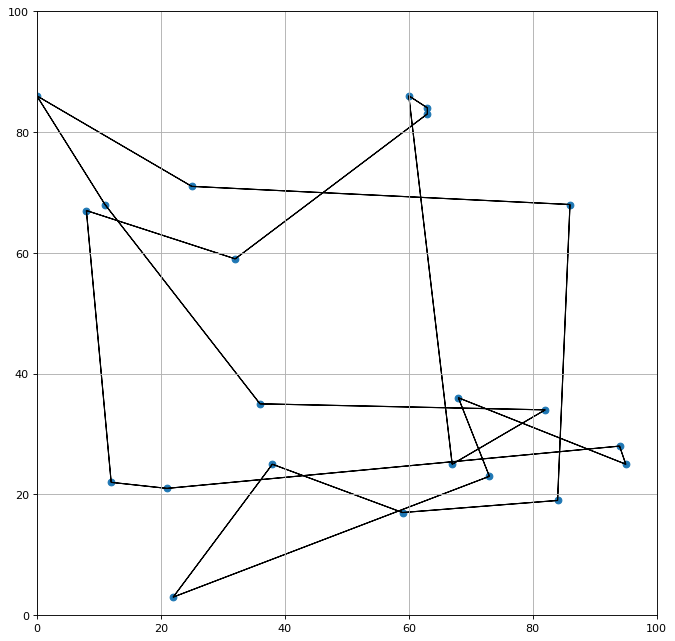

8  	402   	987.512	125.828	721.858	1329.4 


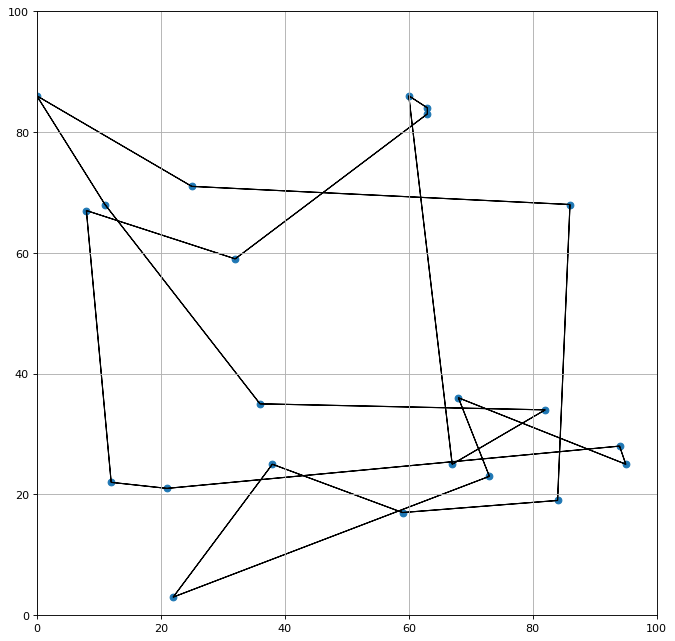

9  	393   	985.359	128.158	721.858	1419.71


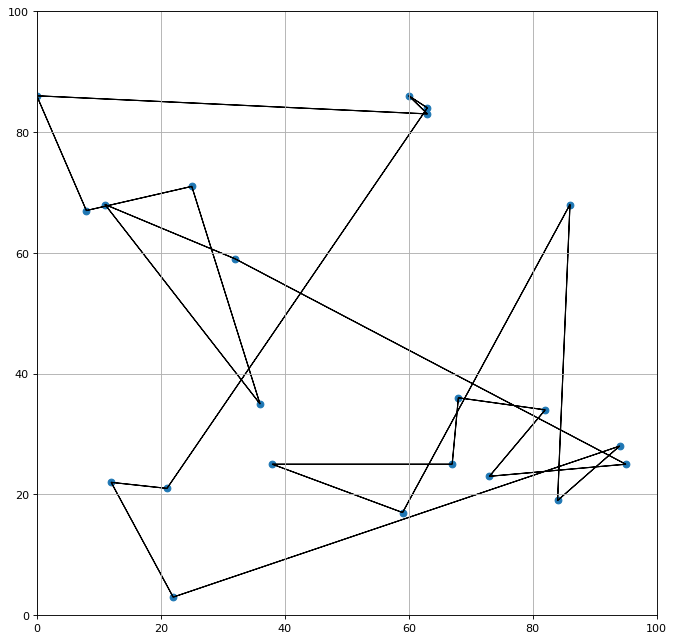

10 	405   	984.771	125.946	698.103	1342.16


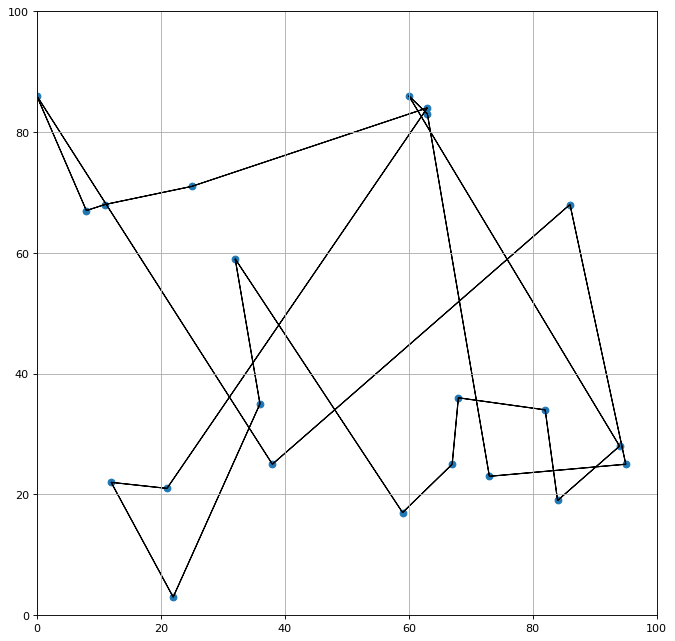

11 	393   	973.544	129.434	693.413	1376.96


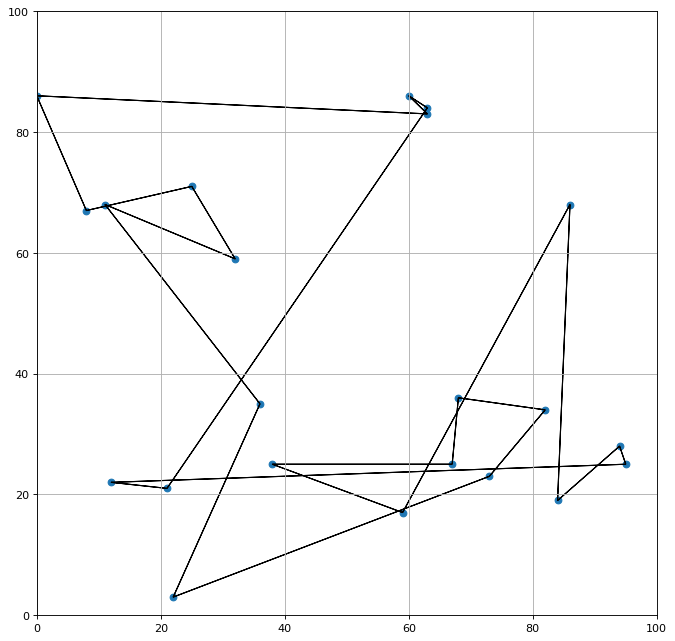

12 	405   	965.749	128.552	658.911	1333.17


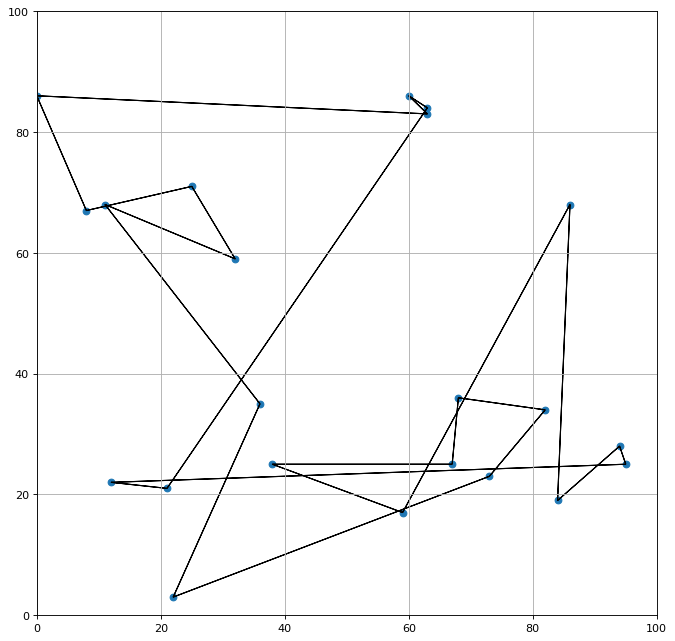

13 	376   	958.269	132.101	658.911	1336.46


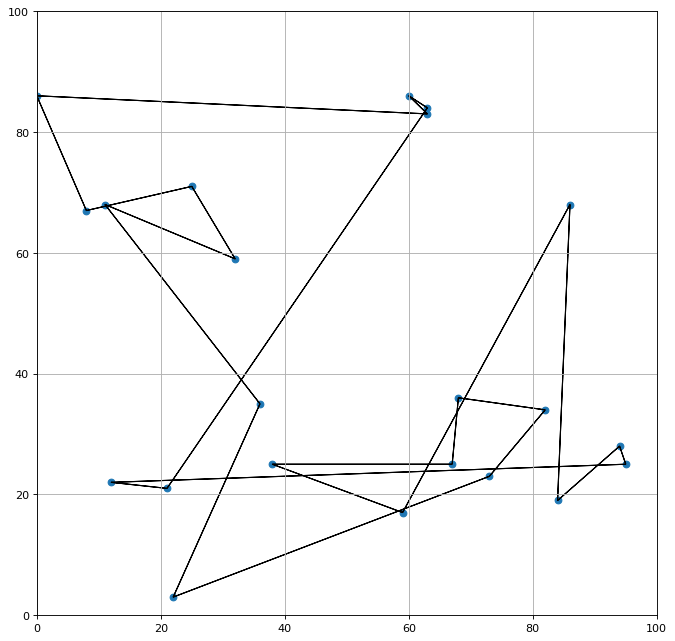

14 	400   	952.942	129.421	664.848	1264.07


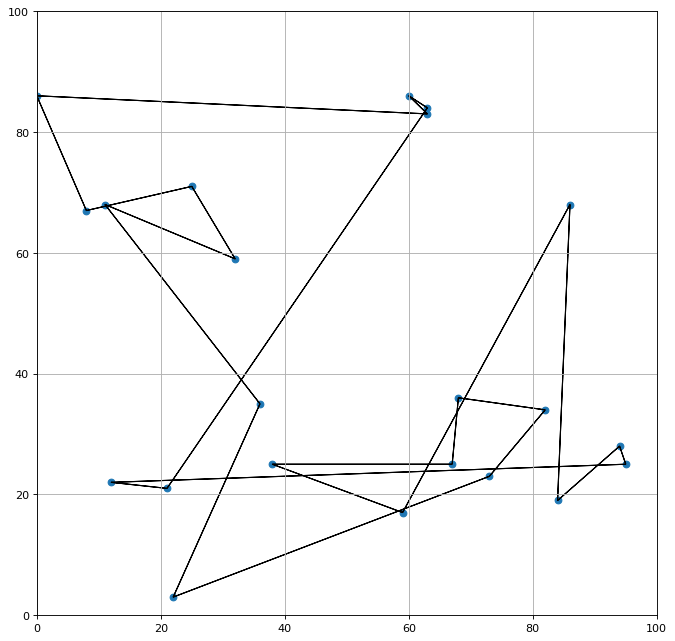

15 	408   	956.887	129.947	678.895	1397.78


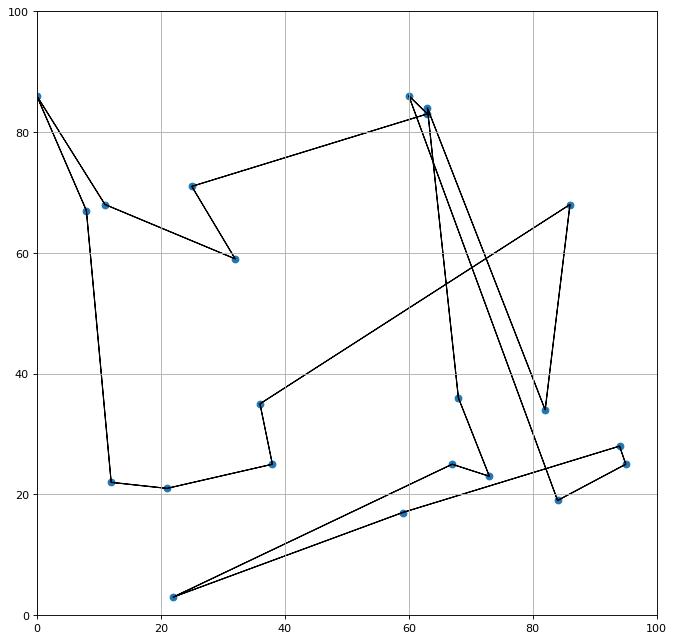

16 	377   	925.607	124.017	633.78 	1311.3 


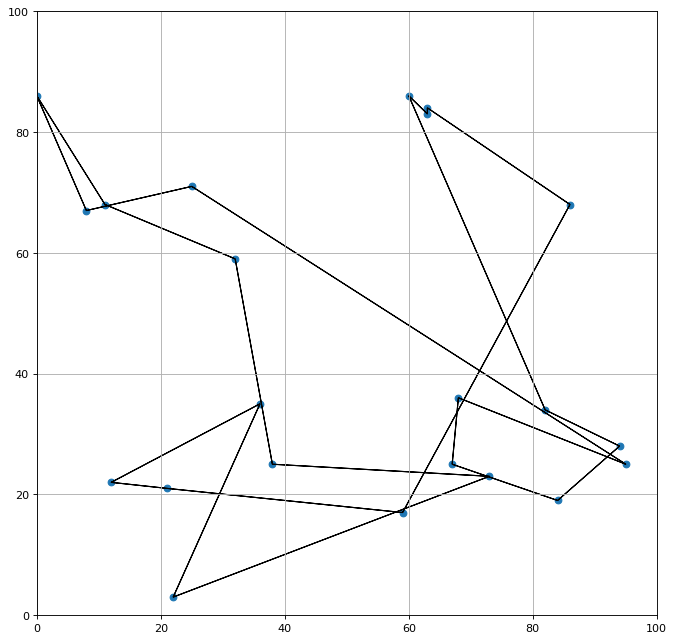

17 	390   	923.435	130.089	632.163	1312.87


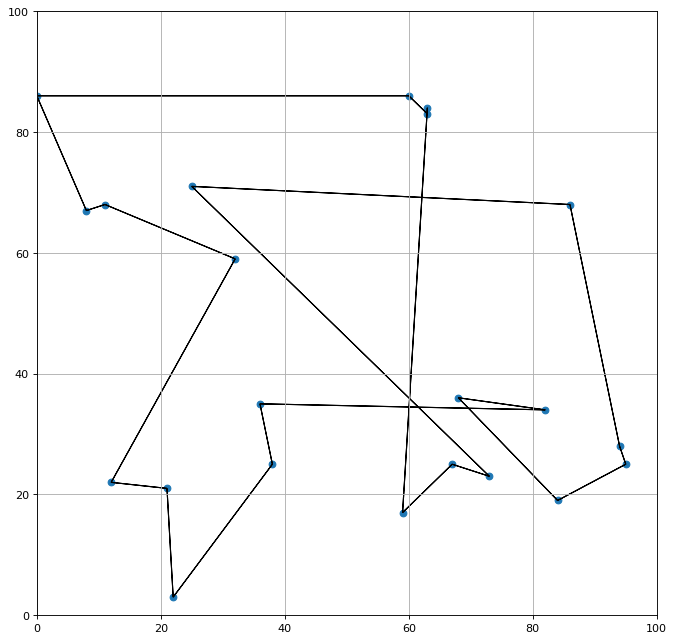

18 	395   	909.635	130.353	572.108	1374.06


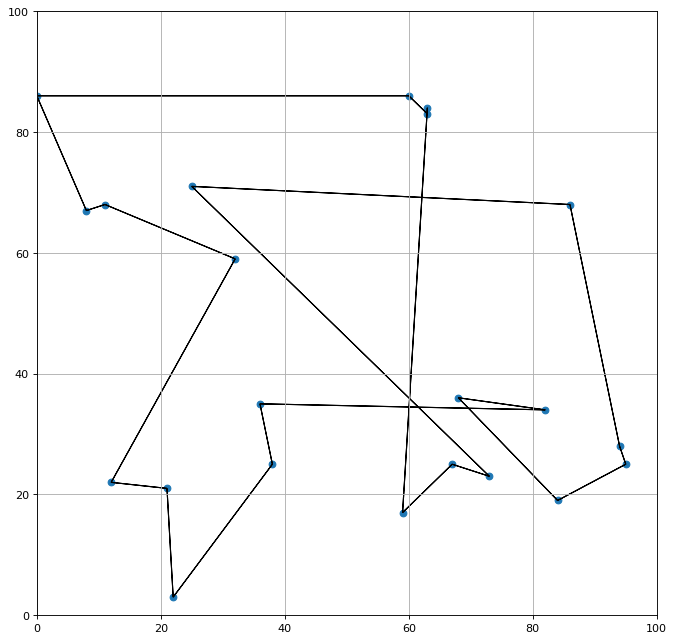

19 	391   	900.961	124.631	576.991	1316   


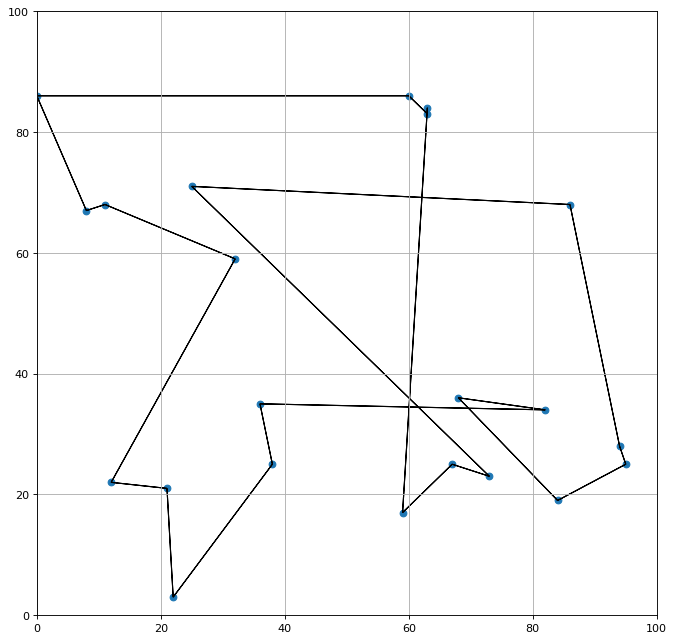

20 	409   	896.106	121.137	599.308	1313.14


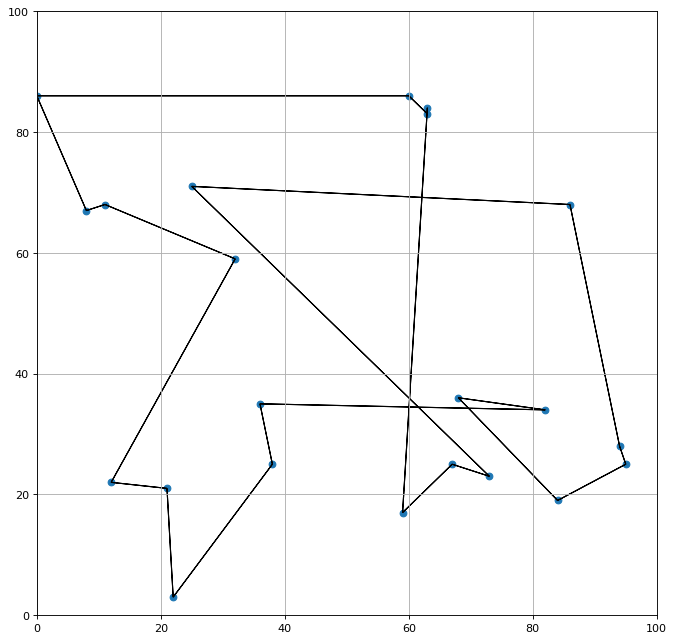

21 	429   	896.381	128.595	599.308	1372.09


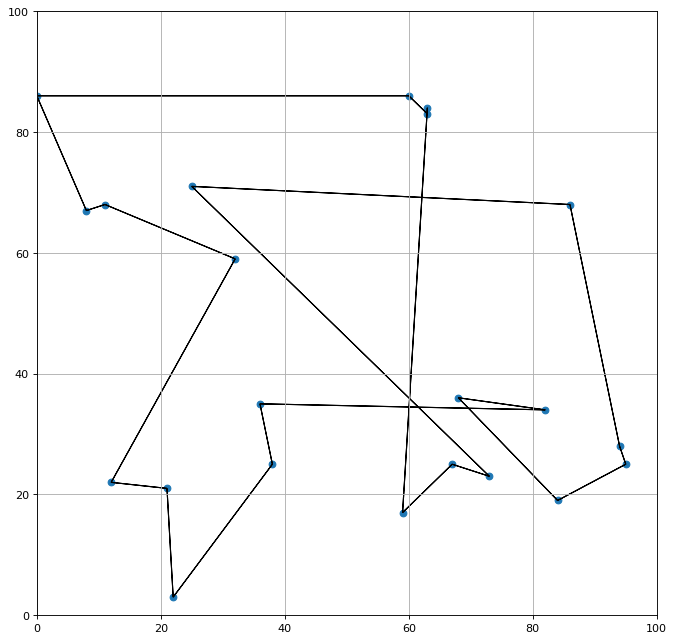

22 	402   	890.607	134.577	599.308	1319.03


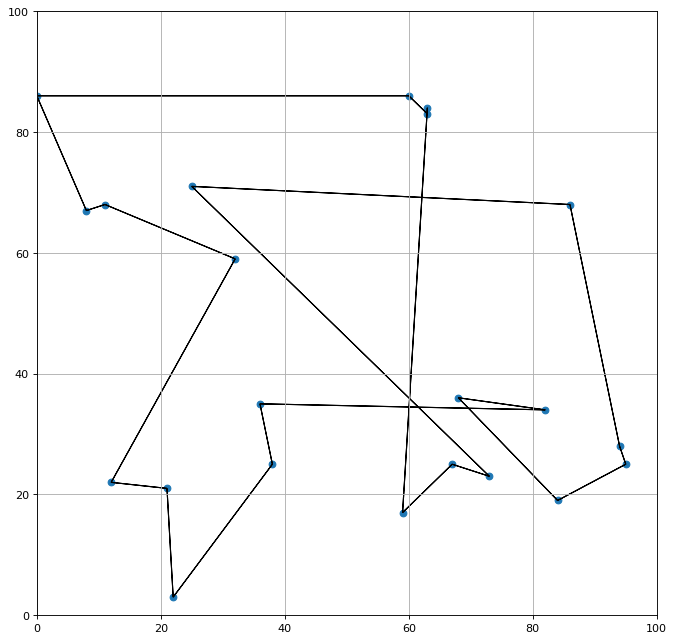

23 	390   	878.731	134.152	582.871	1311.41


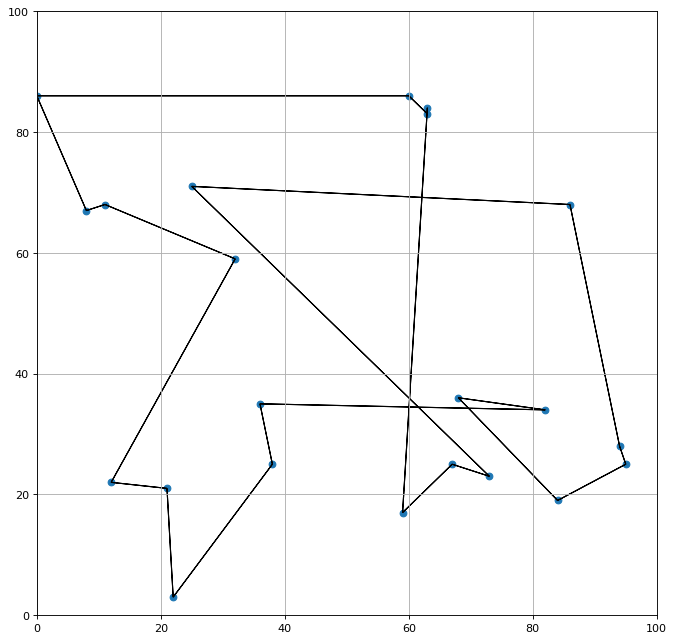

24 	402   	869.695	136.323	599.165	1347.69


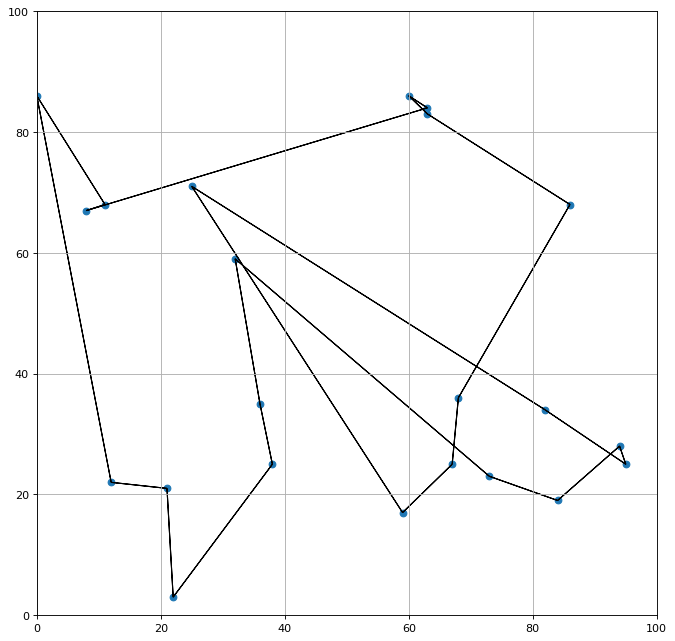

25 	385   	855.454	135.786	560.599	1279.96


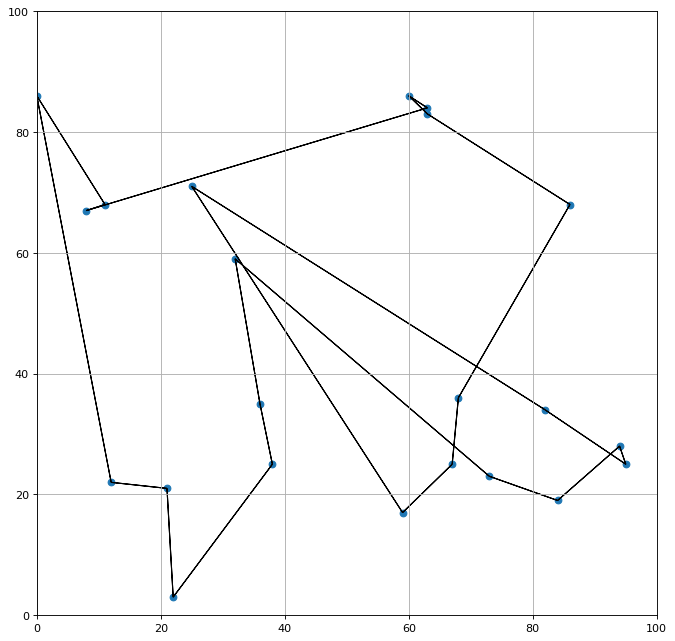

26 	401   	845.518	127.908	560.599	1236.44


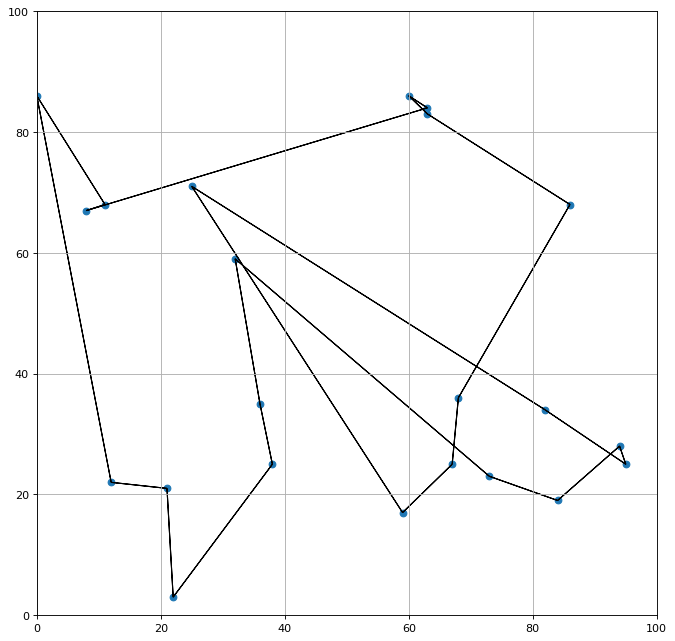

27 	411   	840.731	132.873	560.599	1288.3 


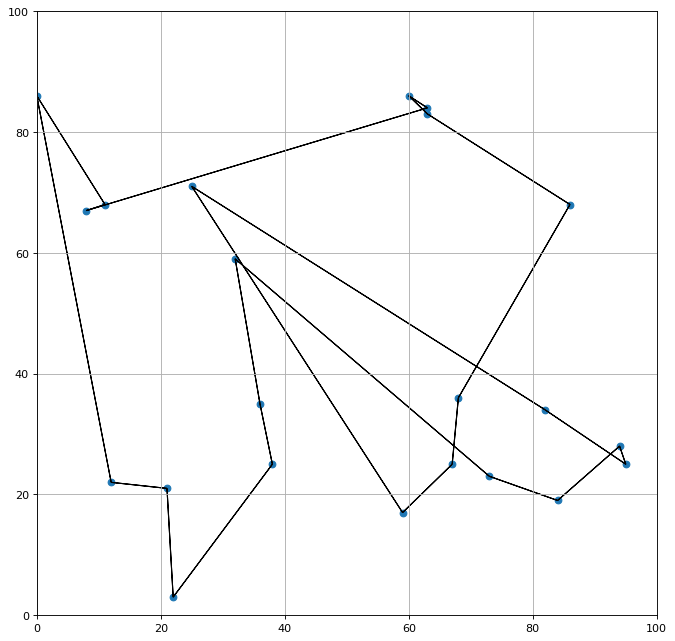

28 	406   	821.394	132.747	560.599	1279.5 


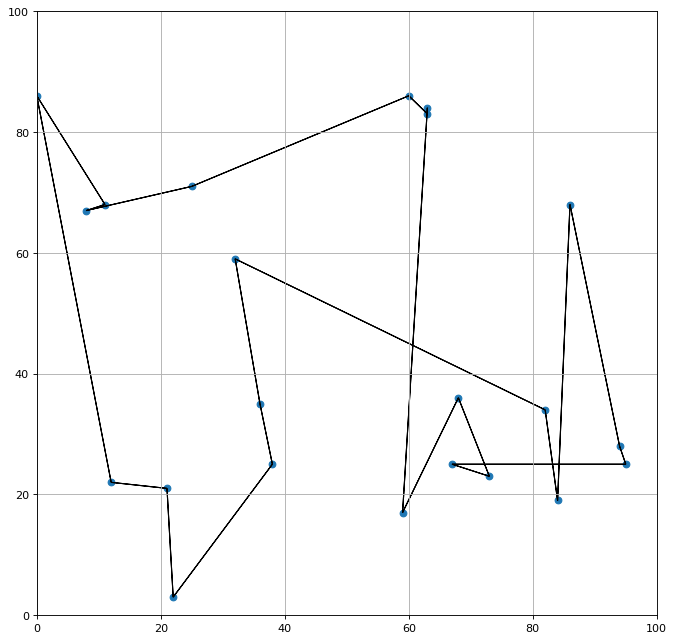

29 	378   	793.329	132.188	539.399	1224.31


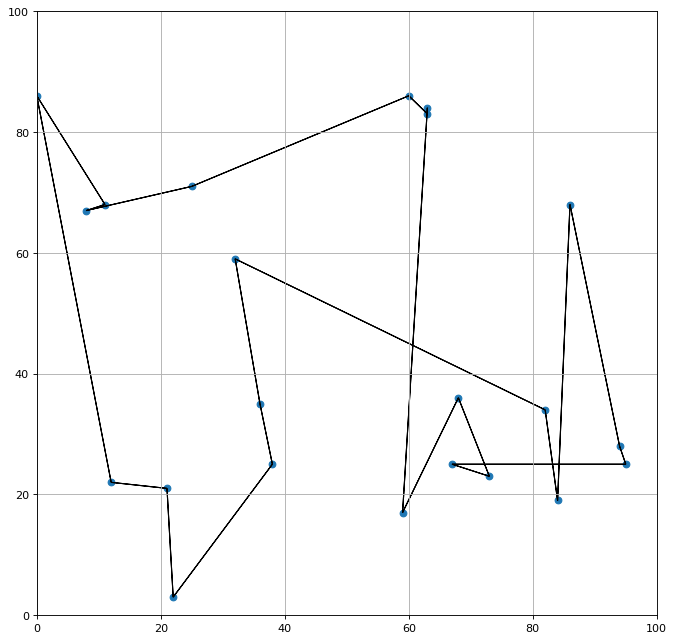

30 	402   	773.946	135.636	549.232	1261.87


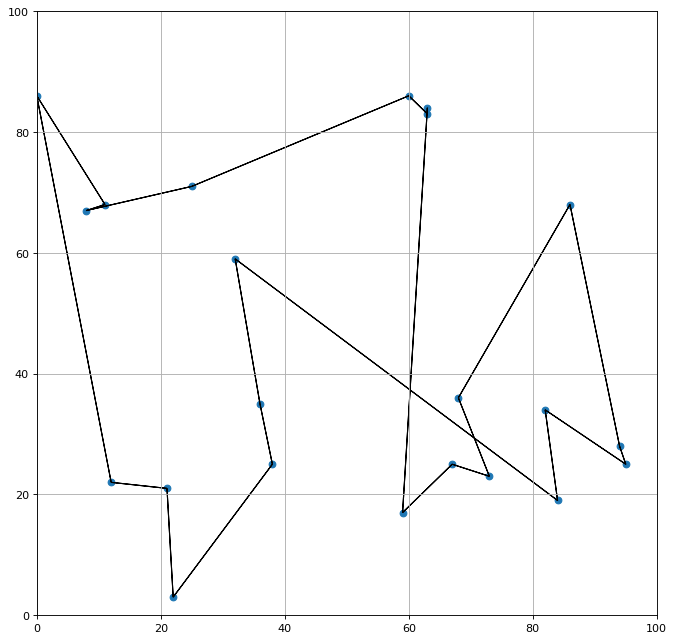

31 	376   	729.181	128.382	514.878	1287.73


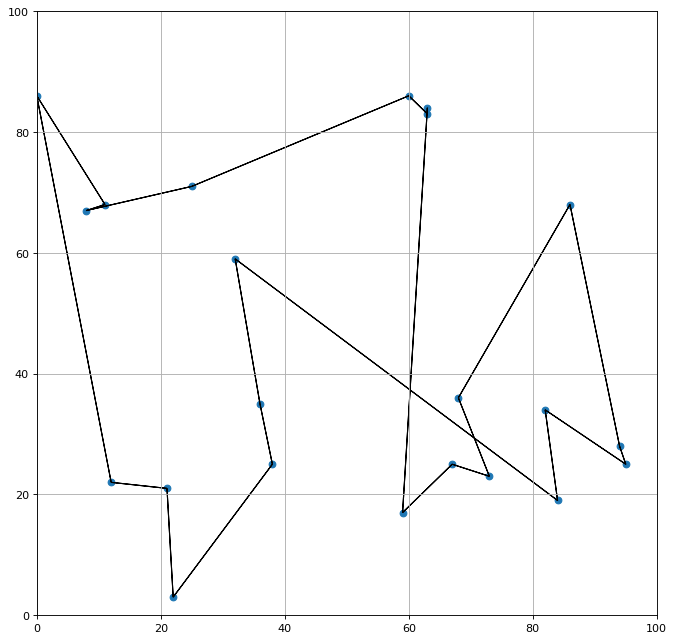

32 	390   	705.169	115.586	514.878	1109.45


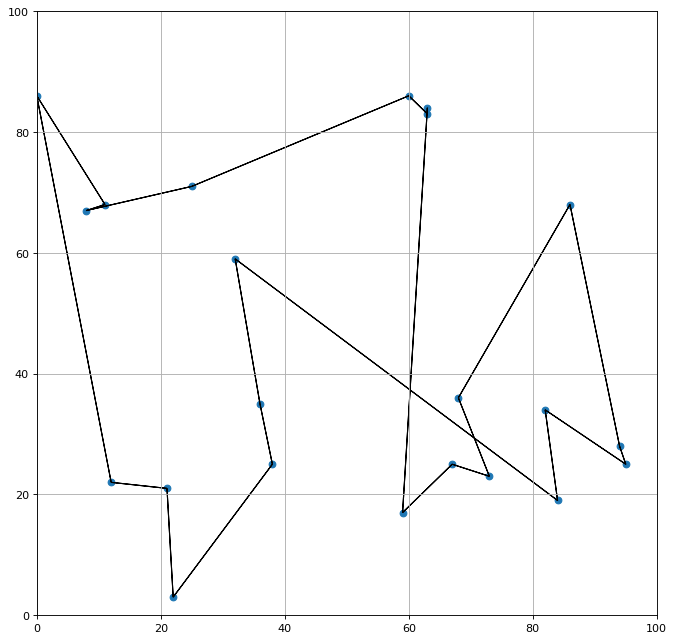

33 	388   	689.582	116.497	514.878	1149.31


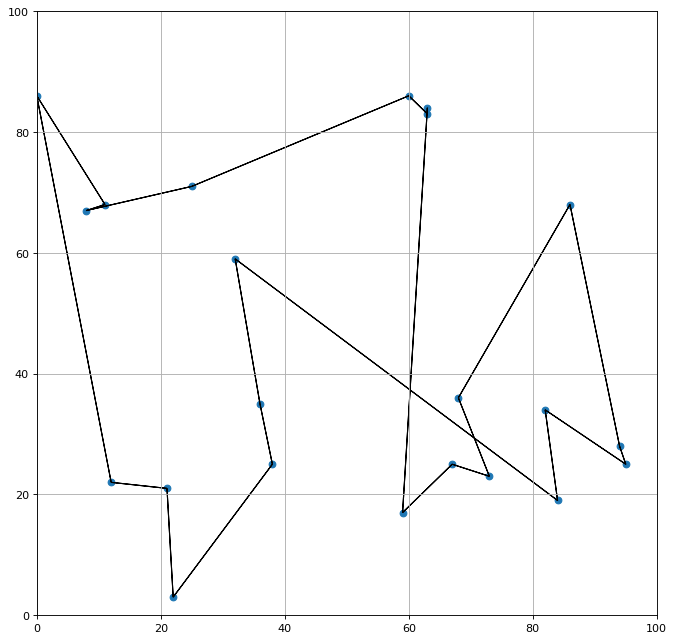

34 	396   	661.494	105.092	514.878	1161.43


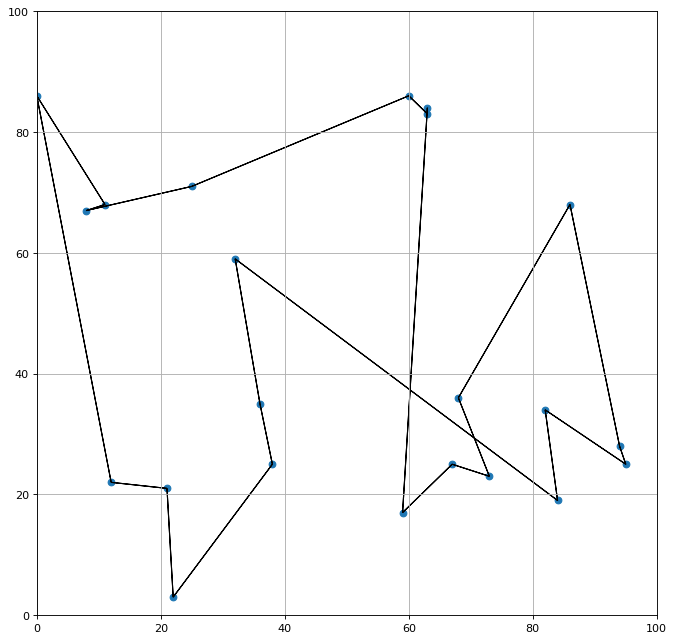

35 	393   	640.708	91.2728	518.753	1158.49


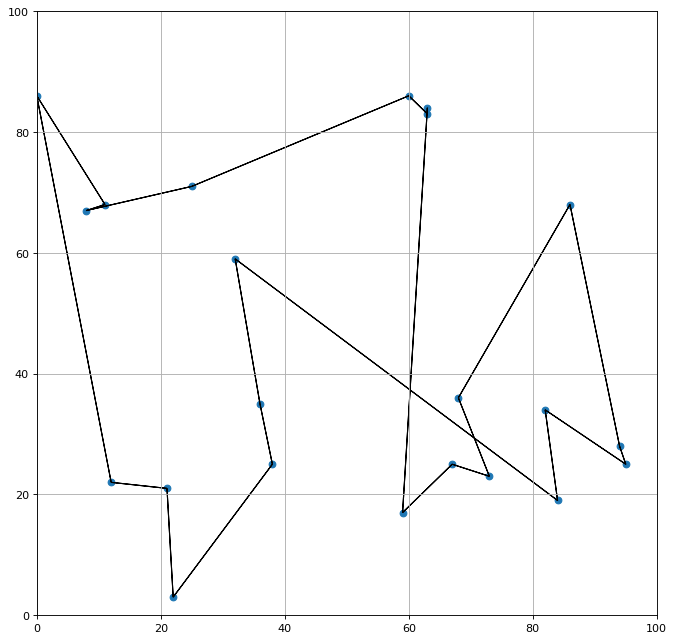

36 	411   	641.153	109.949	514.878	1076.69


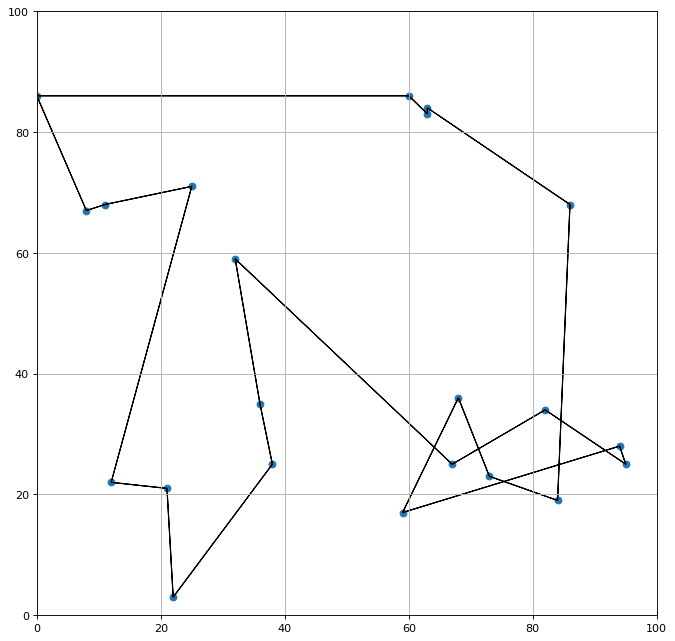

37 	378   	620.448	95.8513	488.514	1083.34


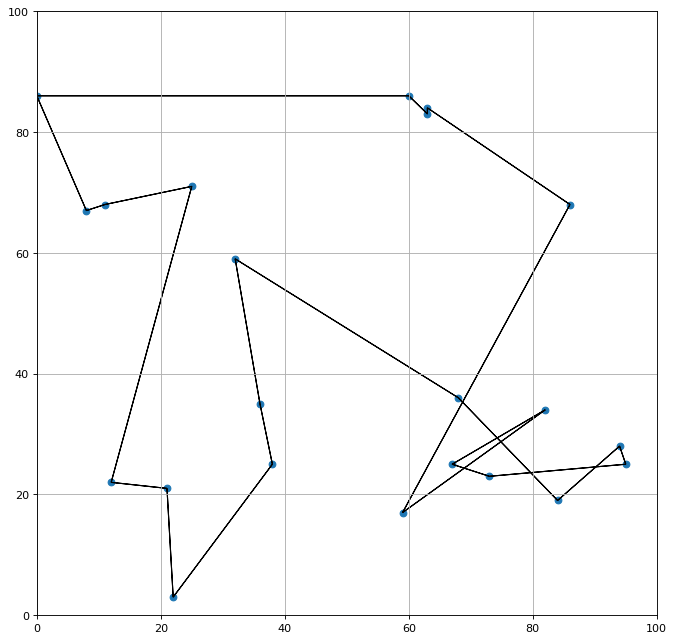

38 	410   	618.138	100.226	485.763	1060.47


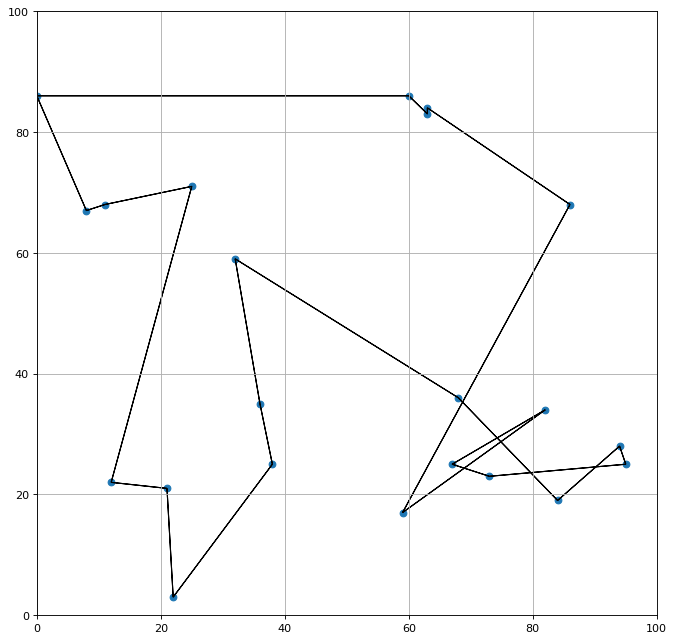

39 	393   	598.455	90.8697	485.763	966.089


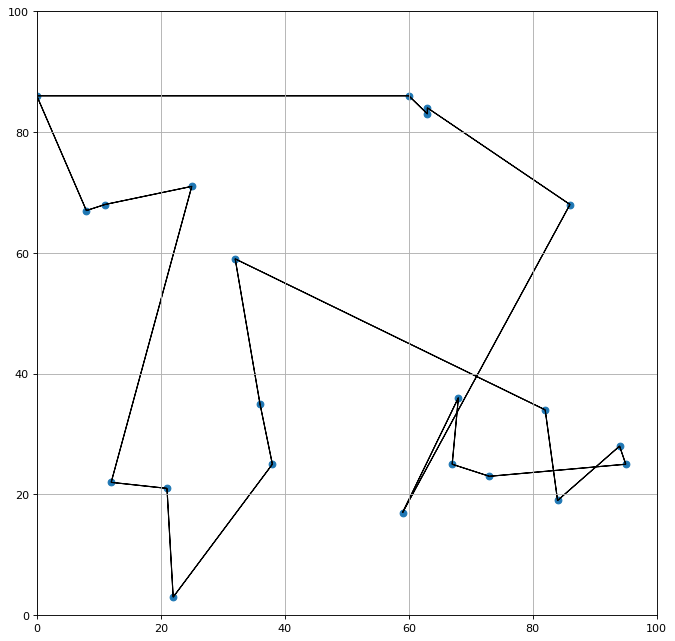

40 	404   	579.545	89.4037	476.707	1003.02


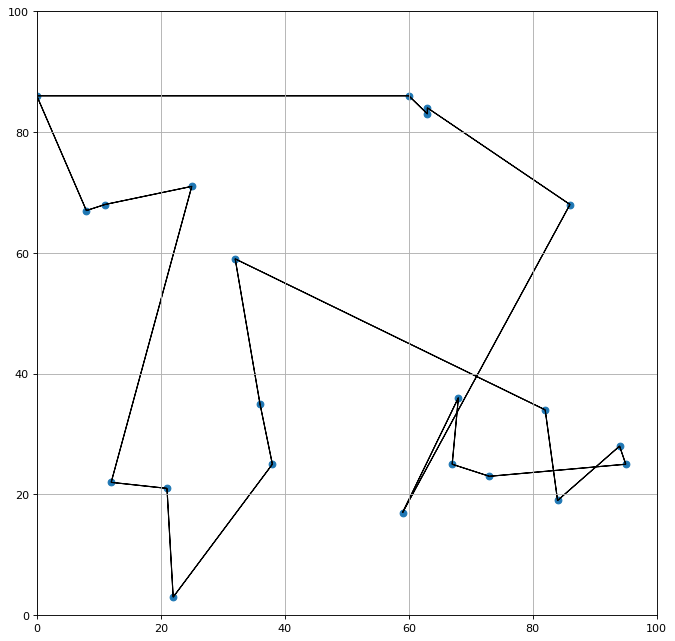

41 	387   	566.411	89.9347	477.702	1146.34


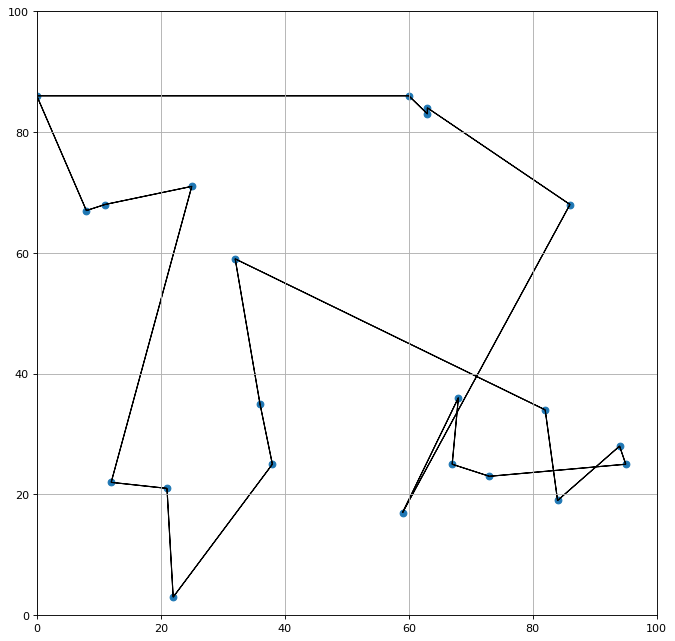

42 	381   	559.29 	95.968 	477.702	1104.47


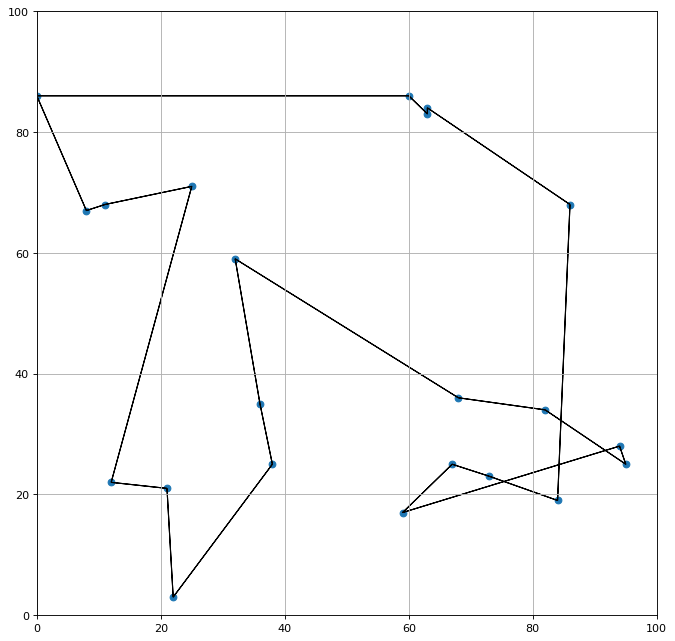

43 	410   	556.209	95.2224	461.774	1023.5 


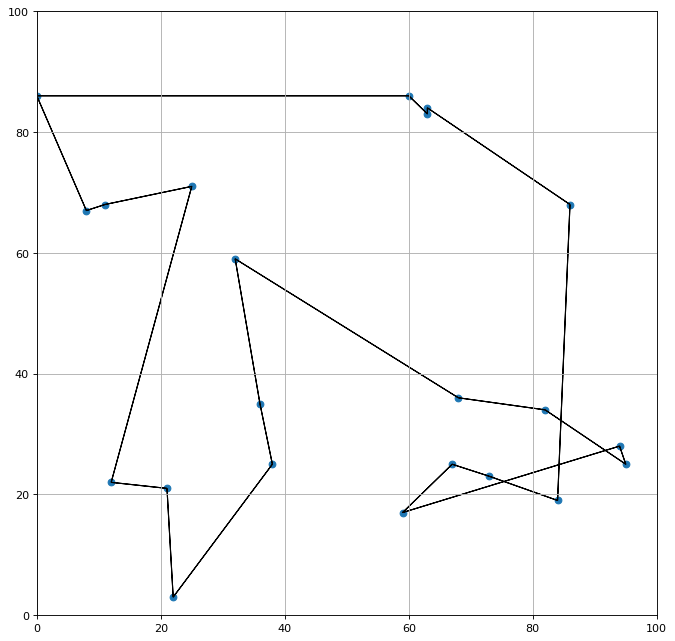

44 	383   	544.487	87.8884	461.774	1034.6 


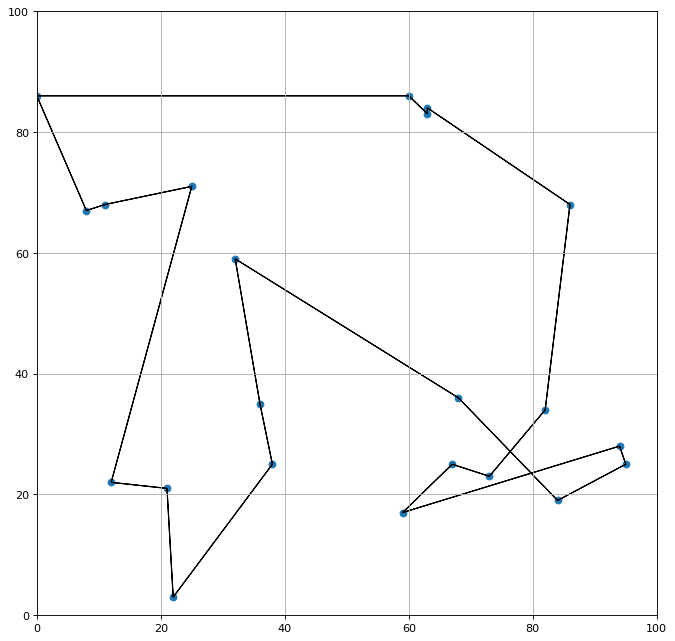

45 	374   	542.844	95.5275	455.397	1219.01


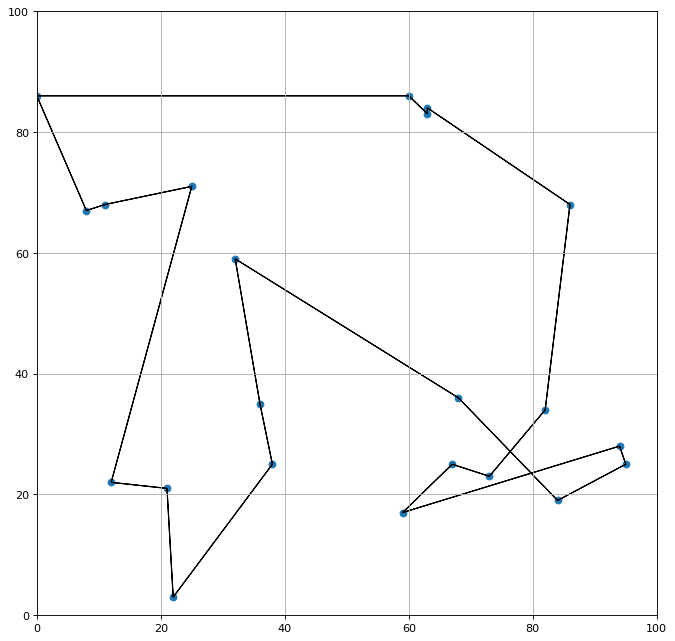

46 	395   	536.492	87.7299	455.397	969.182


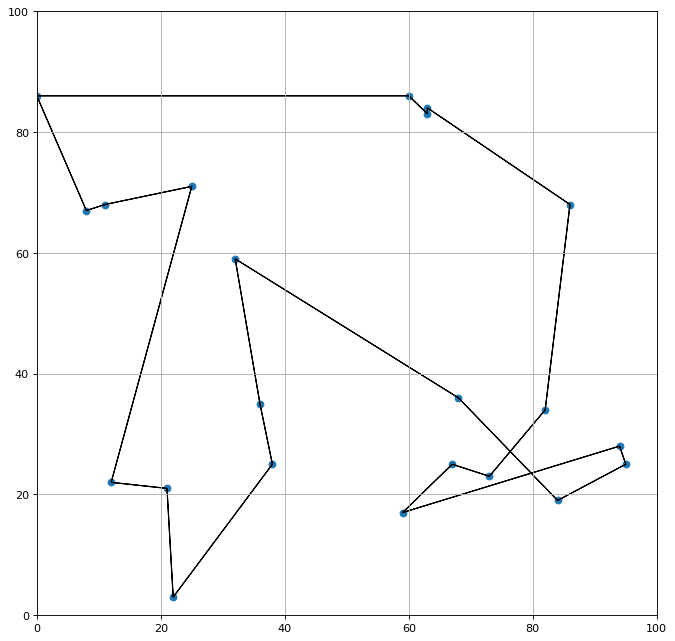

47 	386   	532.835	91.3096	455.397	1078.57


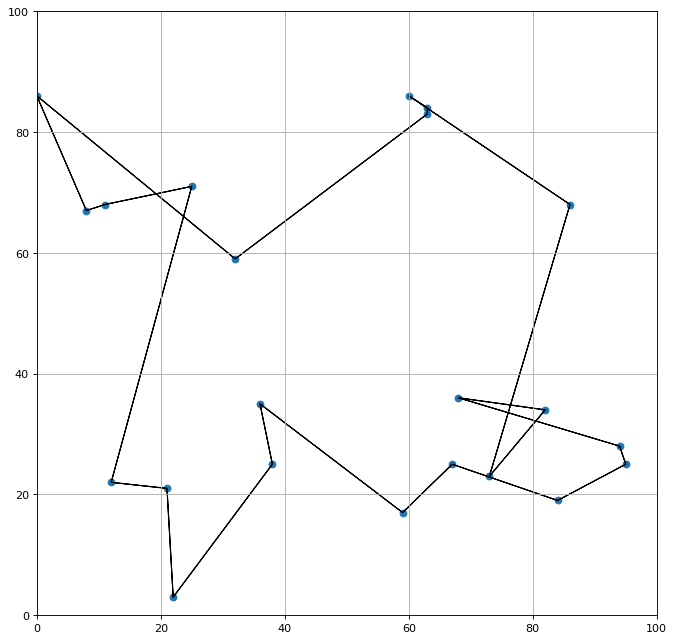

48 	404   	528.484	93.6261	447.214	1104.34


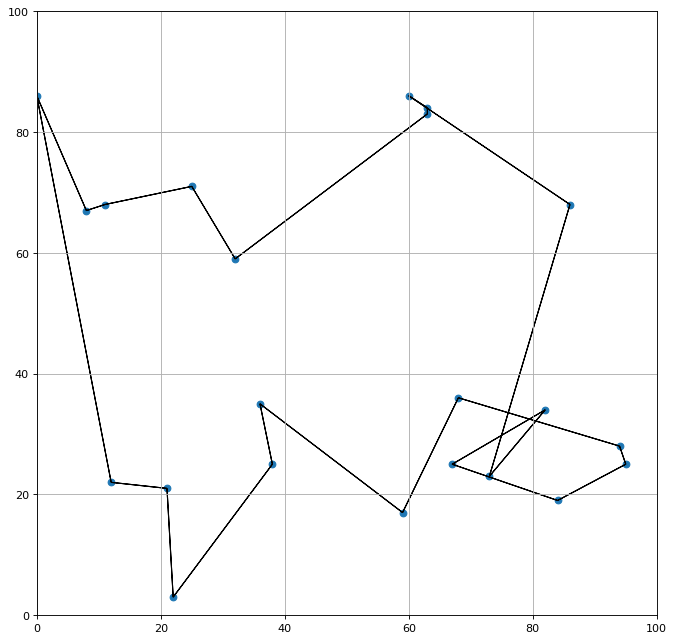

49 	400   	522.617	90.7542	446.719	1009.88


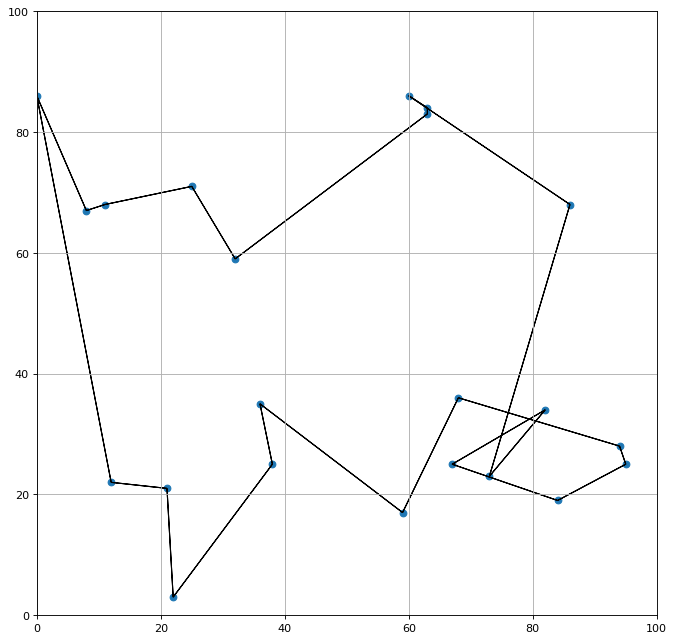

50 	409   	528.789	103.859	446.719	1018.97


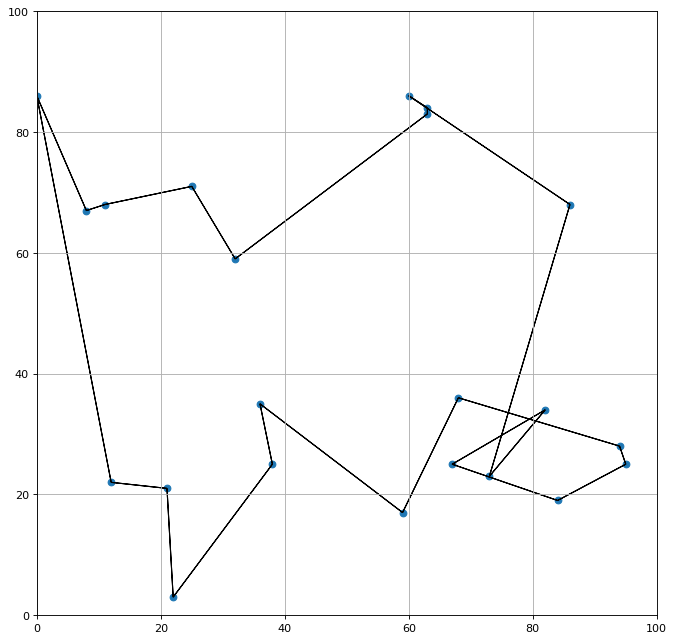

51 	399   	516.108	84.1381	446.719	944.622


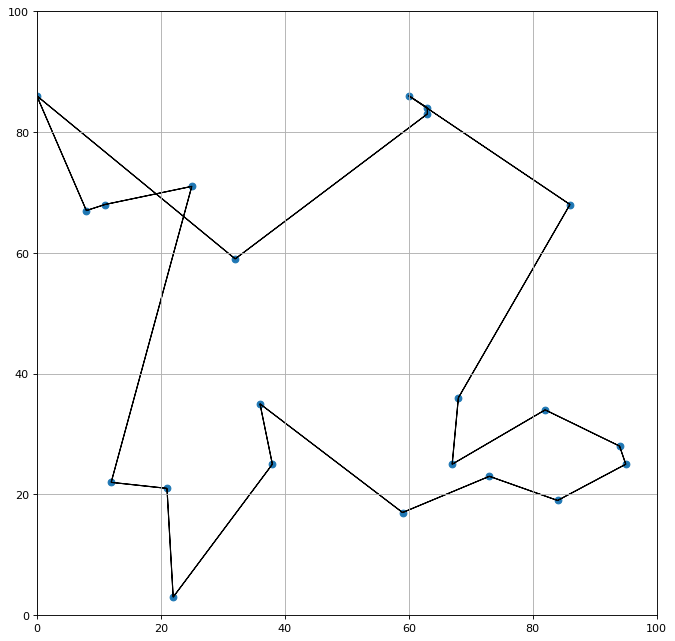

52 	408   	518.509	95.5131	421.081	1098.52


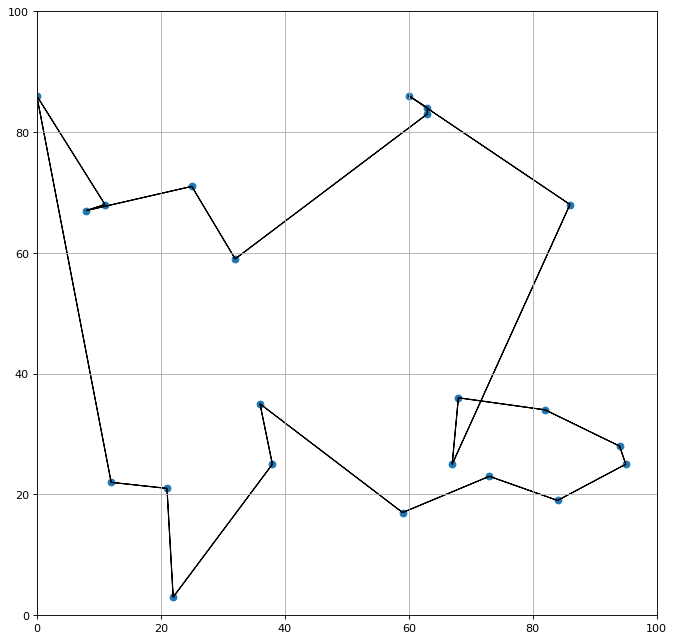

53 	403   	520.676	111.019	418.096	1274.39


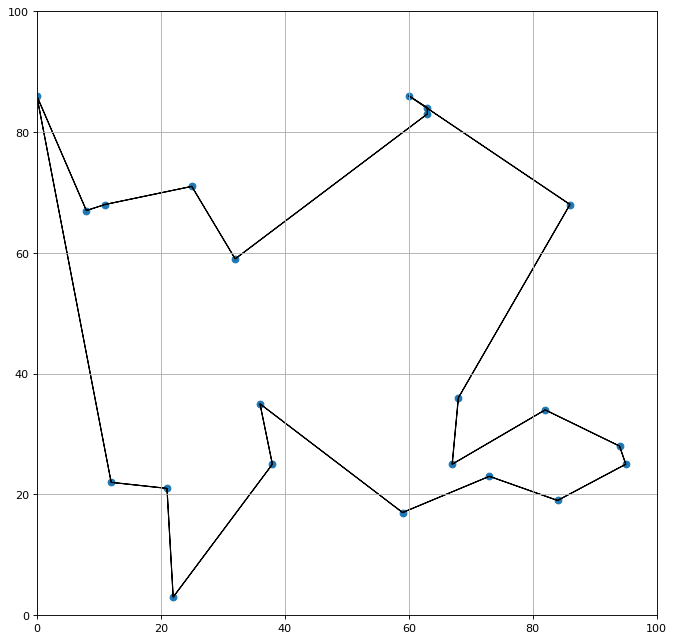

54 	392   	503.431	94.0346	407.525	1087.34


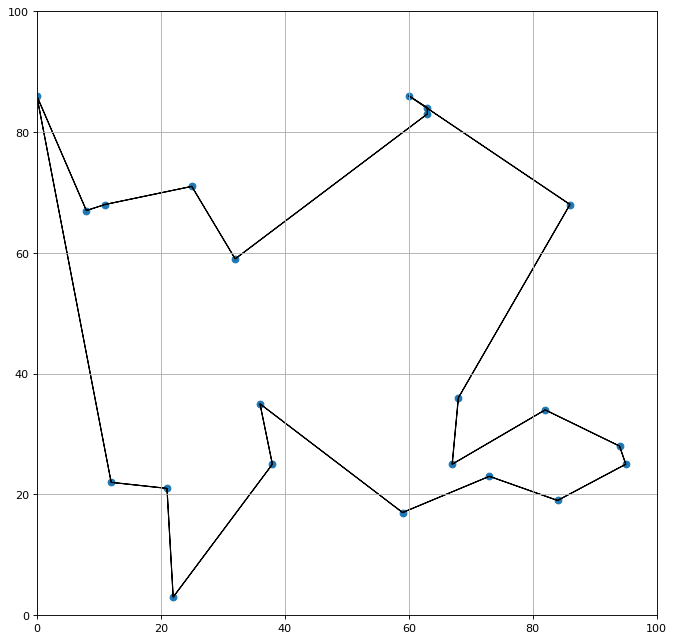

55 	407   	495.365	97.8906	407.525	1032.59


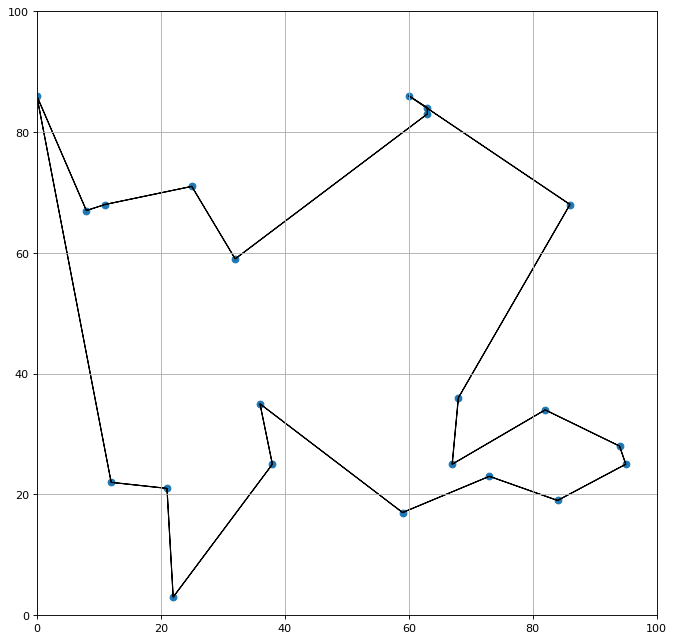

56 	379   	484.495	98.8572	407.525	946.506


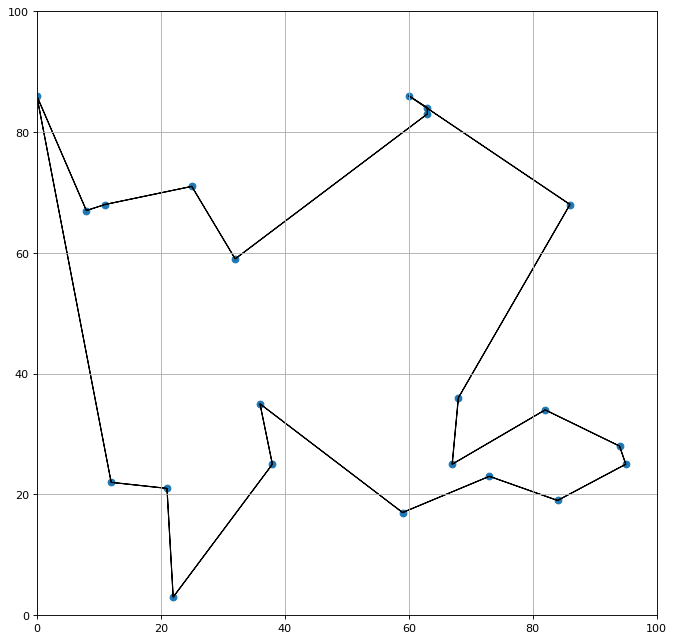

57 	390   	463.45 	89.9997	407.525	974.943


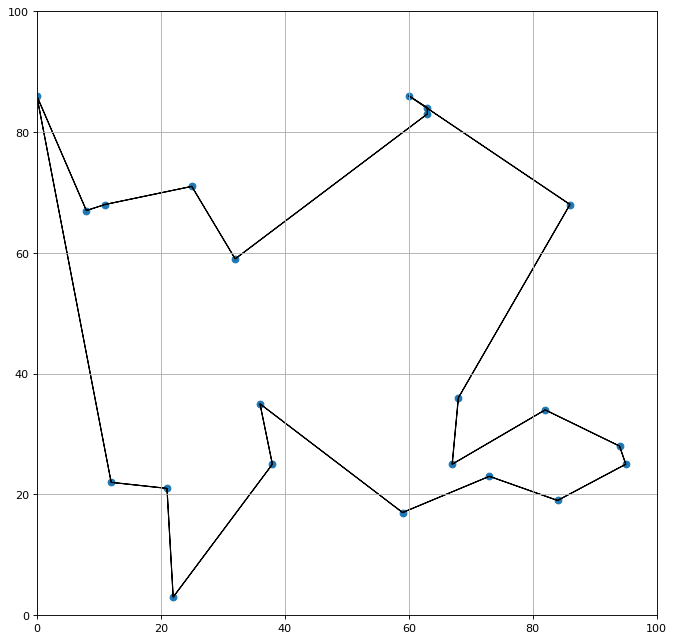

58 	395   	457.133	98.2845	407.525	1040.38


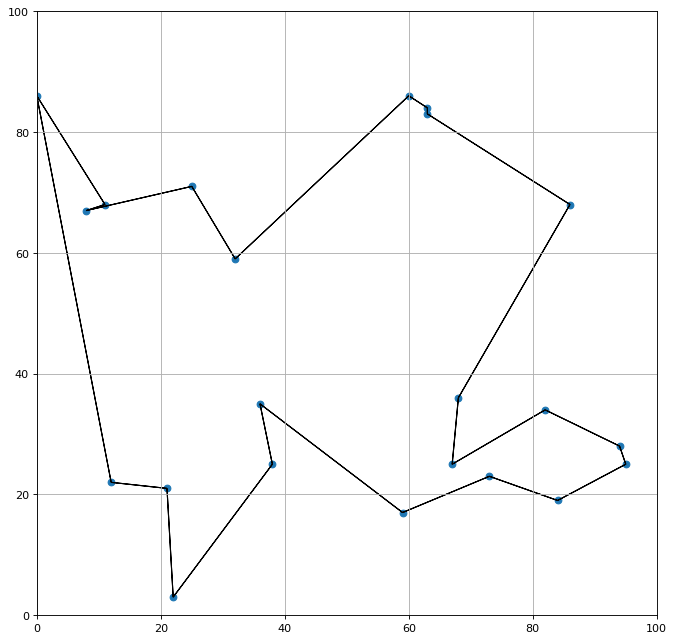

59 	379   	459.182	102.321	406.68 	940.821


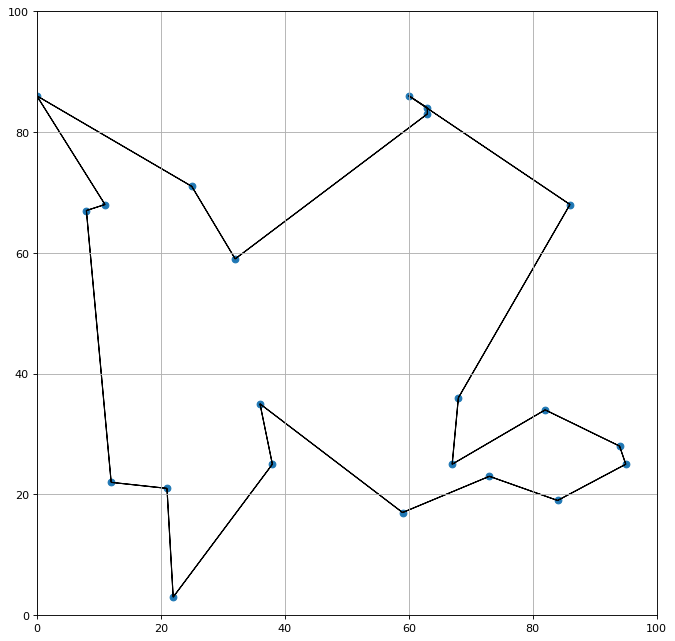

60 	390   	455.095	109.414	402.903	1142.45


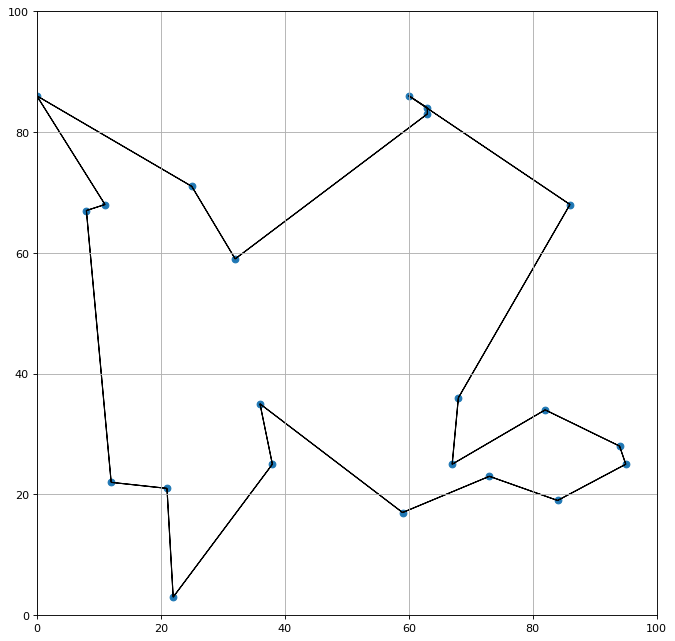

61 	407   	457.455	113.963	402.903	1099.21


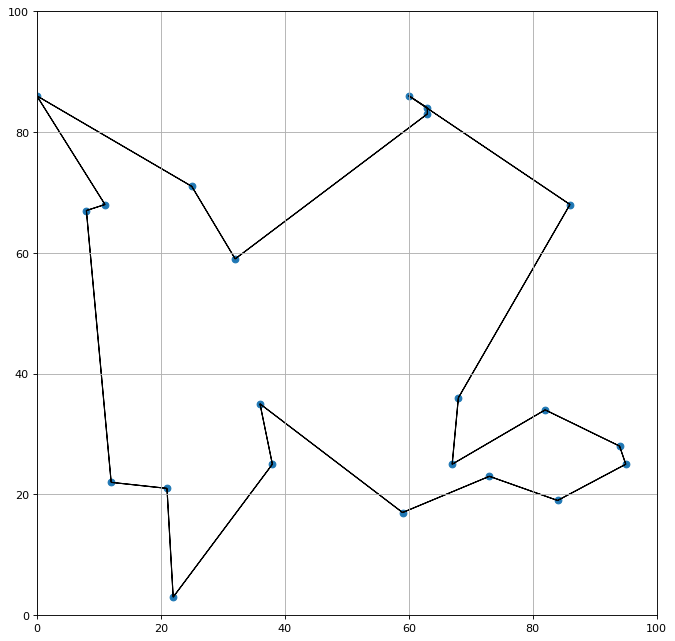

62 	416   	453.135	101.108	402.903	1001.19


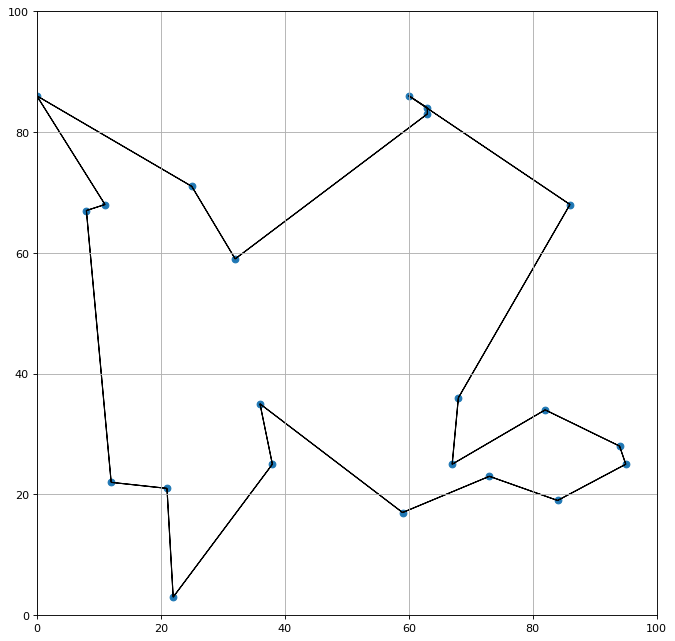

63 	396   	451.851	111.873	402.903	1118.51


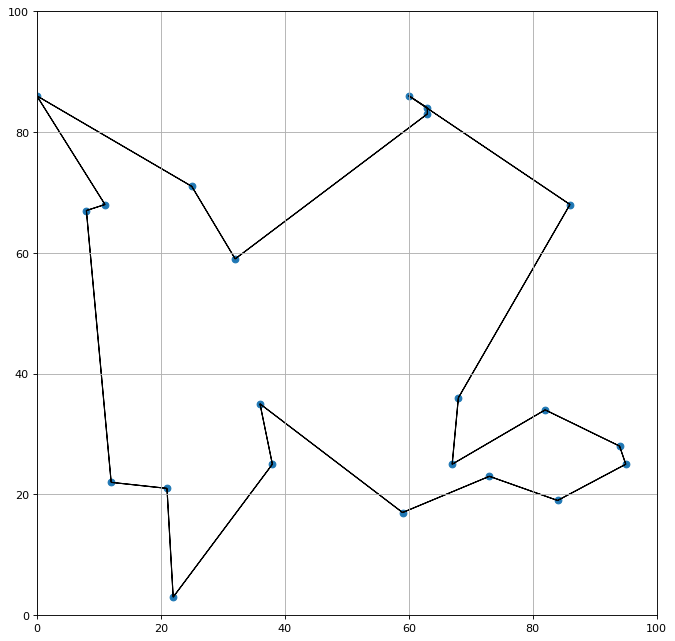

64 	392   	461.062	117.156	402.903	958.114


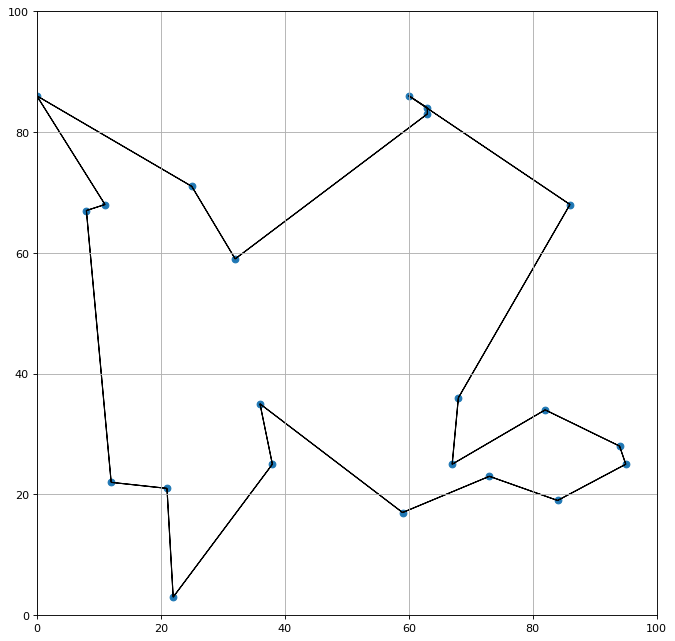

65 	368   	444.143	94.1122	402.903	988.786


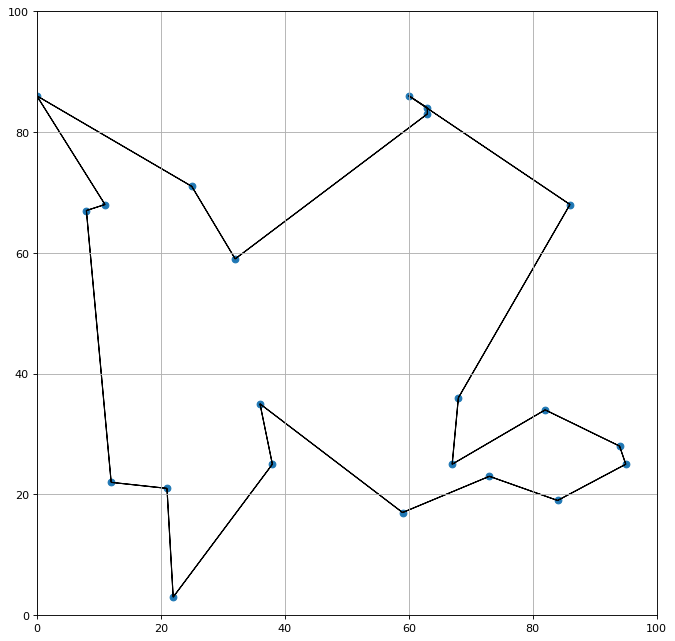

66 	383   	439.506	94.7093	402.903	1062.6 


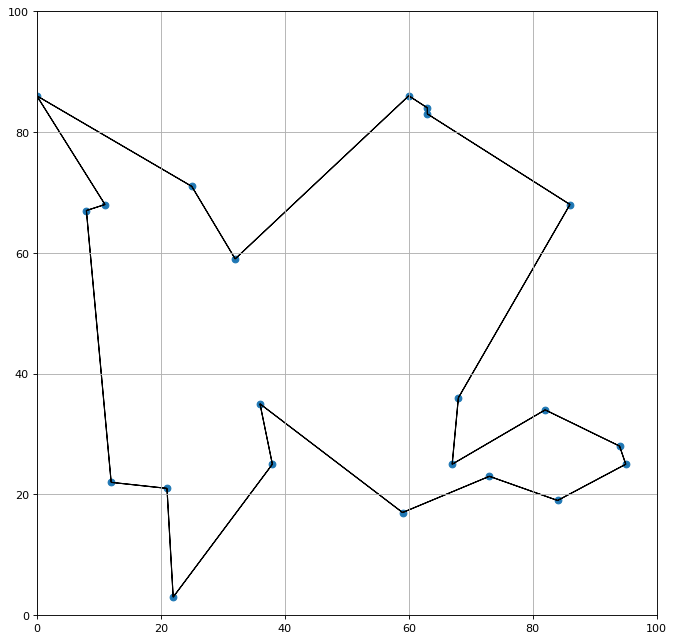

67 	381   	441.457	94.1477	398.432	1038.78


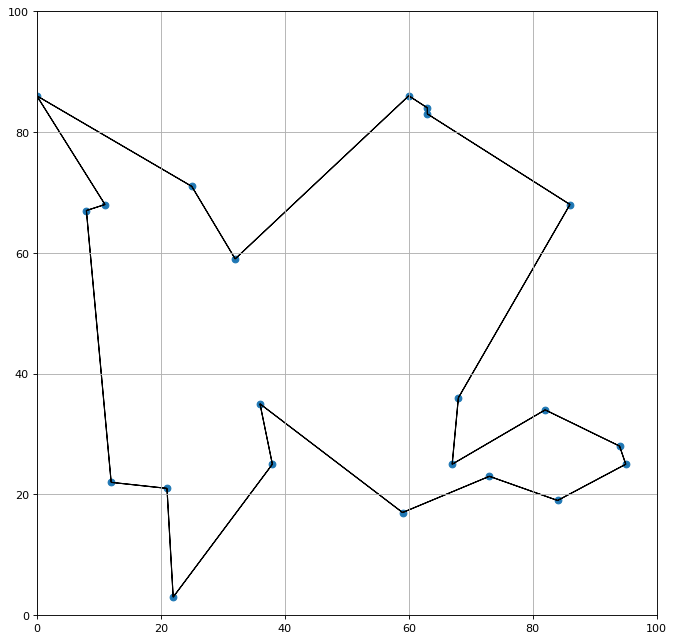

68 	394   	440.809	93.2219	398.432	914.703


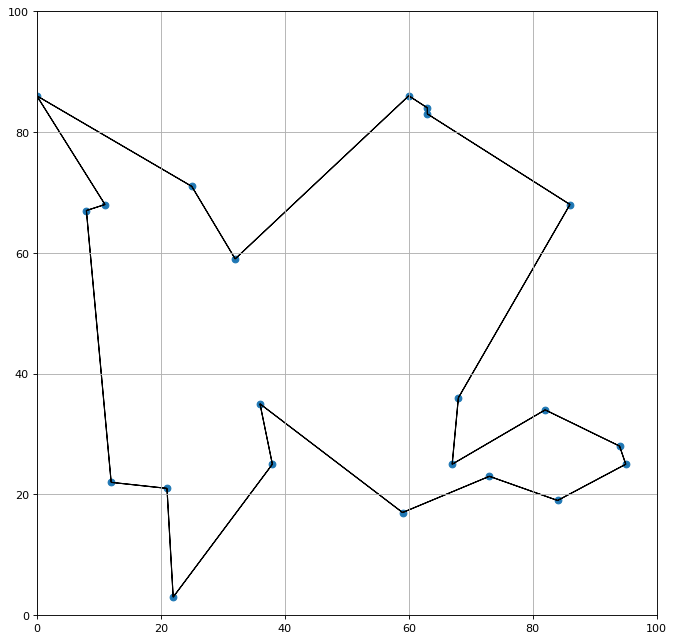

69 	390   	448.951	111.29 	398.432	1085.17


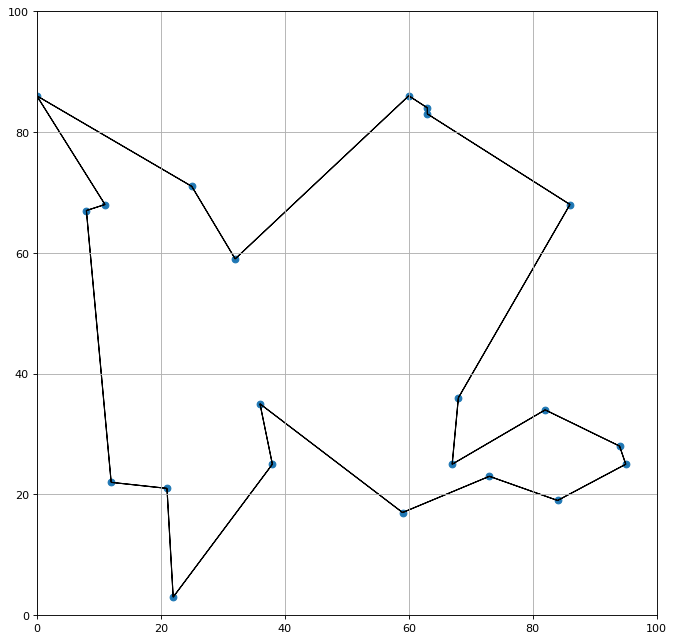

70 	405   	452.148	107.103	398.432	1006.6 


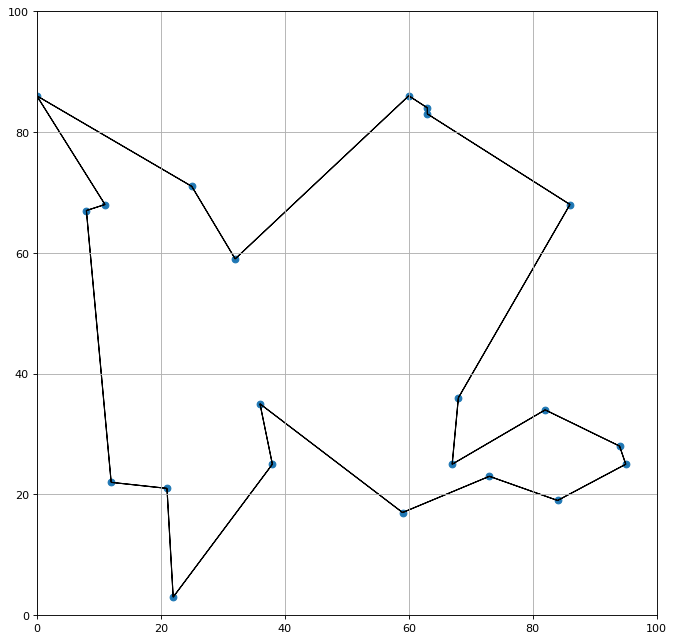

71 	404   	444.239	98.2317	398.432	961.897


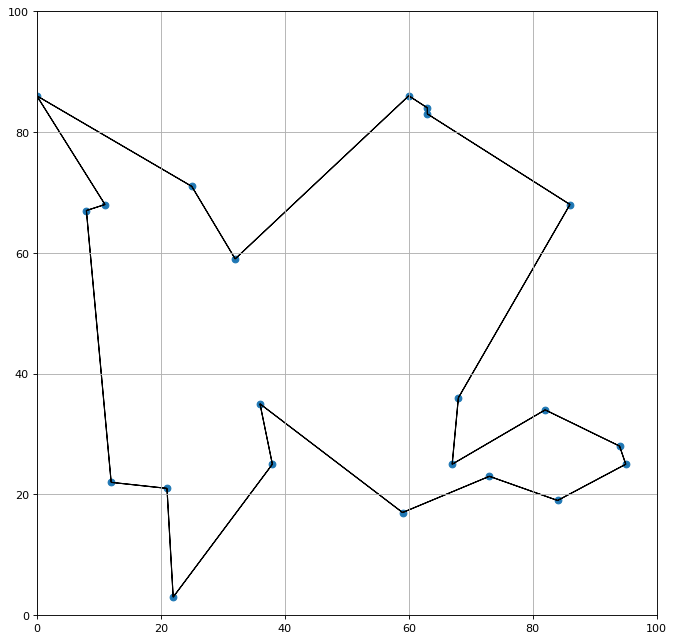

72 	389   	443.171	101.401	398.432	1182.38


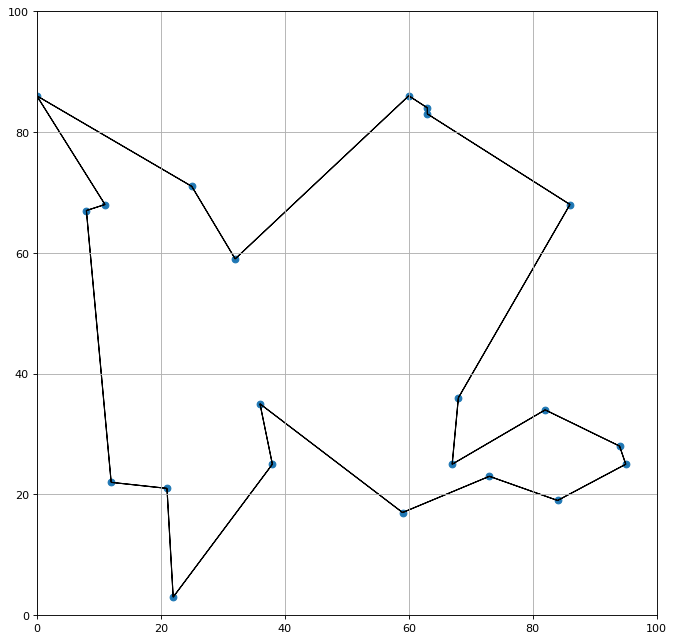

73 	401   	445.396	93.7354	398.432	879.577


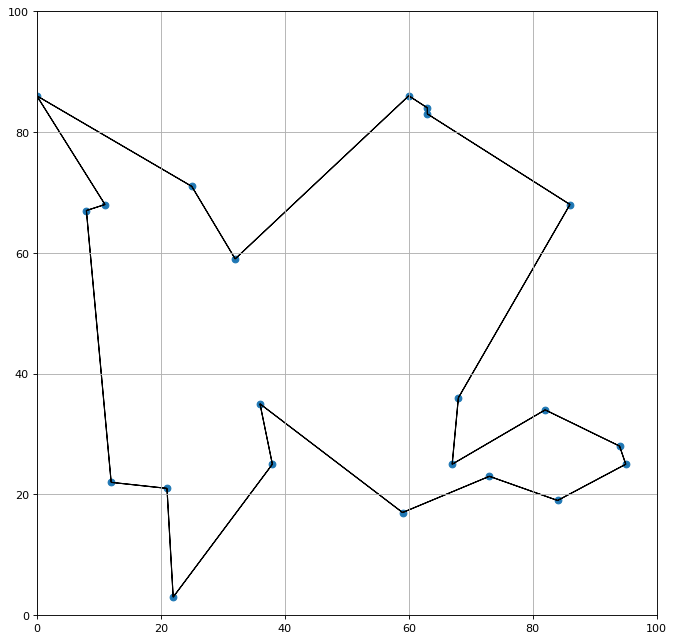

74 	396   	436.101	89.5655	398.432	966.846


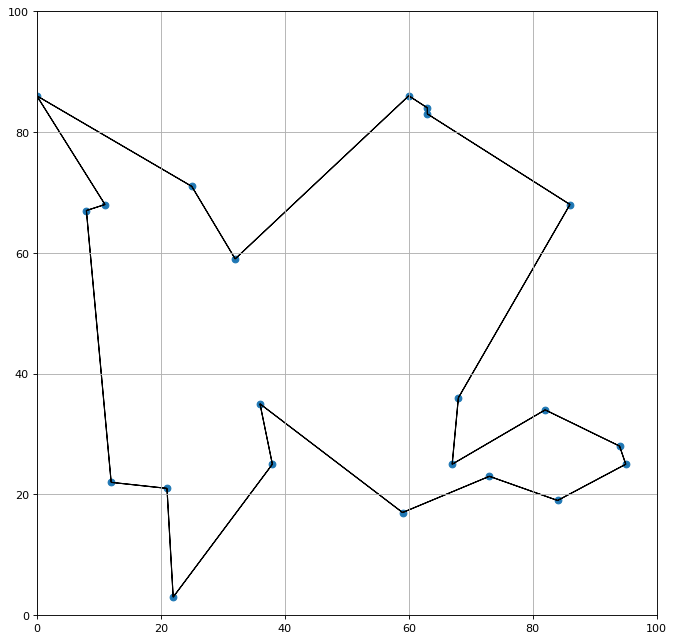

75 	397   	441.75 	103.2  	398.432	955.815


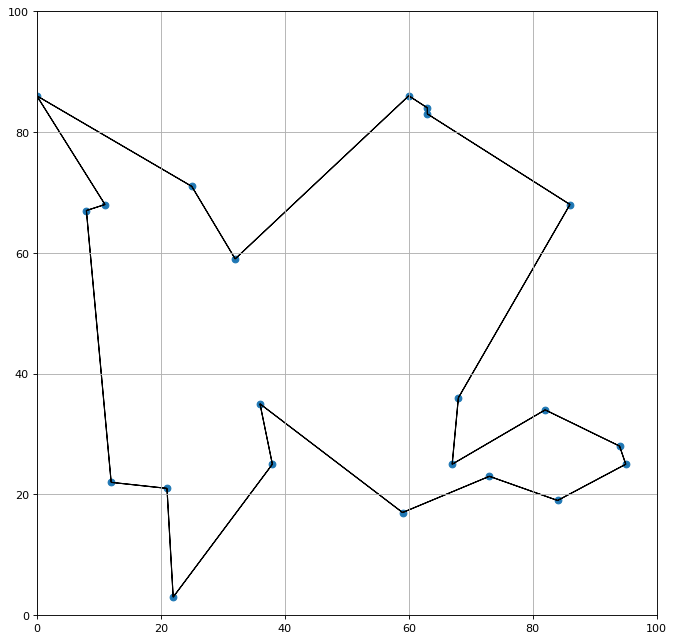

76 	379   	438.21 	93.7742	398.432	914.163


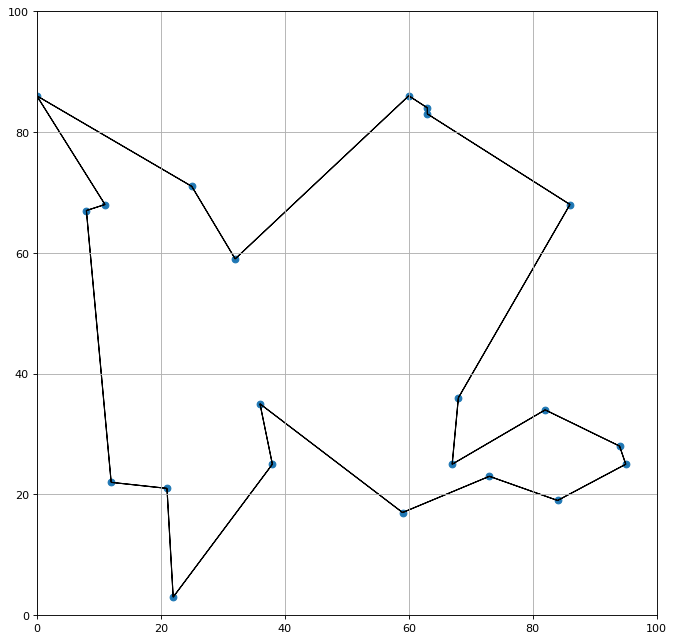

77 	386   	435.63 	98.4915	398.432	938.465


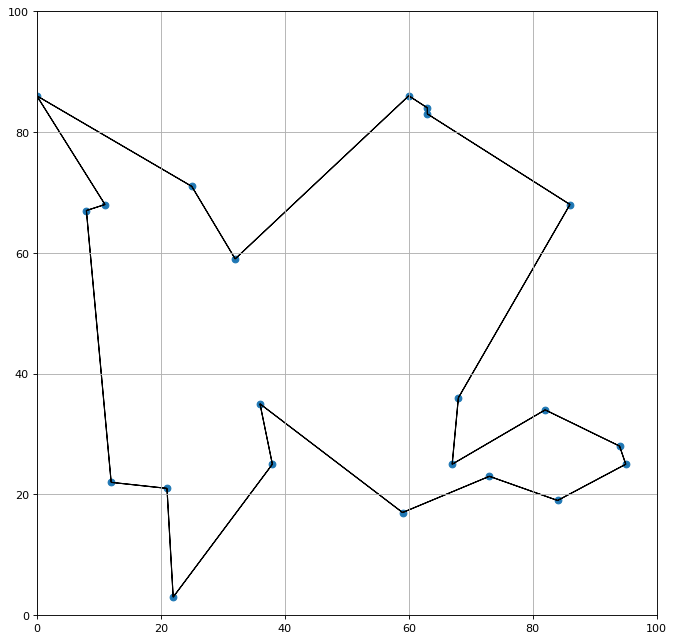

78 	413   	443.205	105.391	398.432	1038.29


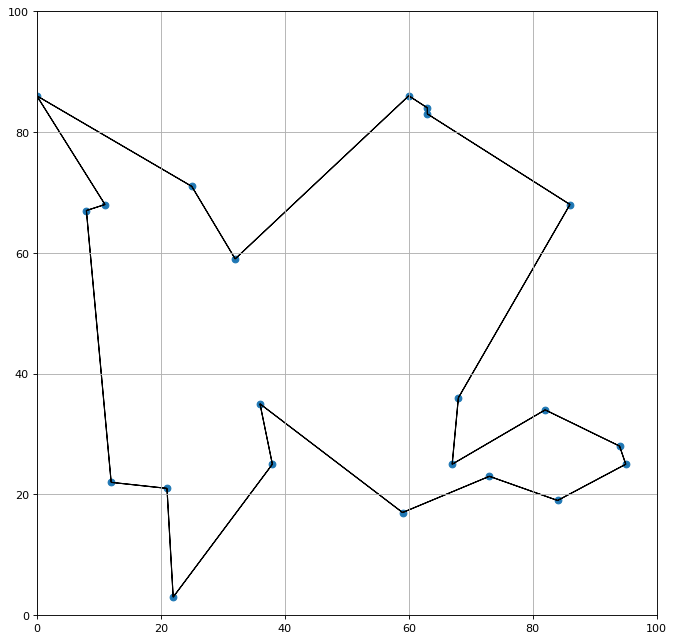

79 	393   	452.141	117.494	398.432	1016.78


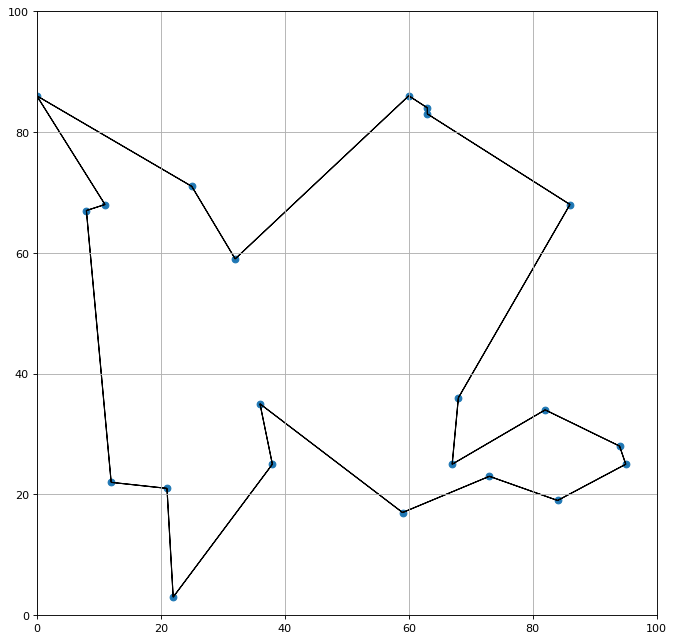

80 	387   	434.031	93.208 	398.432	926.337


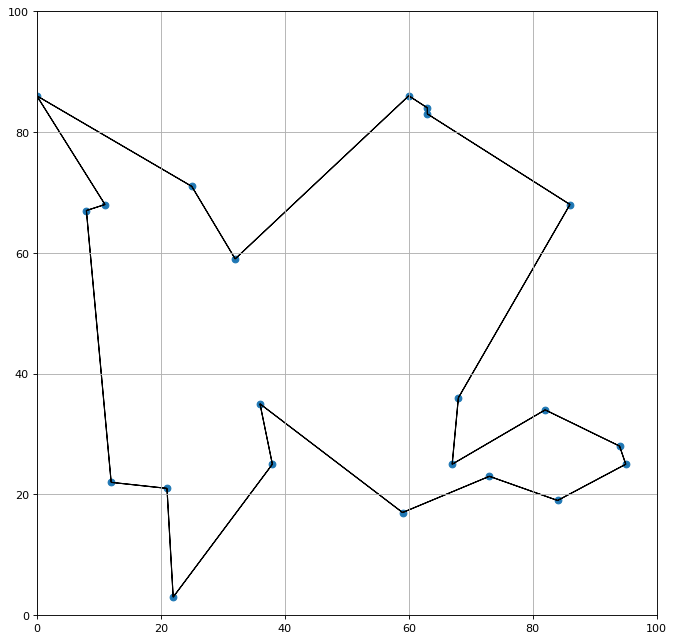

81 	411   	437.885	98.6694	398.432	1105.89


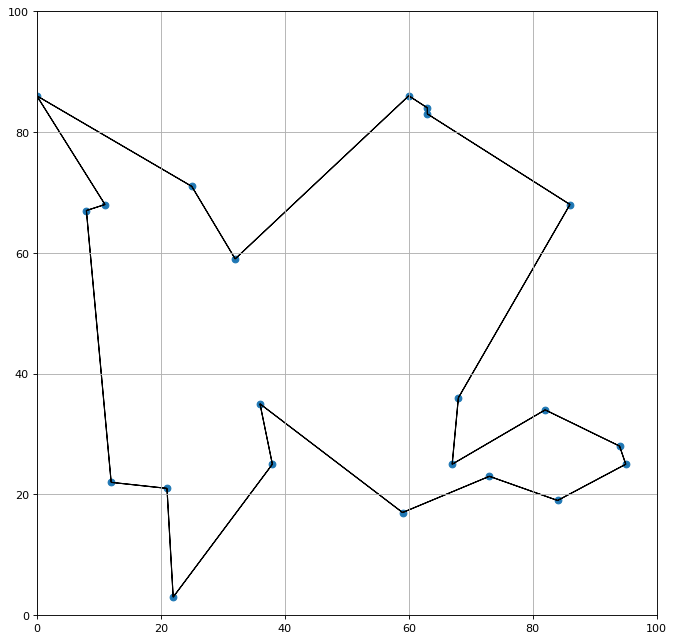

82 	412   	444.5  	113.669	398.432	1215.69


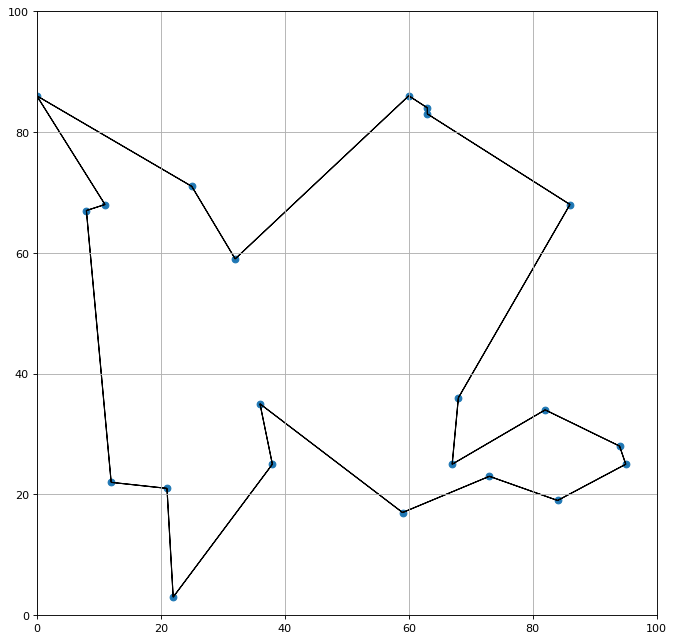

83 	371   	434.885	95.0175	398.432	1019.5 


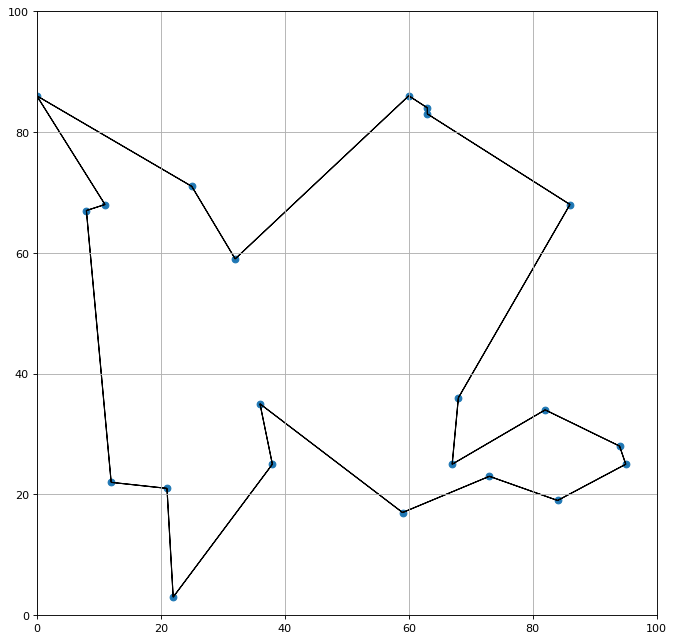

84 	412   	443.401	107.995	398.432	1040.59


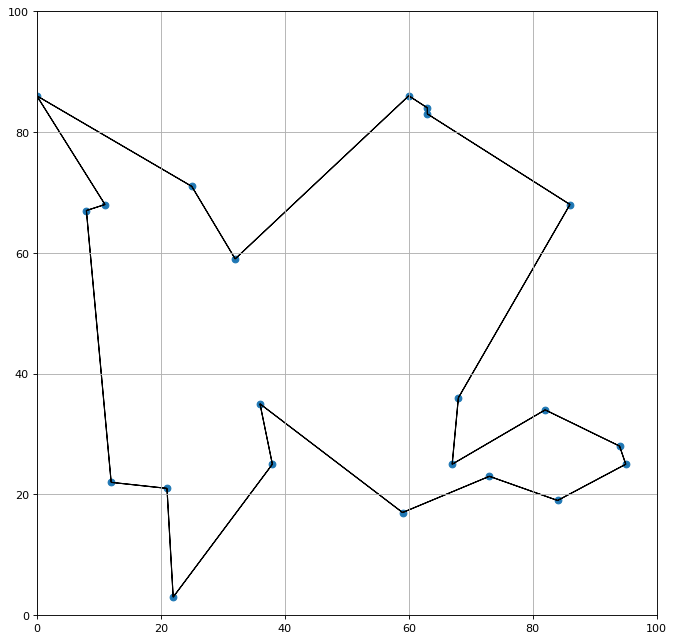

85 	409   	443.636	111.13 	398.432	1255.53


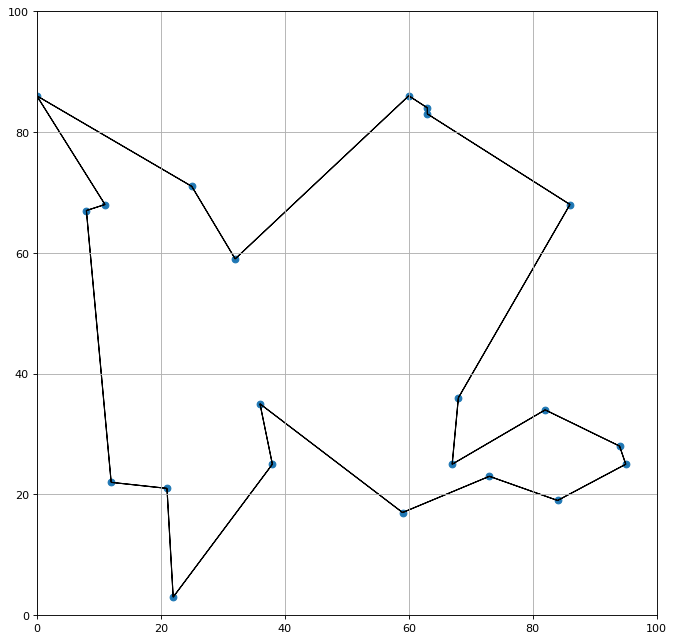

86 	402   	441.127	100.912	398.432	1050.19


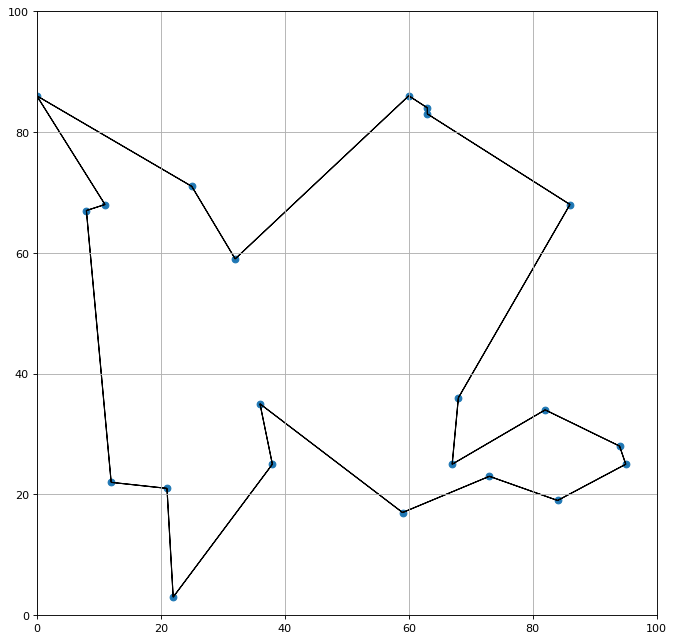

87 	379   	441.659	103.655	398.432	967.511


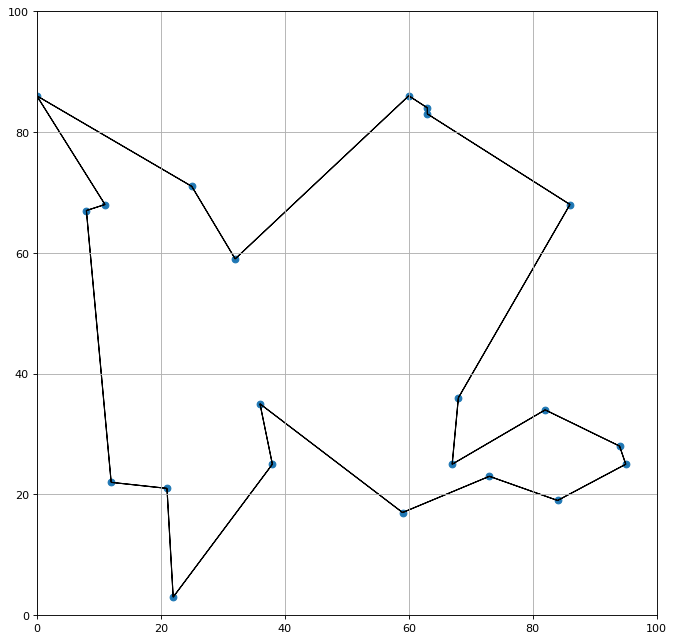

88 	392   	433.05 	85.8489	398.432	1014.83


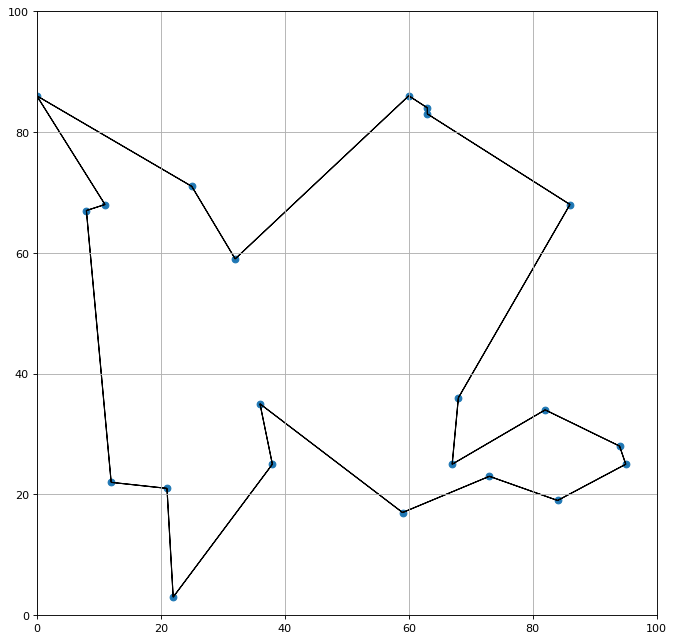

89 	397   	444.374	104.263	398.432	997.482


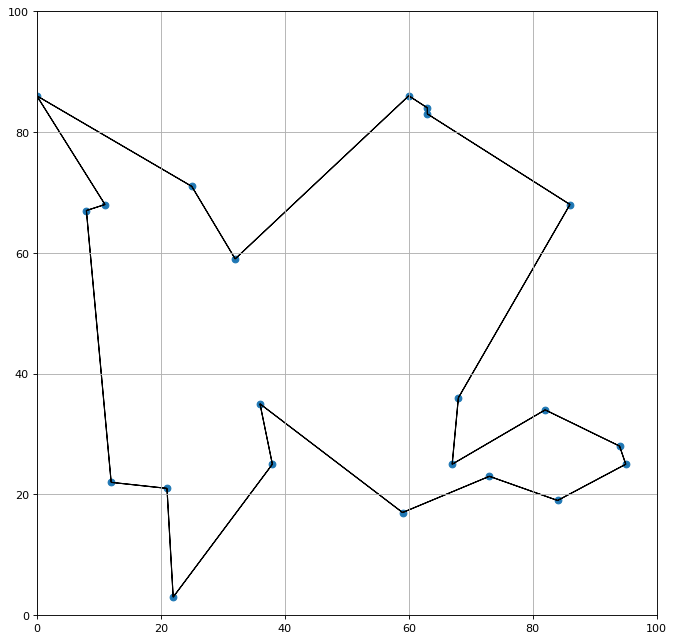

90 	373   	447.94 	110.932	398.432	1031.43


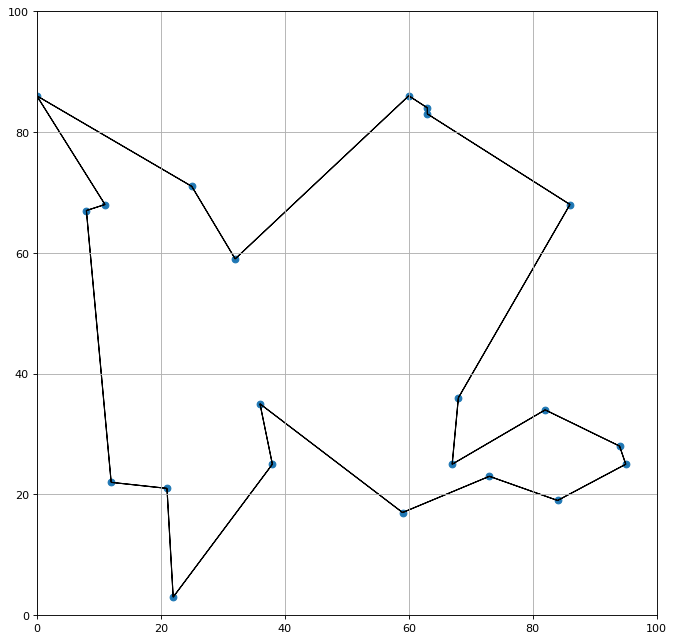

91 	416   	439.446	97.0865	398.432	1003.37


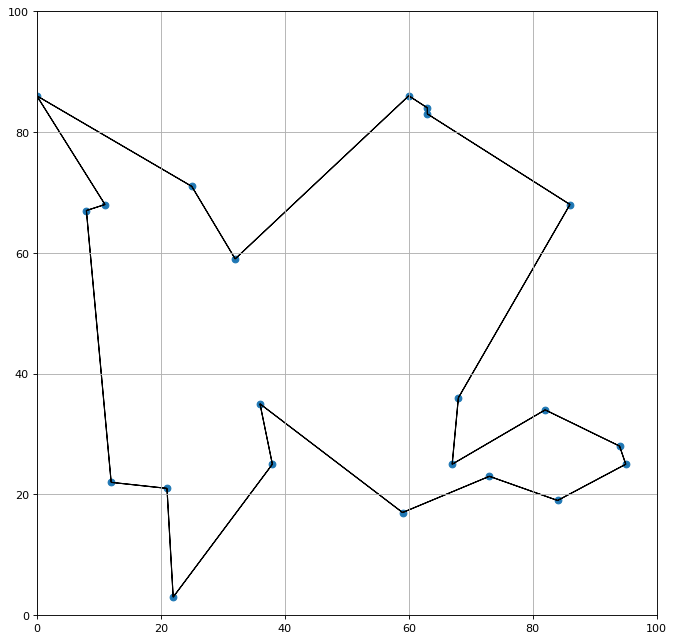

92 	396   	447.19 	112.339	398.432	1050.88


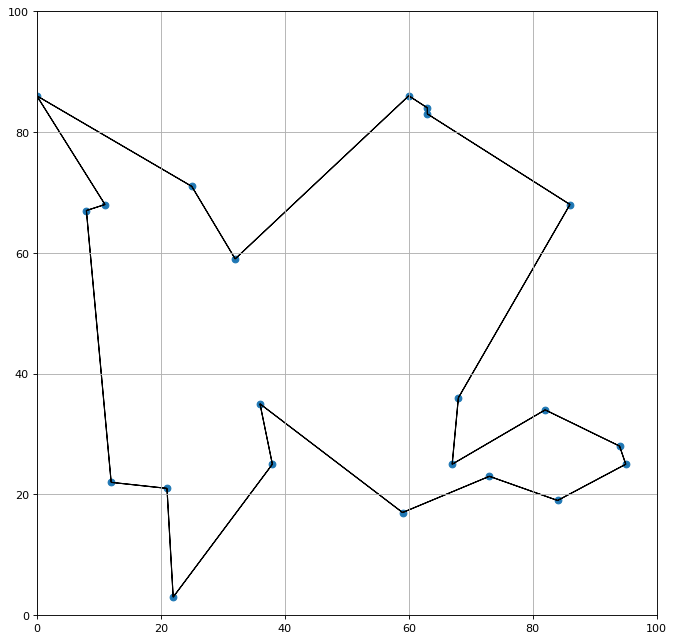

93 	396   	438.331	95.7271	398.432	922.097


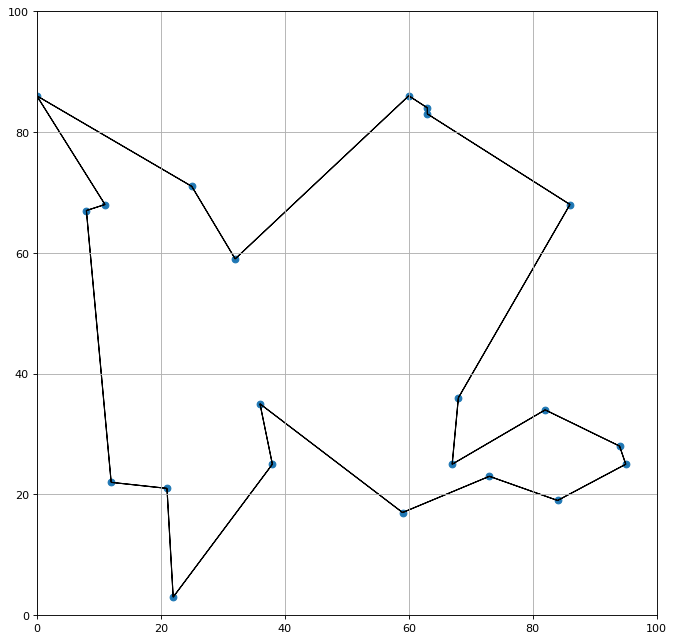

94 	401   	441.173	99.2889	398.432	923.849


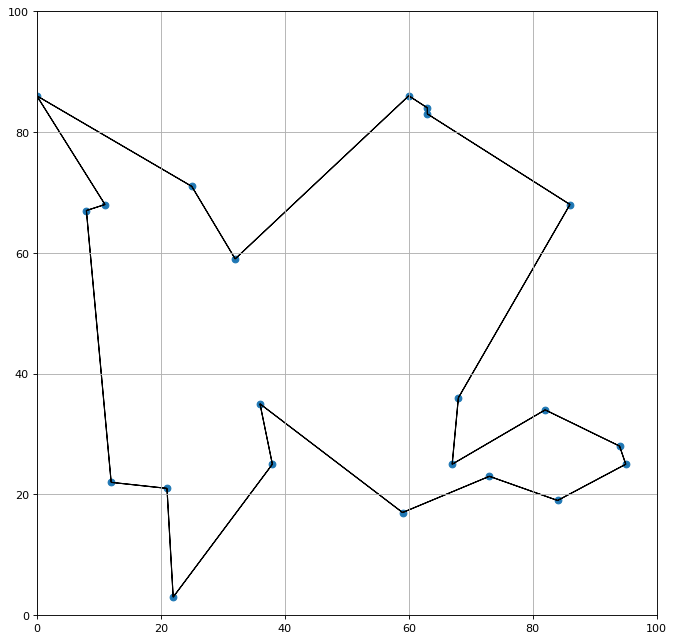

95 	397   	445.043	111.567	398.432	1342.88


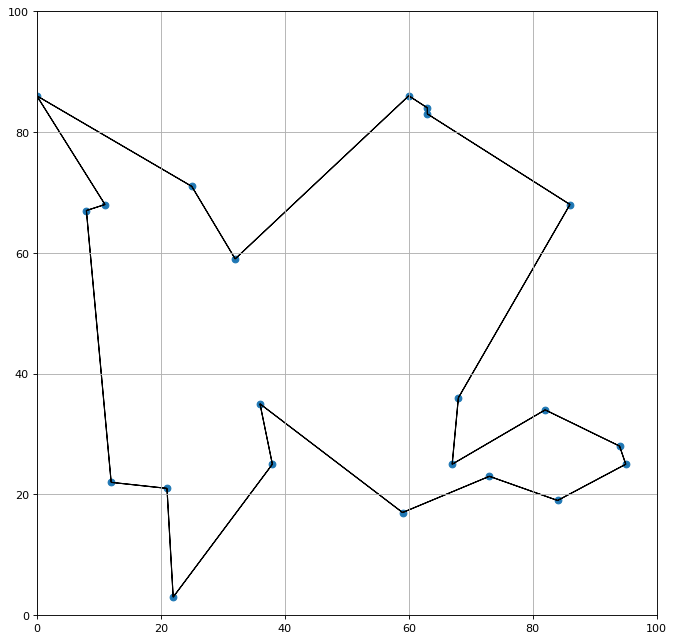

96 	391   	440.737	102.818	398.432	950.11 


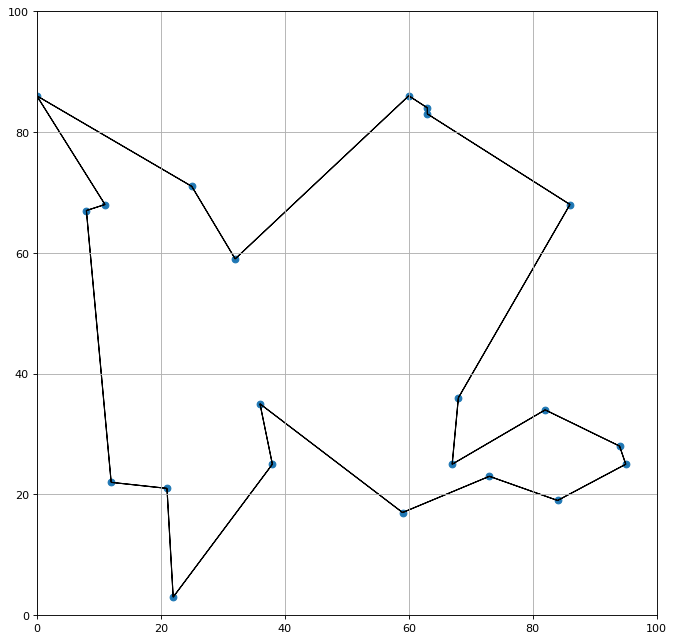

97 	410   	438.598	91.1263	398.432	883.154


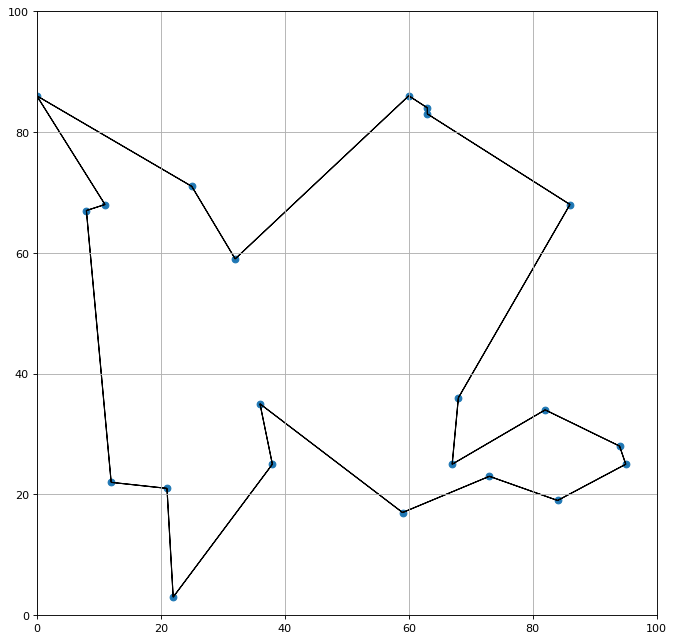

98 	398   	443.888	105.728	398.432	1029.1 


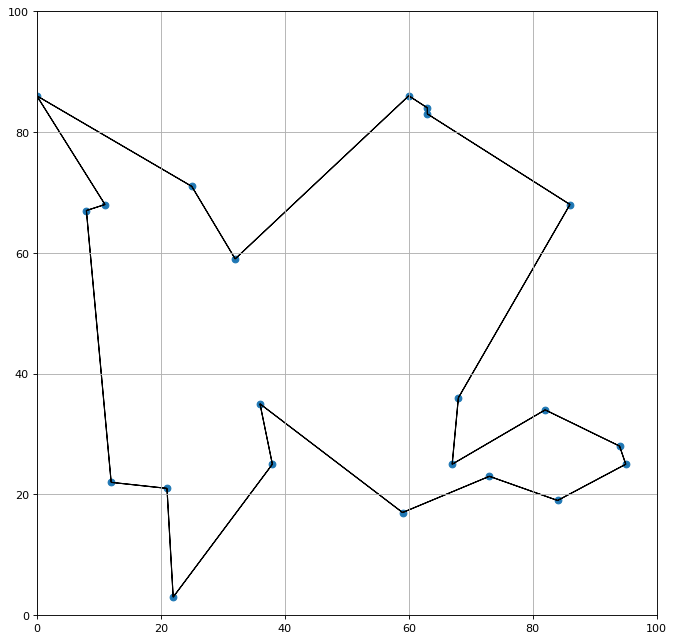

99 	382   	435.657	94.286 	398.432	973.71 


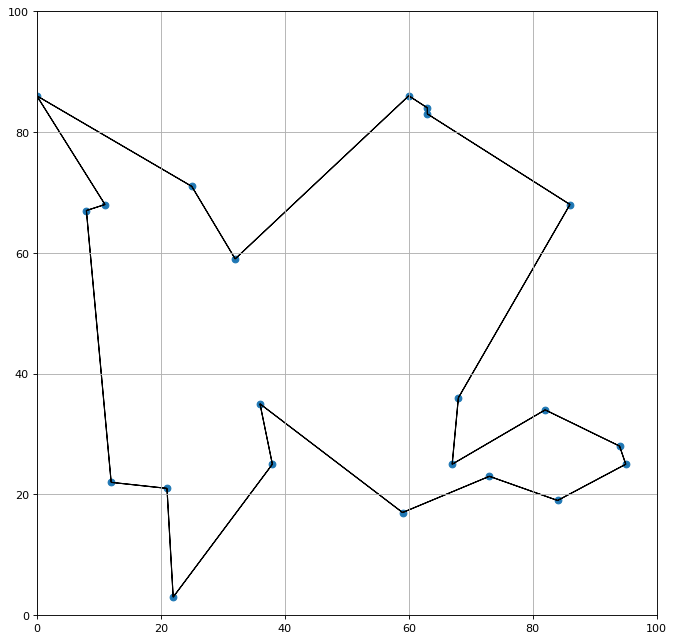

100	411   	438.387	102.814	398.432	1230.22


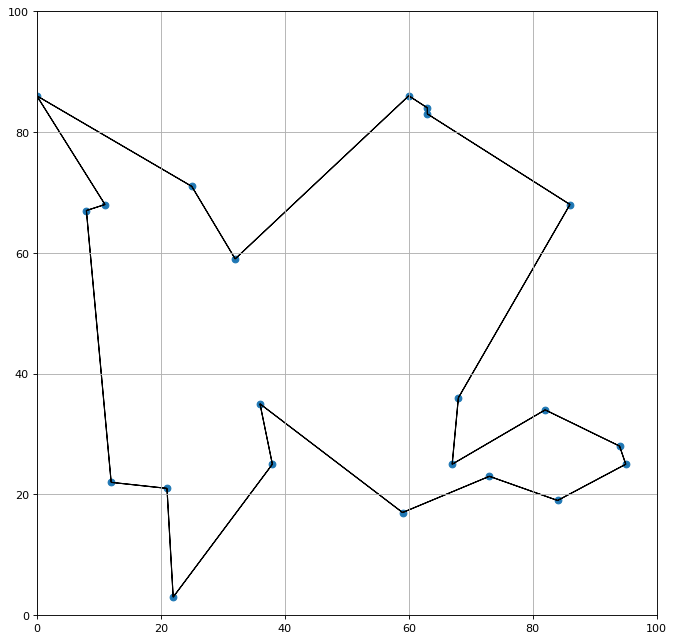

101	386   	442.711	106.415	398.432	1091.35


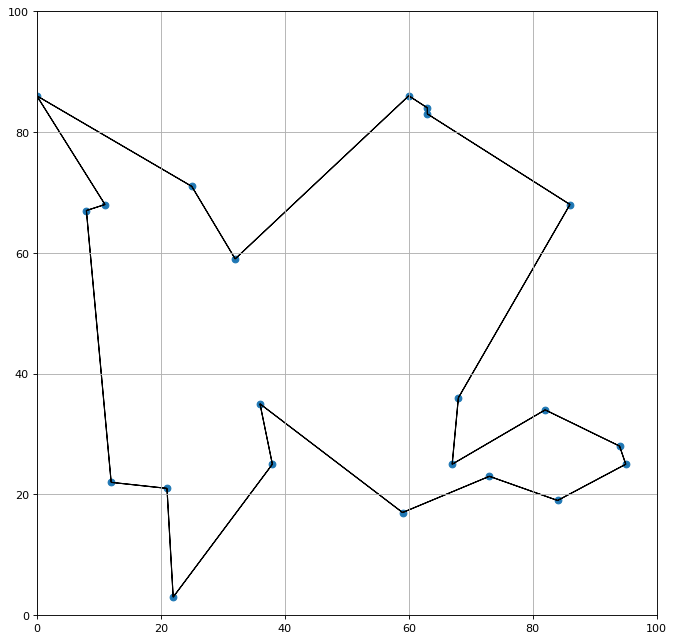

102	398   	439.442	103.861	398.432	1075.93


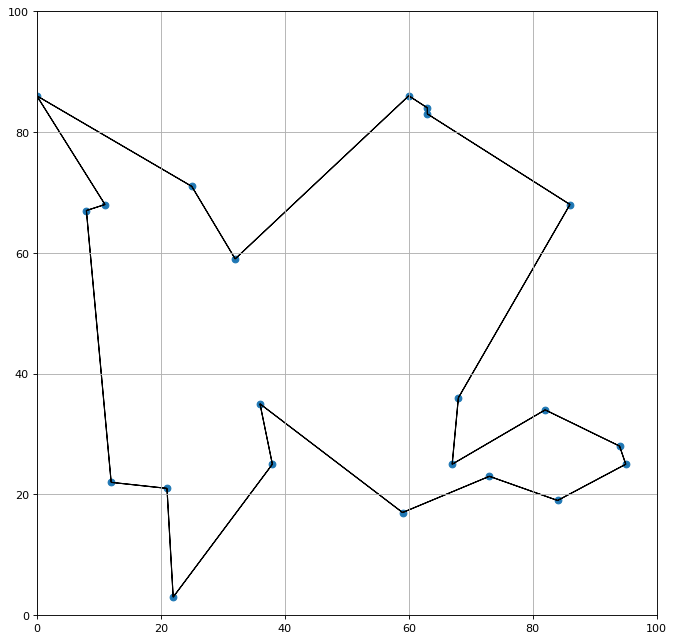

103	398   	436.579	96.068 	398.432	895.798


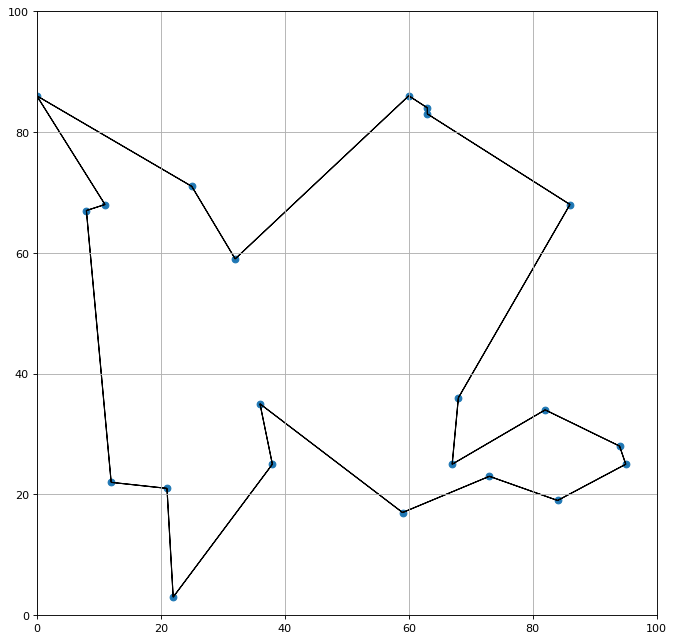

104	396   	434.075	90.1767	398.432	1024.51


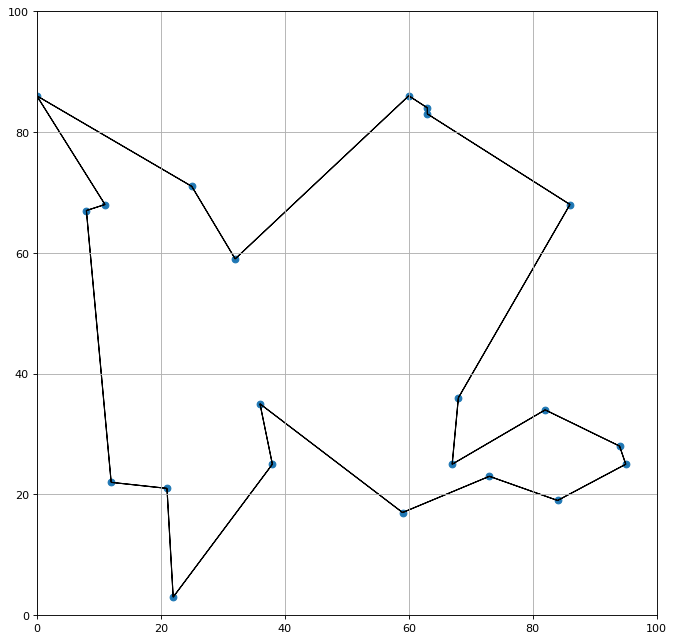

105	384   	433.181	88.2814	398.432	898.574


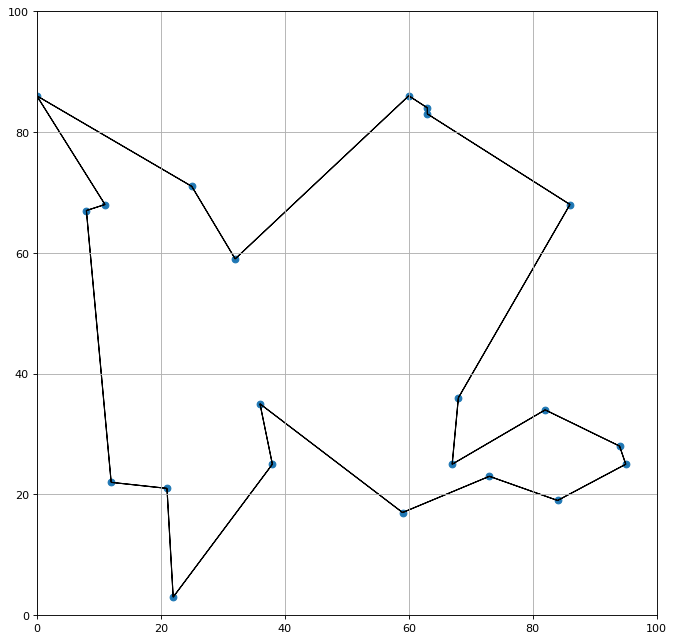

106	398   	439.73 	95.8639	398.432	924.029


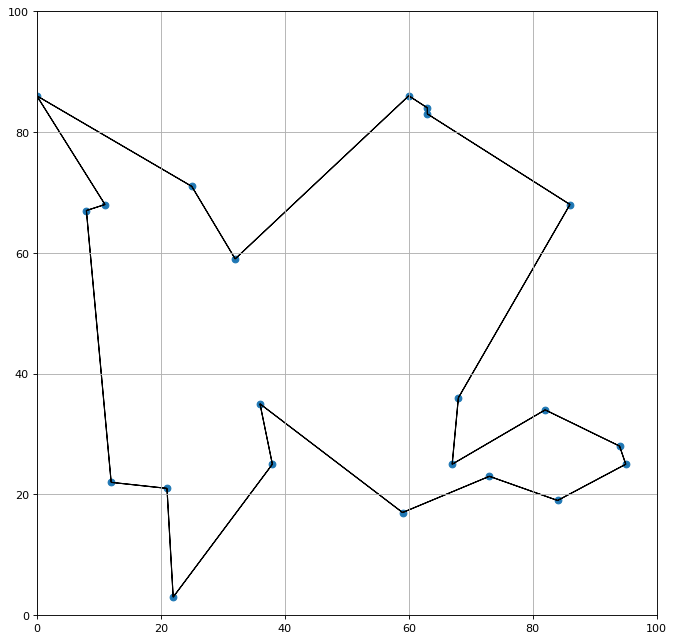

107	390   	442.66 	104.714	398.432	1155.32


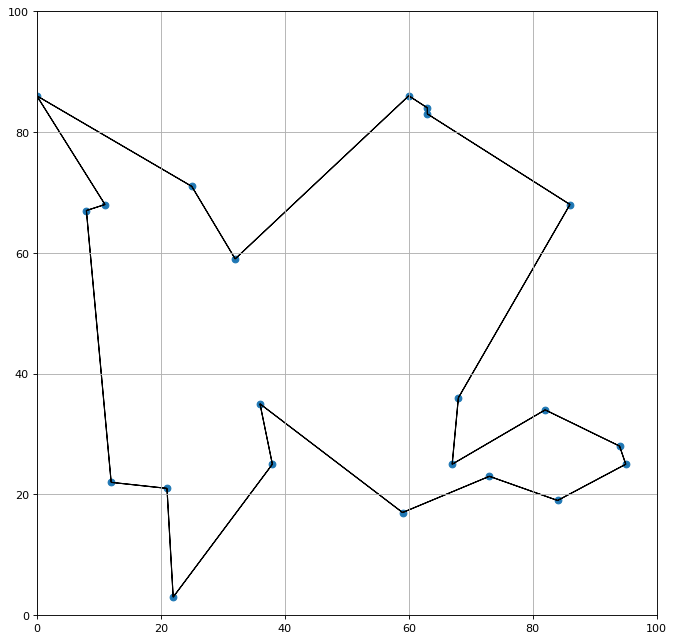

108	390   	440.408	104.646	398.432	1086.12


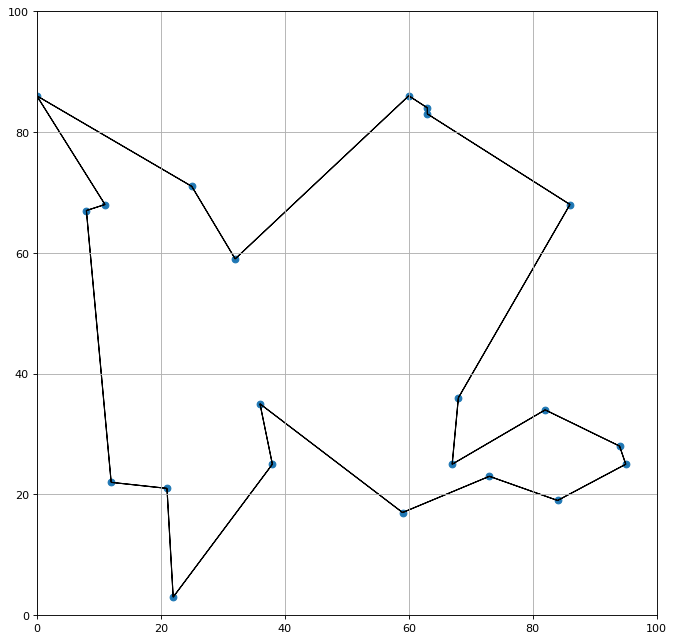

109	377   	434.778	91.9071	398.432	1176.38


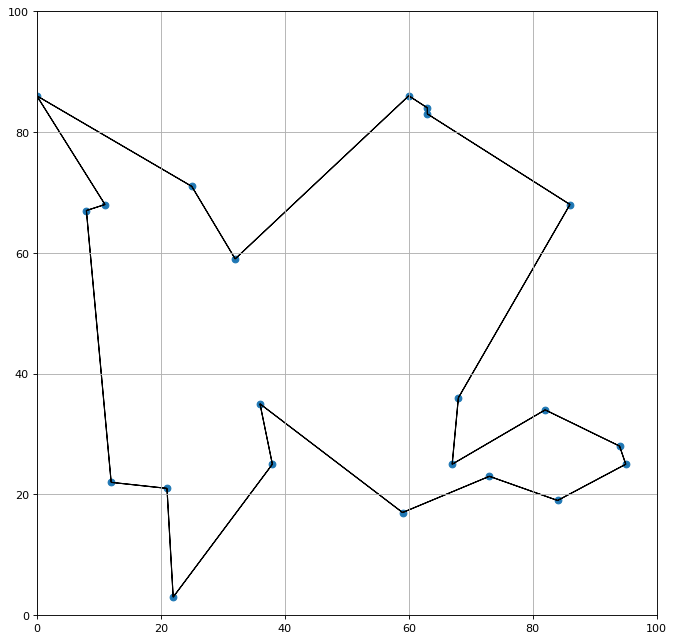

110	386   	439.414	101.61 	398.432	952.081


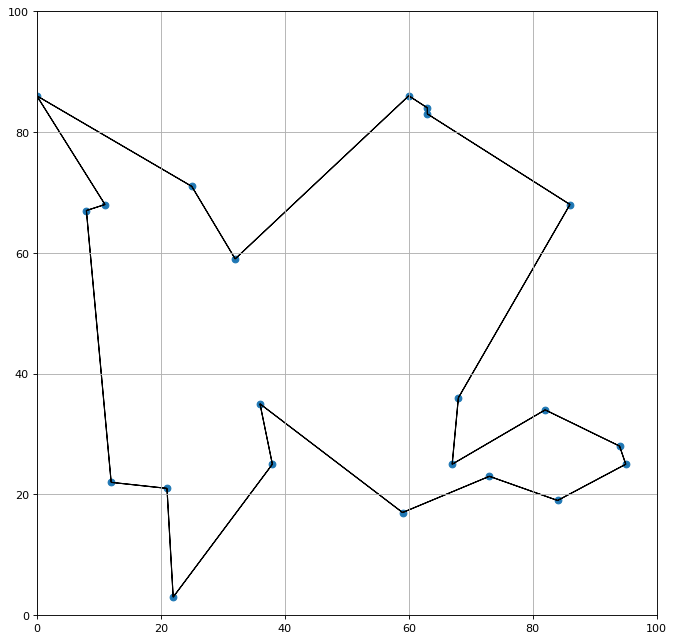

111	394   	446.946	111.363	398.432	969.823


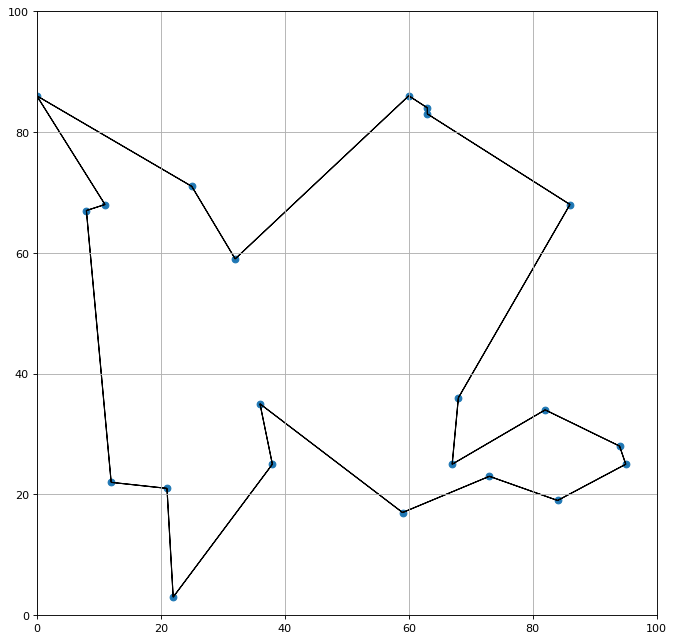

112	390   	443.886	104.443	398.432	999.223


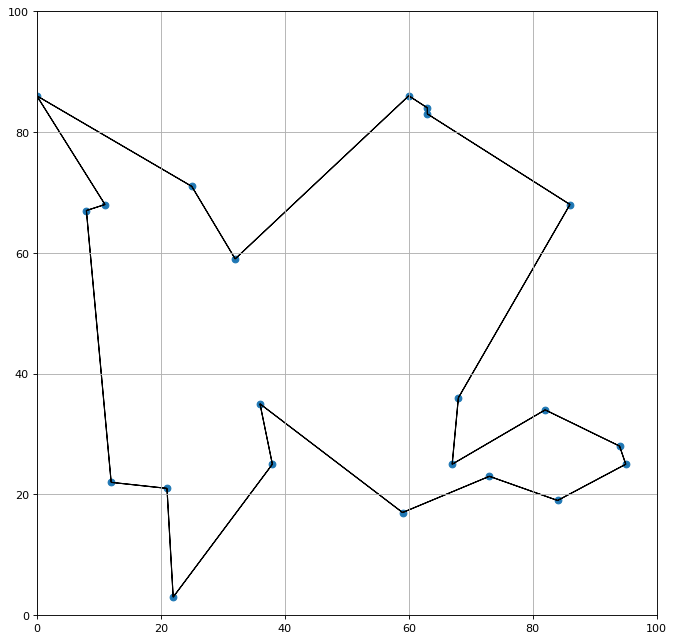

113	396   	434.075	92.8717	398.432	1001.7 


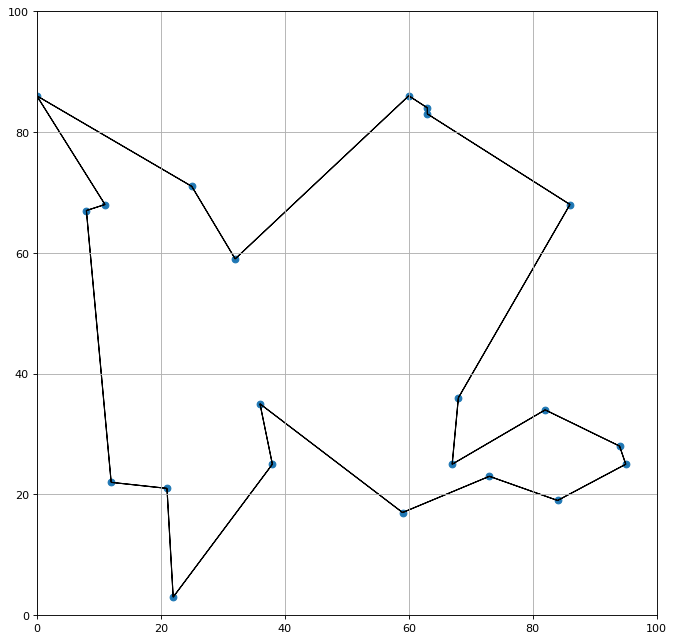

114	393   	436.983	93.7898	398.432	1017.45


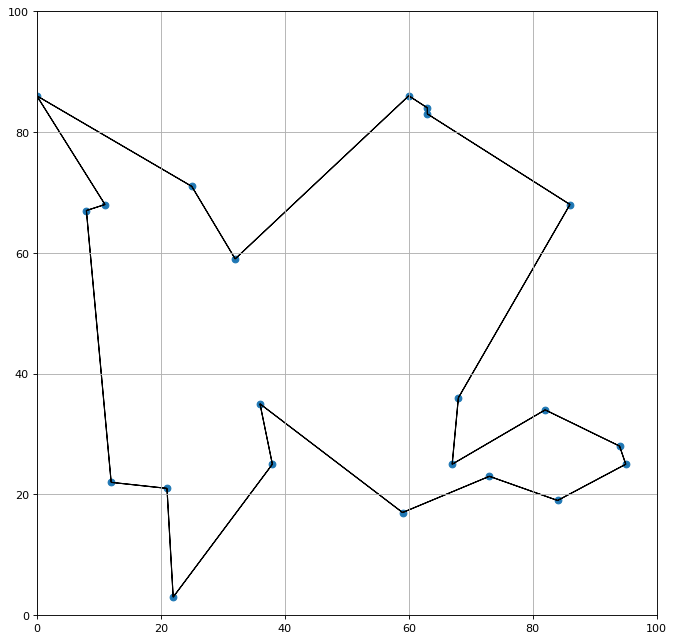

115	394   	436.648	90.9623	398.432	1000.22


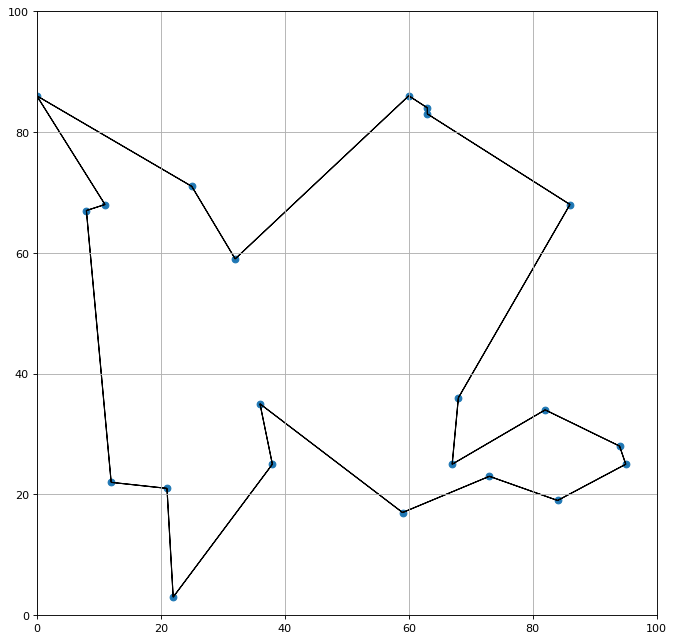

116	407   	437.232	95.989 	398.432	979.604


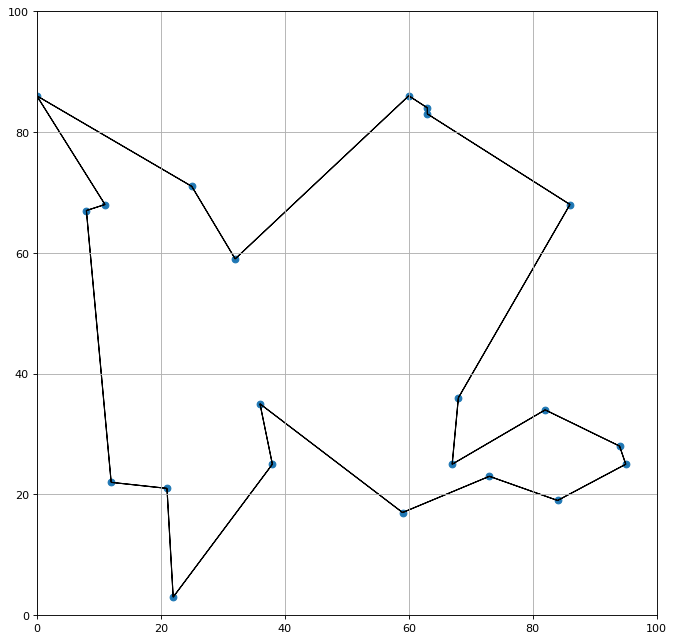

117	425   	439.457	106.669	398.432	1132.93


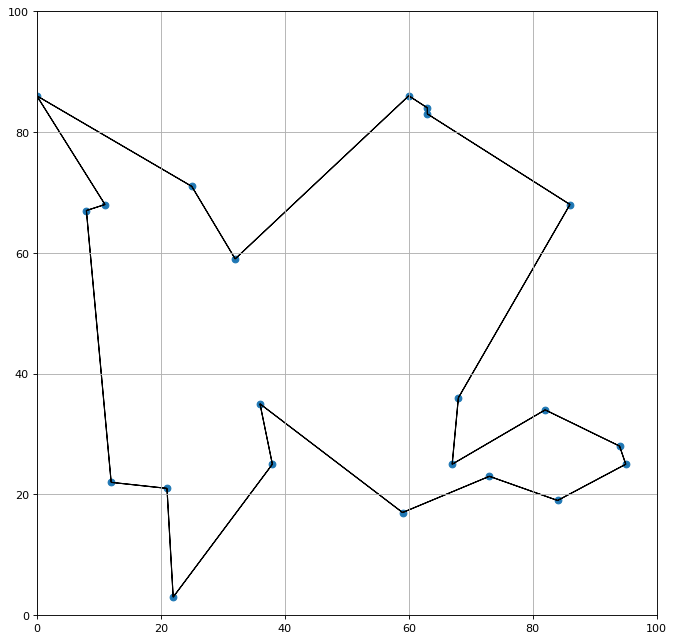

118	390   	432.444	87.9244	398.432	931.108


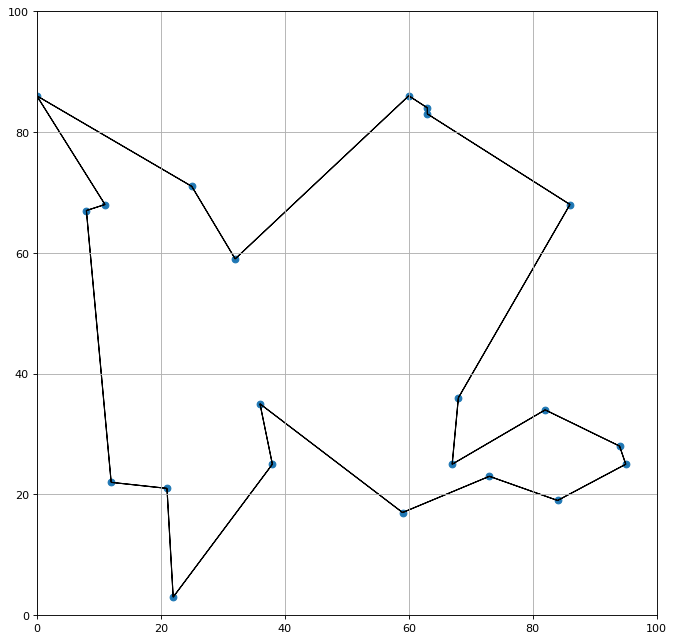

119	390   	436.519	100.032	398.432	1084.53


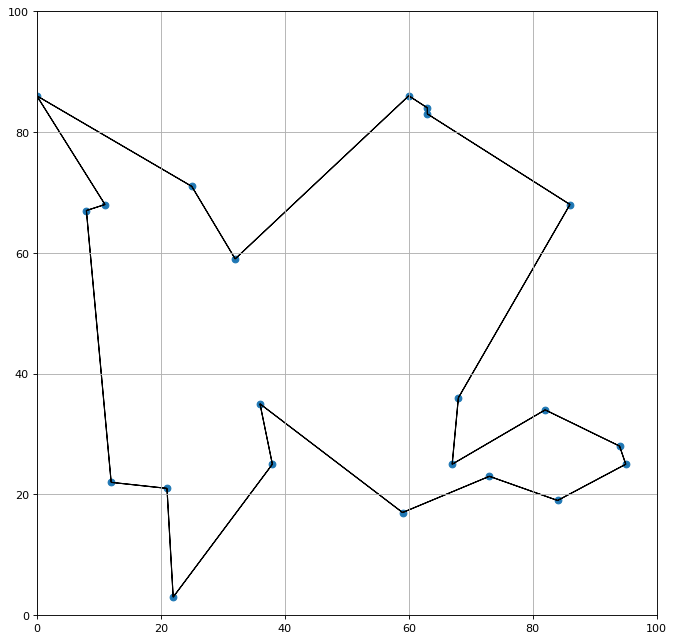

120	406   	439.501	99.7853	398.432	1004.51


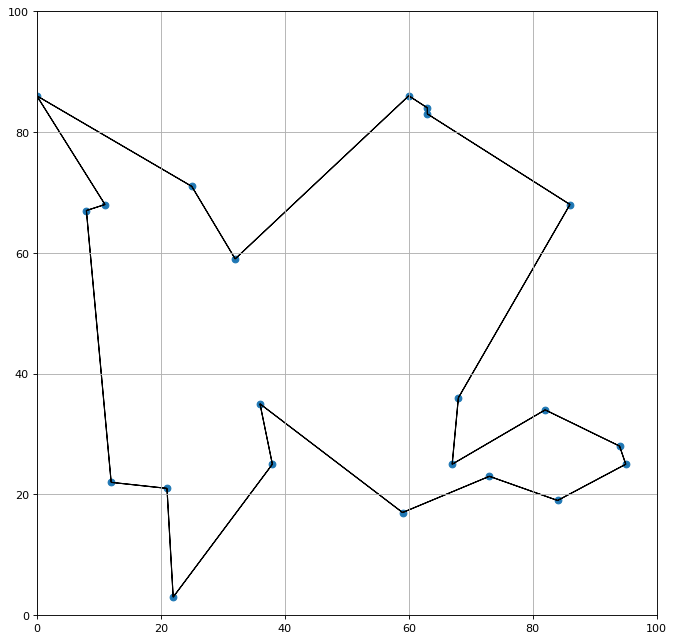

121	404   	435.313	96.5794	398.432	933.378


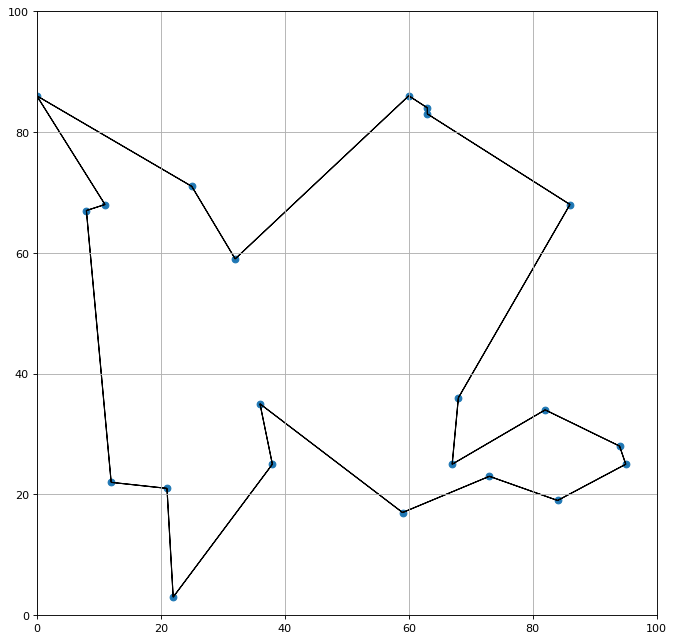

122	418   	444.859	104.101	398.432	1027.14


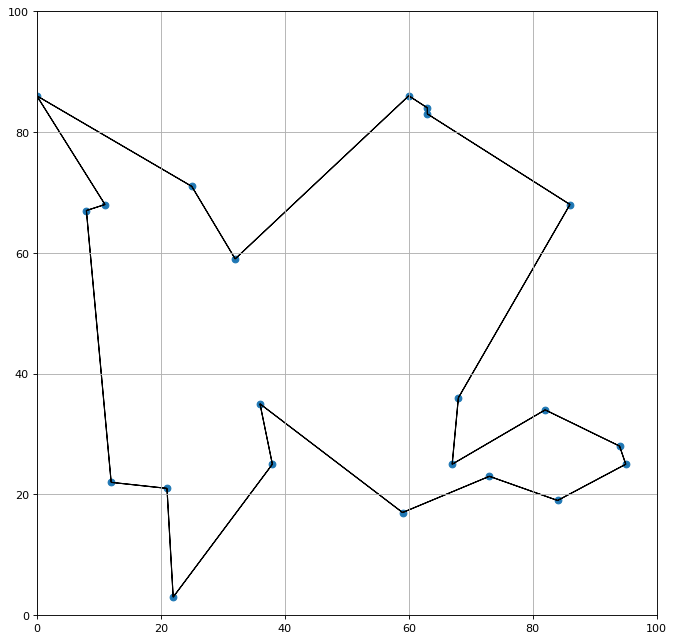

123	390   	438.164	102.118	398.432	1086.05


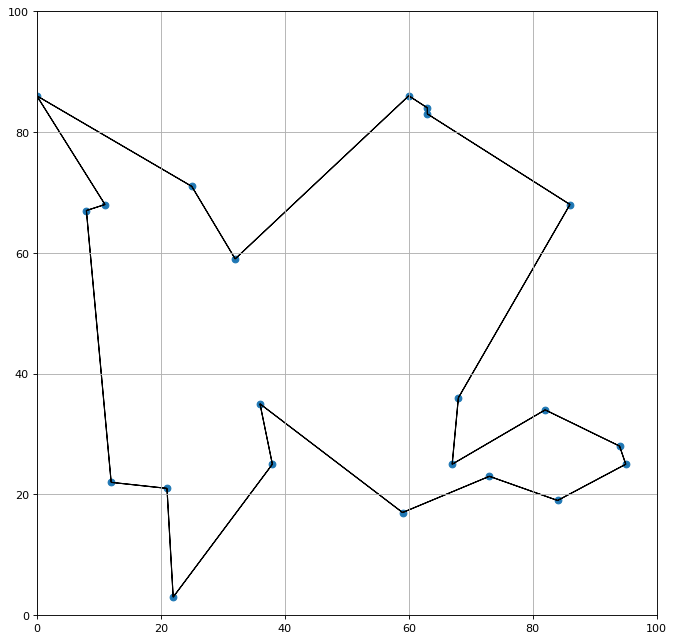

124	403   	433.331	92.7015	398.432	885.473


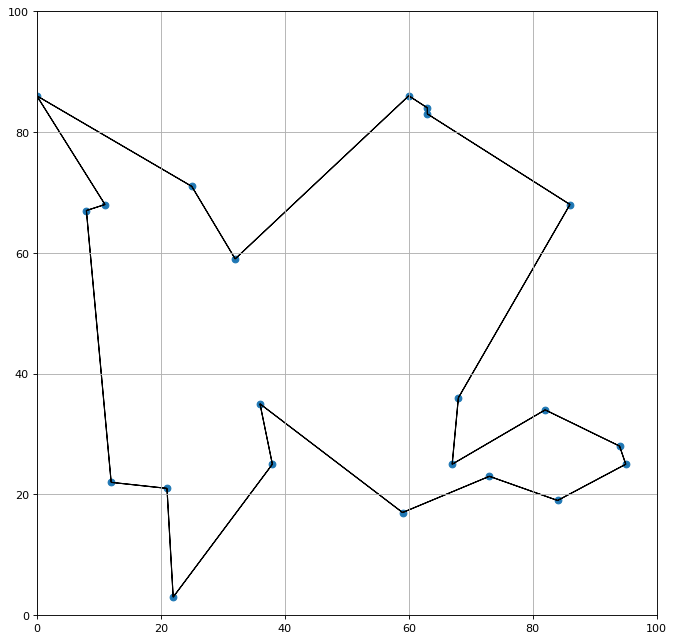

125	405   	443.379	103.407	398.432	995.977


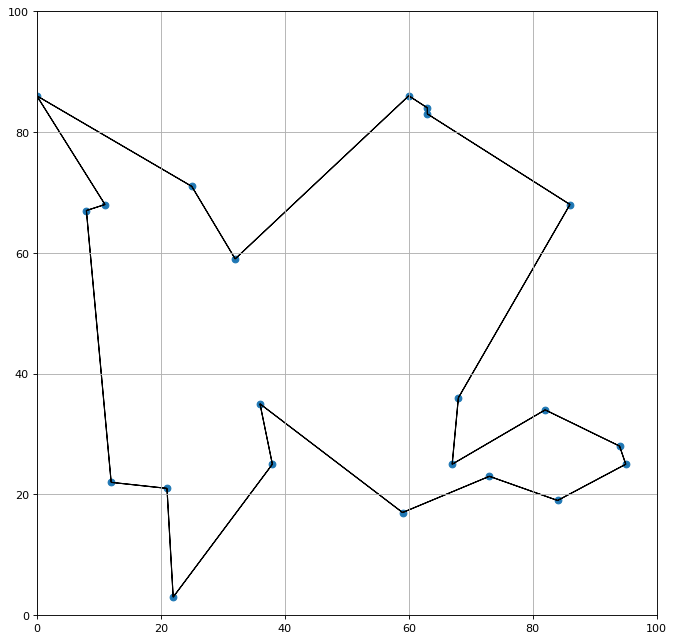

126	396   	436.895	96.5773	398.432	1178.27


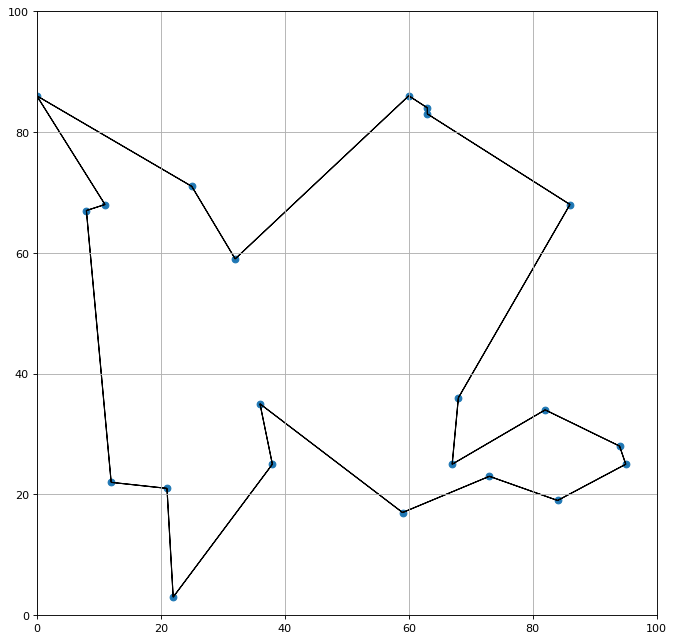

127	400   	440.862	103.983	398.432	908.22 


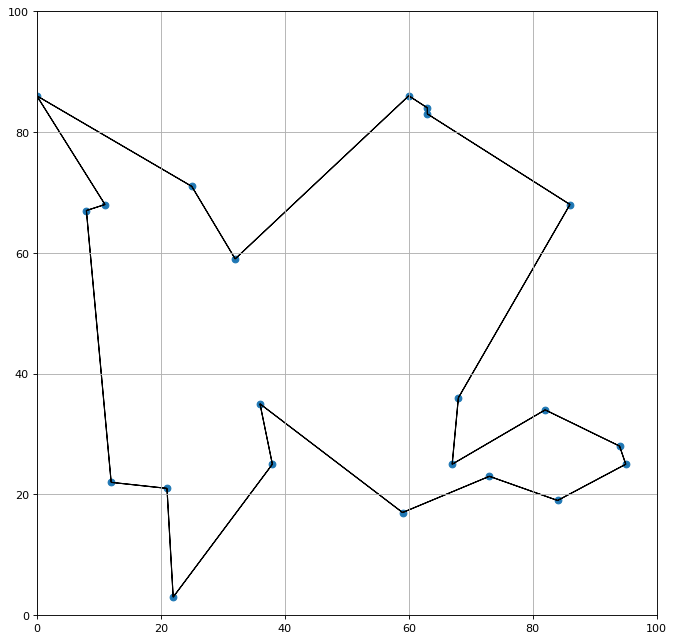

128	408   	435.075	94.0029	398.432	935.947


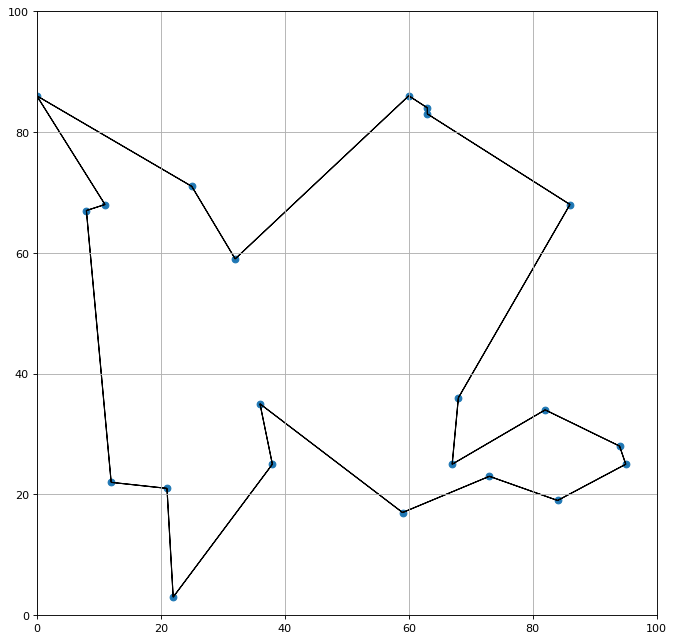

129	393   	442.92 	104.084	398.432	1119.65


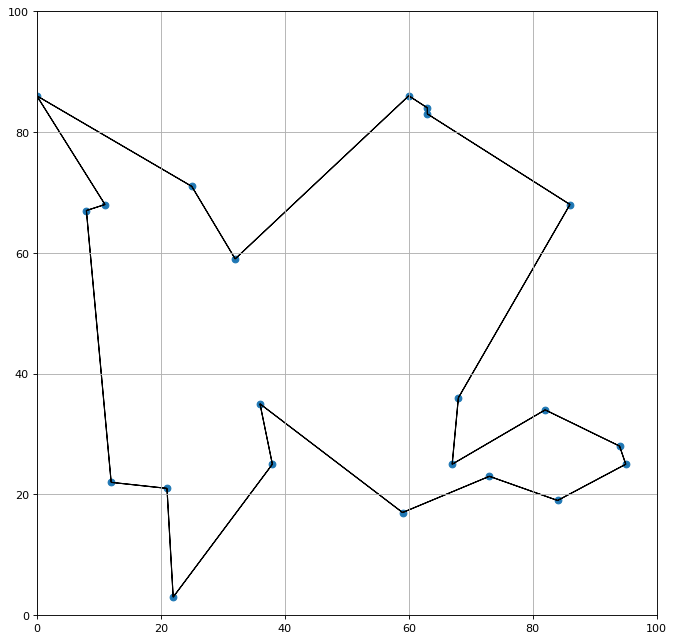

130	392   	445.133	107.168	398.432	1031.81


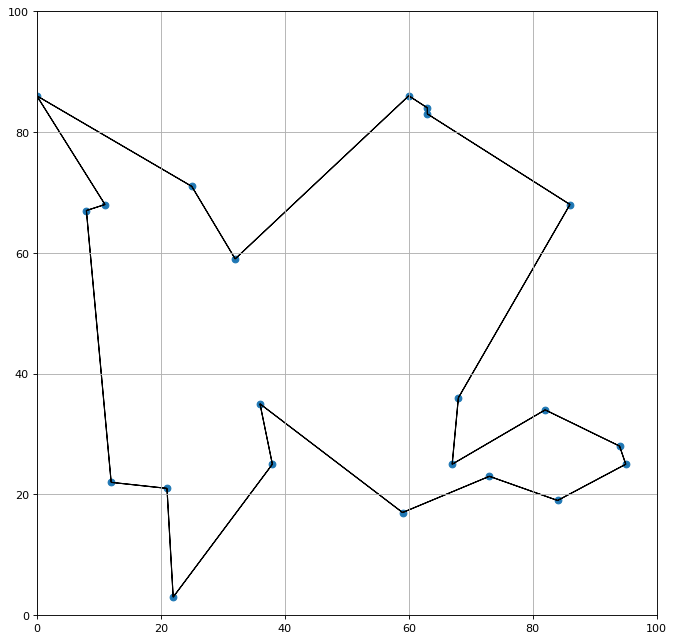

131	400   	448.712	109.406	398.432	996.767


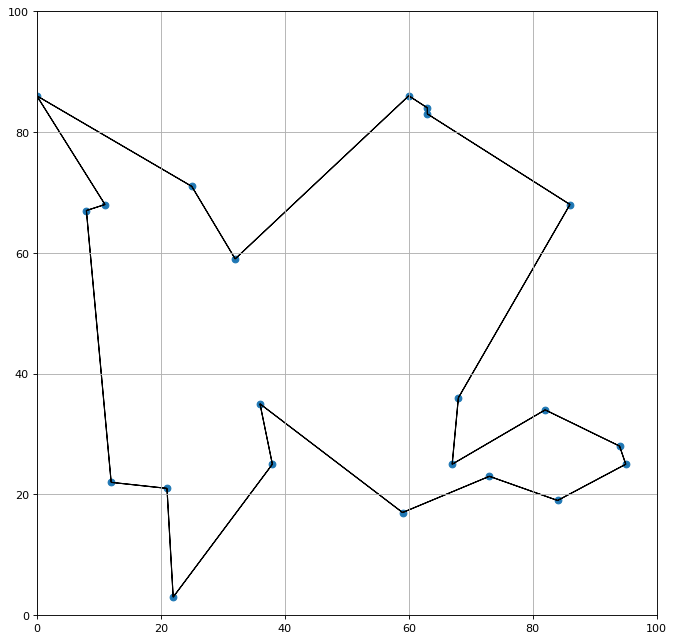

132	385   	439.944	102.577	398.432	952.643


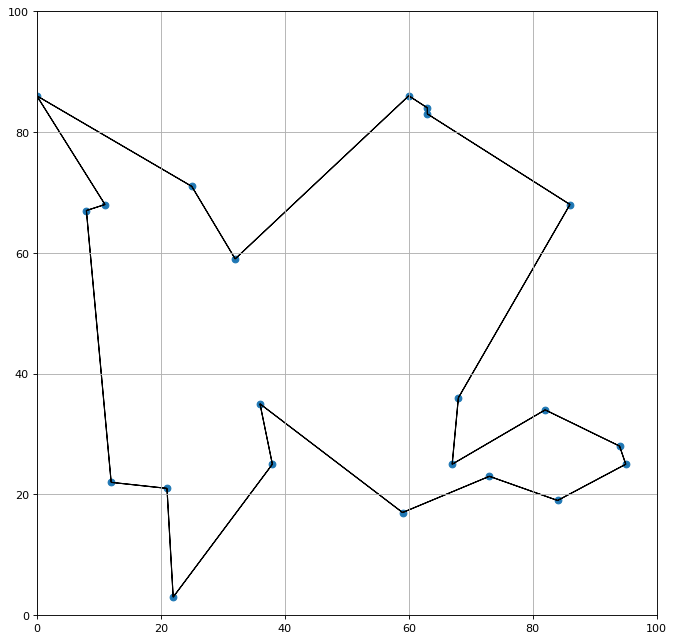

133	402   	441.941	98.7679	398.432	965.904


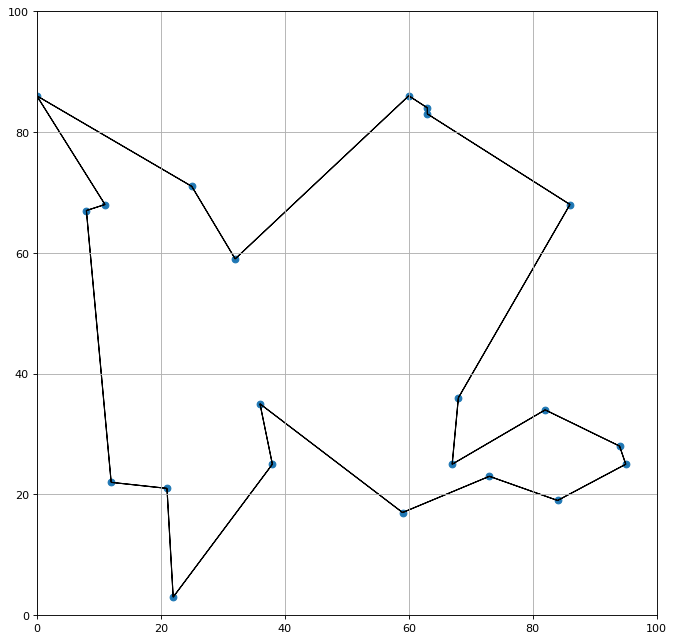

134	399   	435.994	93.5506	398.432	986.633


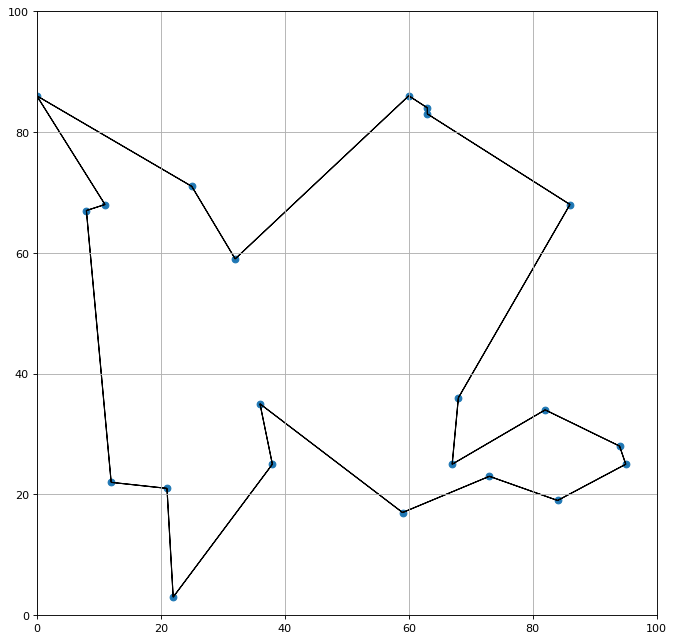

135	398   	441.337	102.134	398.432	1056.88


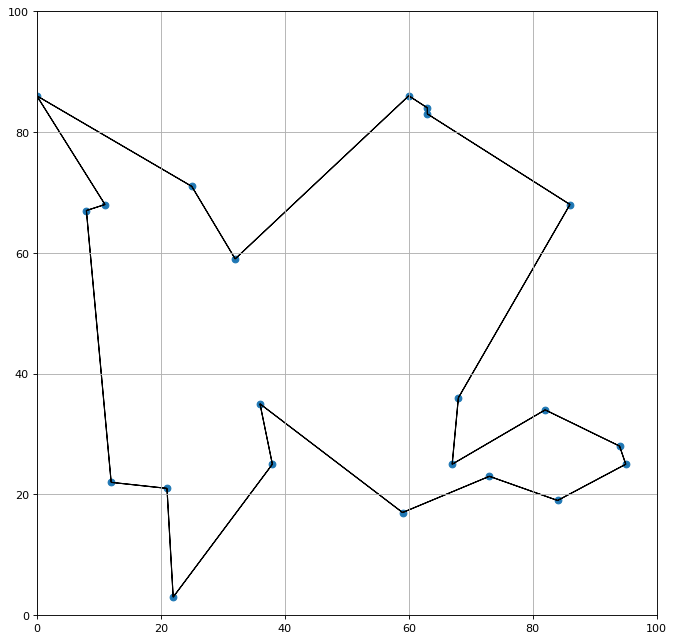

136	398   	446.518	105.534	398.432	1089.99


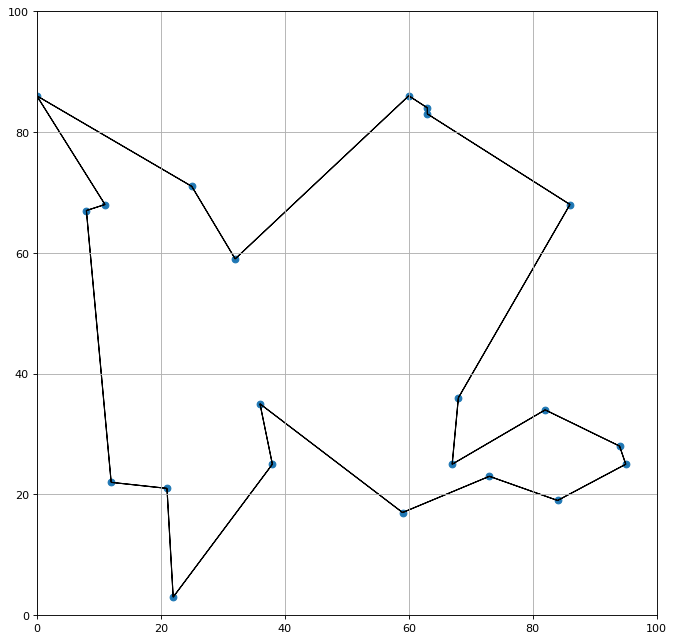

137	398   	445.421	109.154	398.432	984.83 


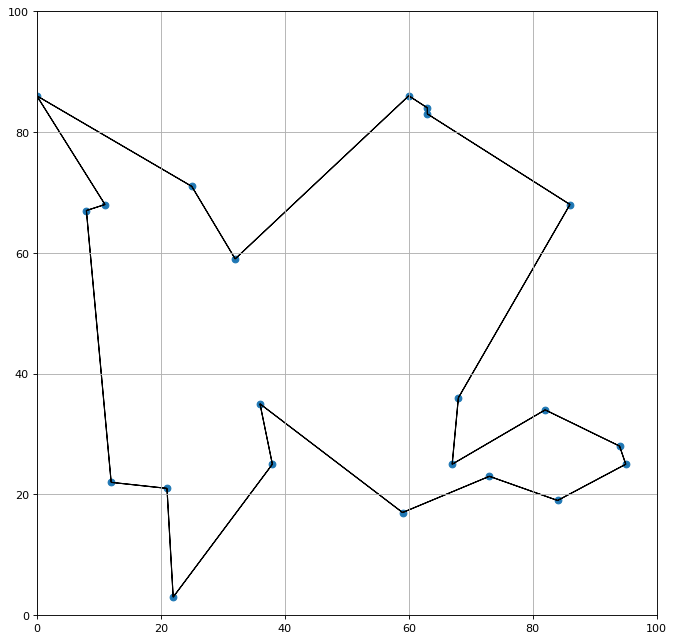

138	406   	443.236	104.979	398.432	964.161


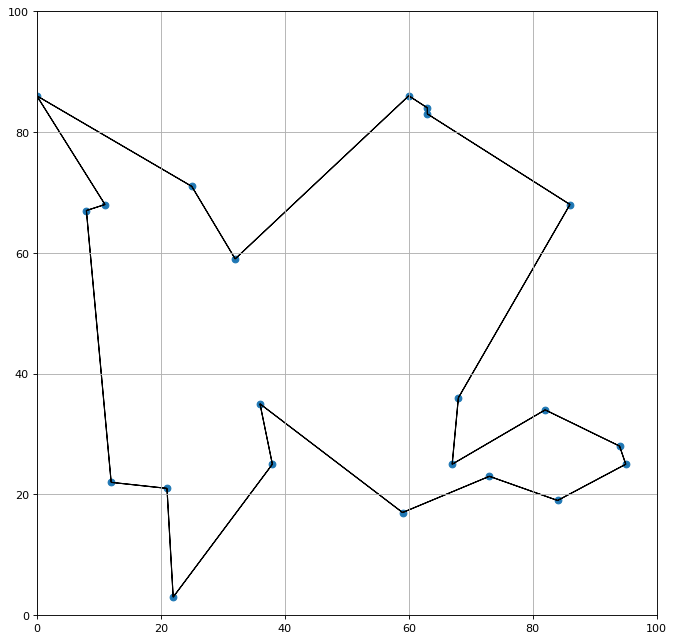

139	388   	445.192	106.839	398.432	970.16 


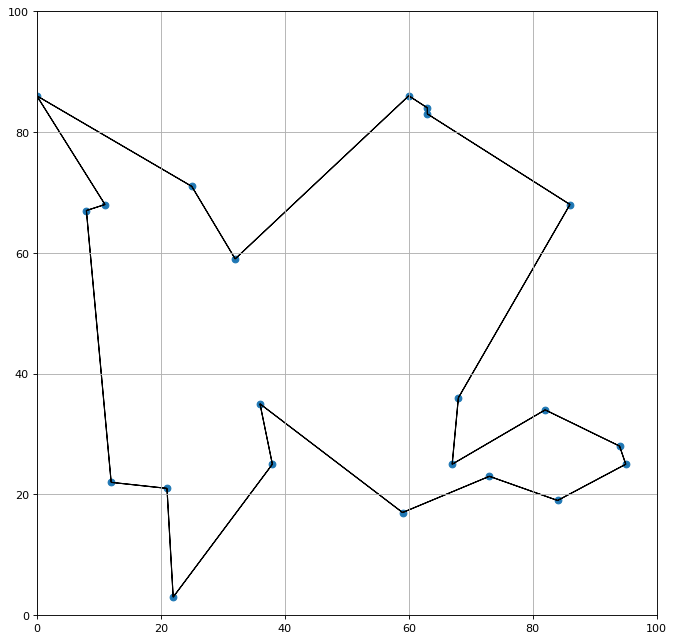

140	395   	437.956	94.2984	398.432	913.722


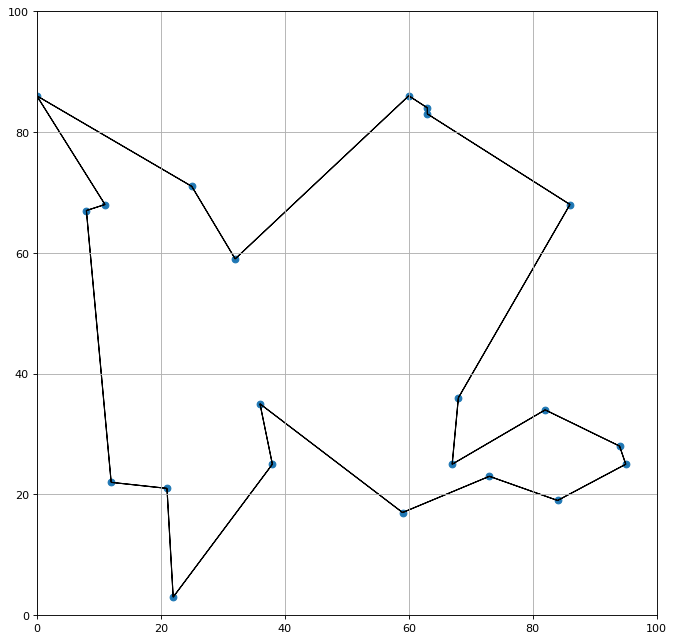

141	406   	440.805	102.005	398.432	943.048


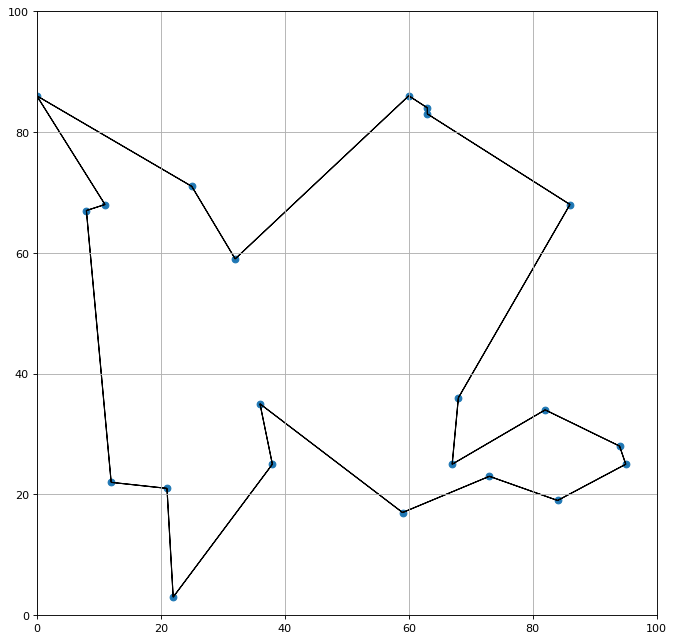

142	416   	437.736	101.858	398.432	953.458


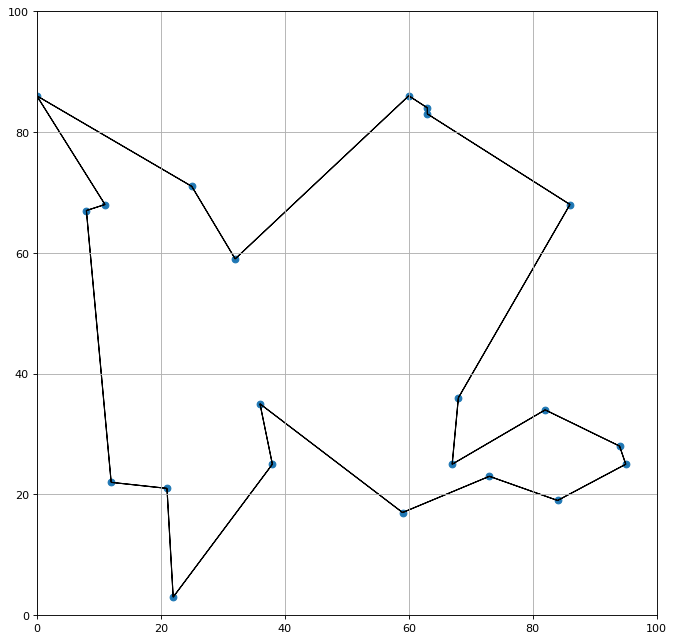

143	420   	433.446	88.6285	398.432	964.608


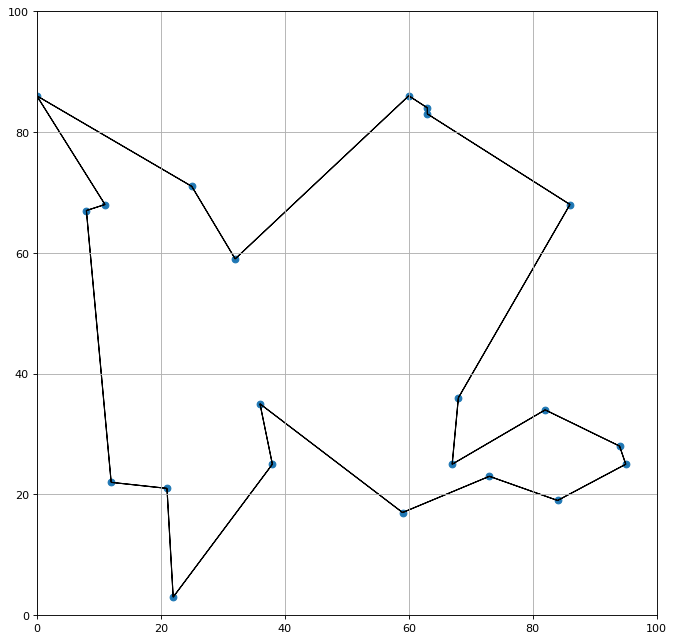

144	392   	440.761	105.495	398.432	1094.39


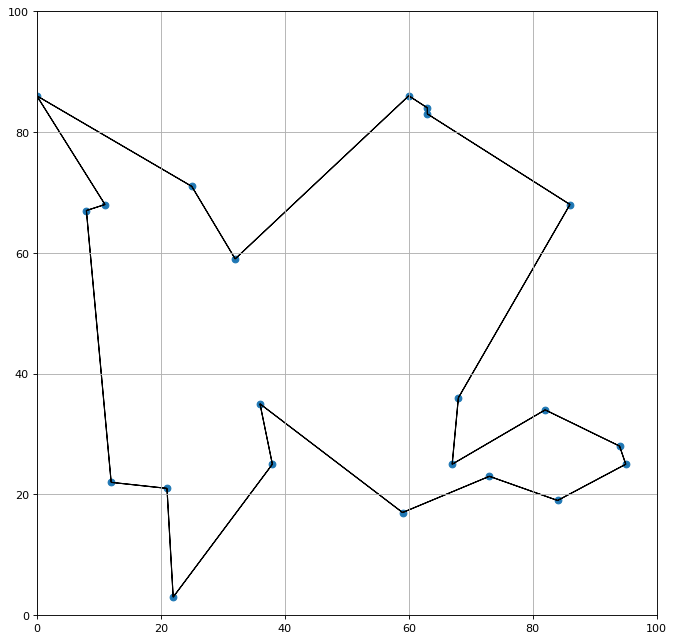

145	394   	435.93 	94.8109	398.432	1001.29


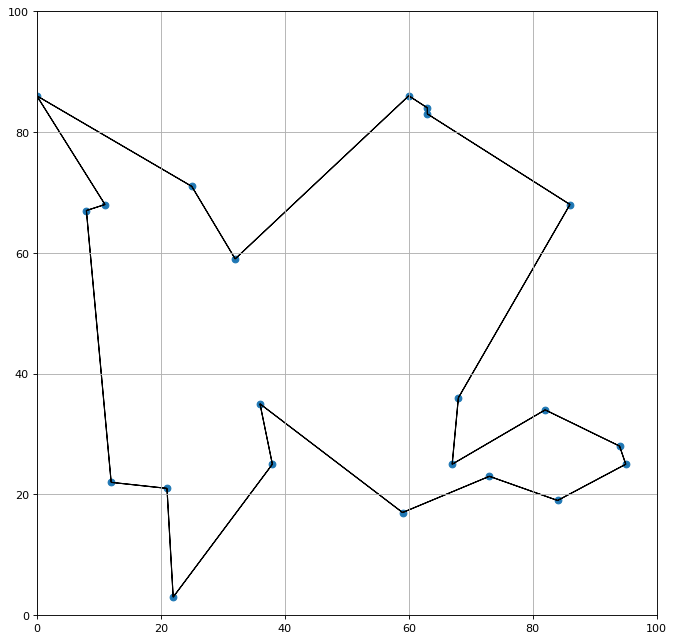

146	407   	448.784	109.122	398.432	1081.47


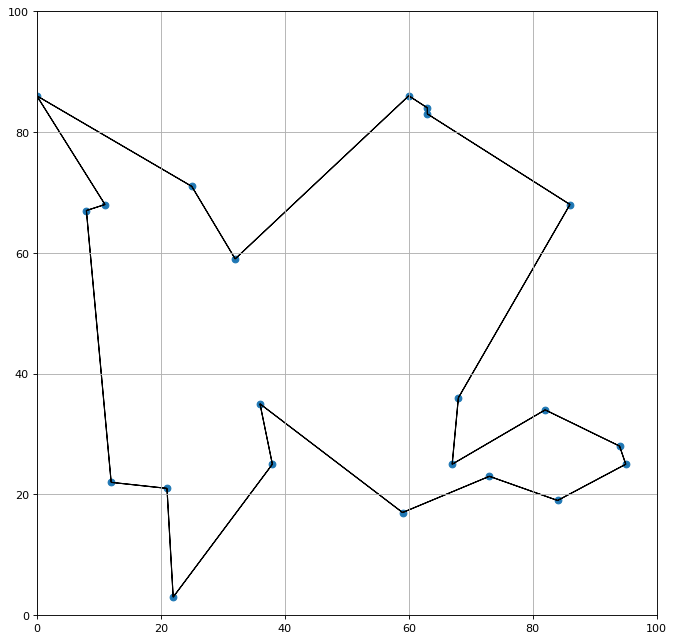

147	395   	438.902	100.477	398.432	1010.95


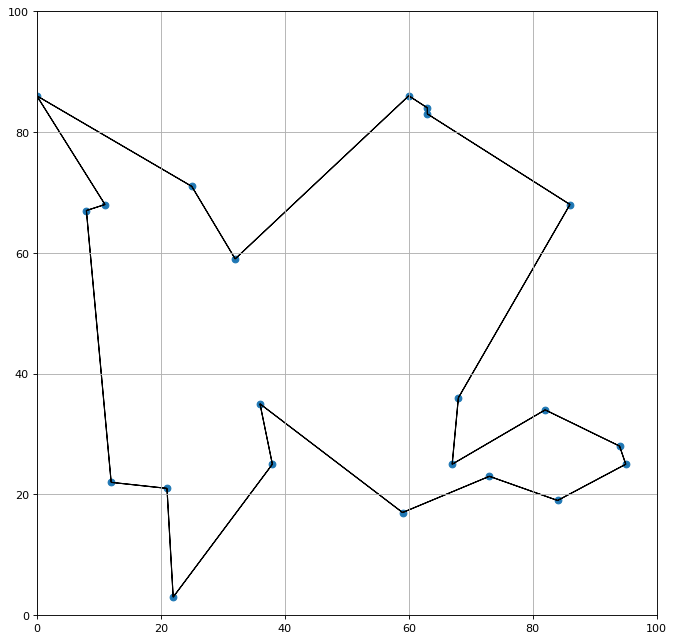

148	420   	433.979	88.8478	398.432	937.567


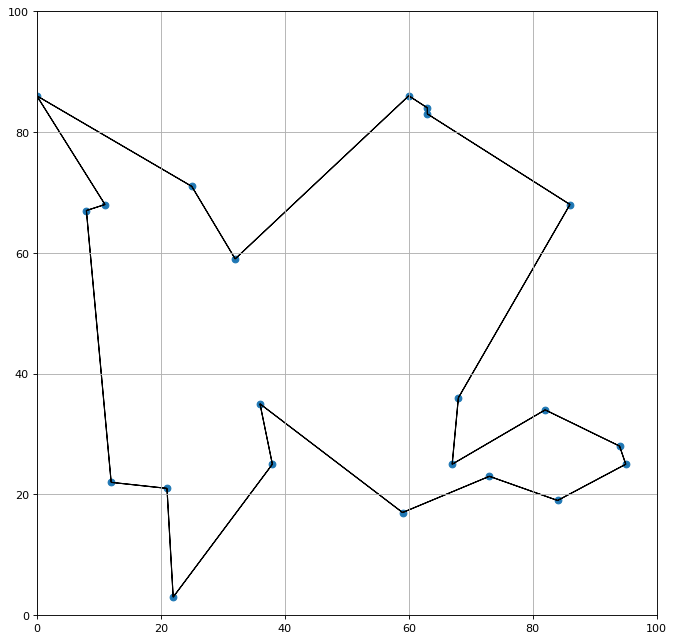

149	399   	435.284	91.2349	398.432	839.403


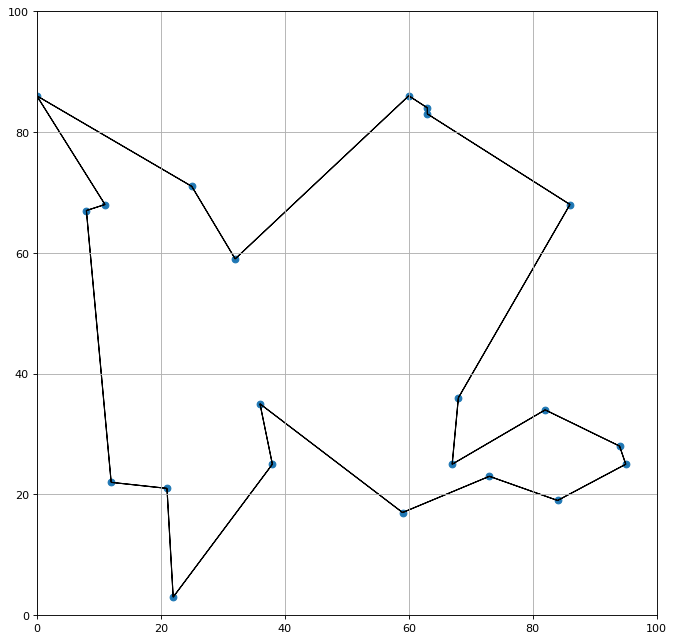

150	411   	439.305	98.9339	398.432	956.301


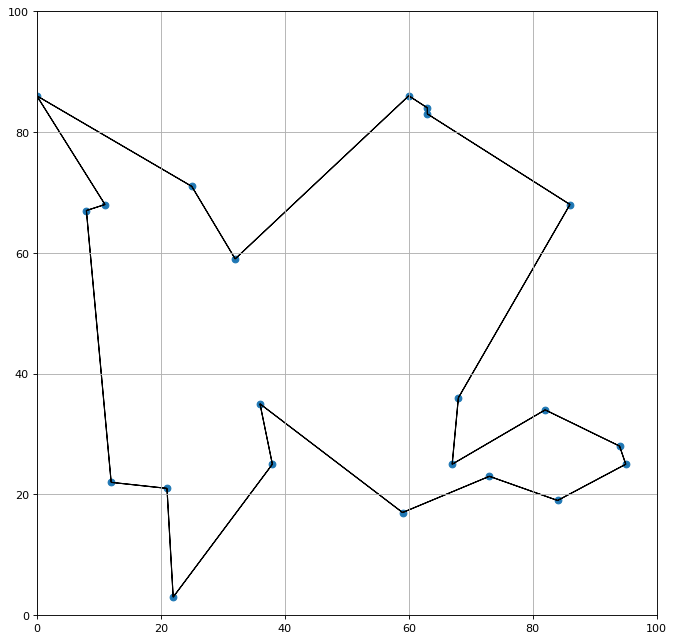

151	379   	452.049	117.106	398.432	950.866


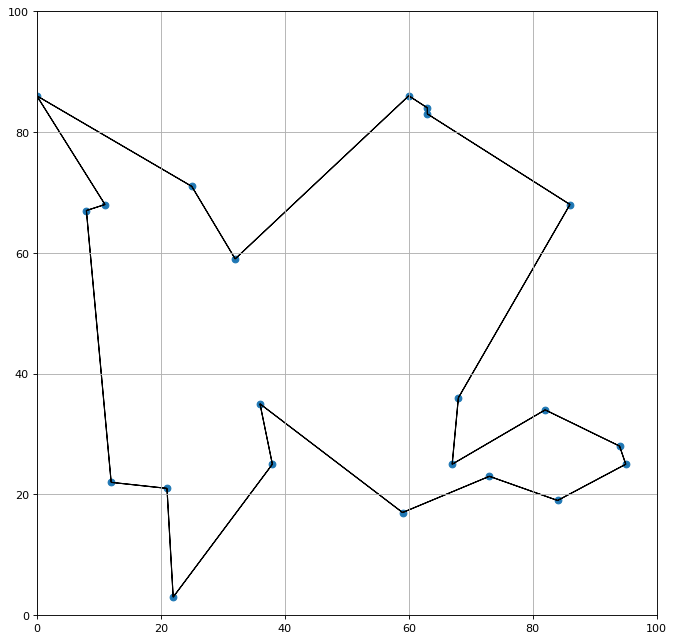

152	398   	441.413	99.9332	398.432	960.314


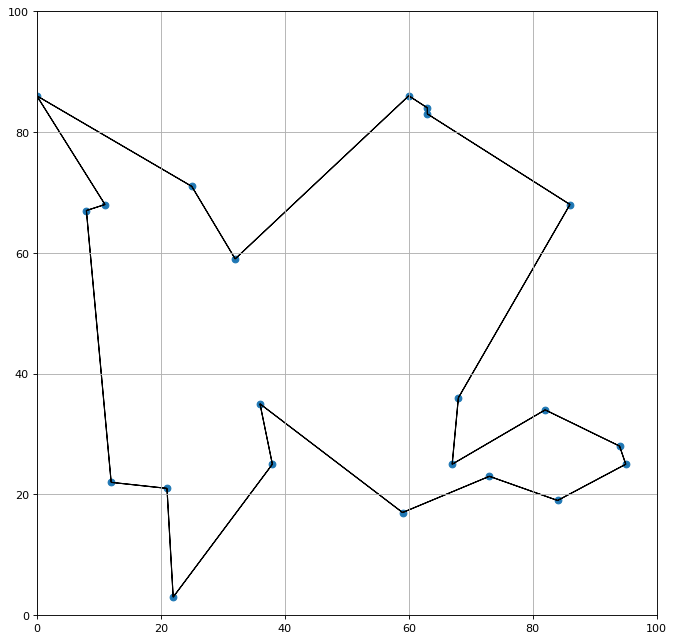

153	404   	437.727	98.316 	398.432	943.377


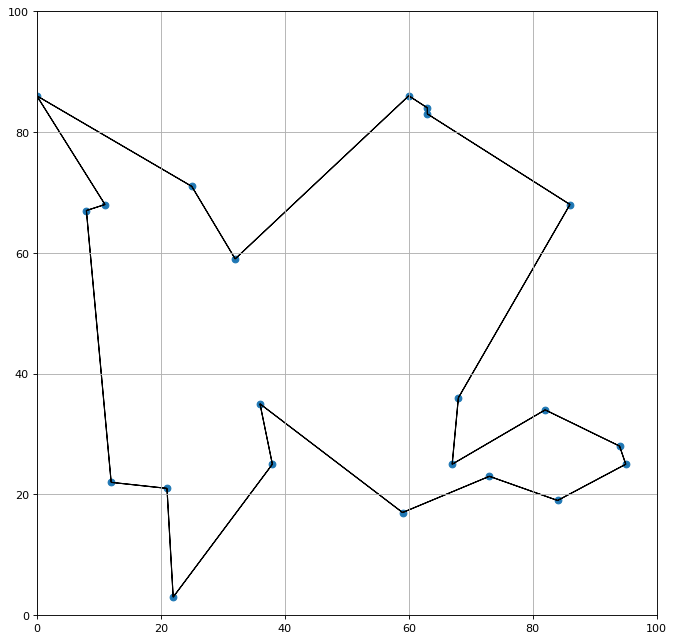

154	383   	434.915	86.1073	398.432	880.401


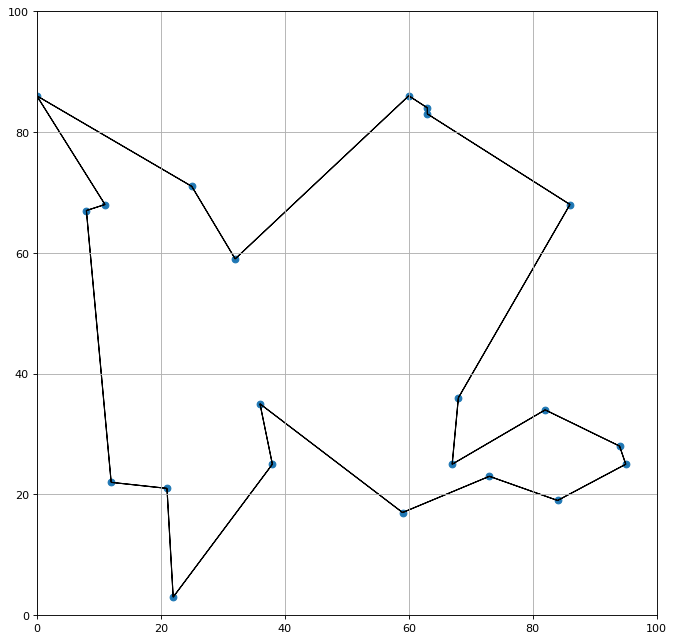

155	399   	436.906	103.785	398.432	1012.44


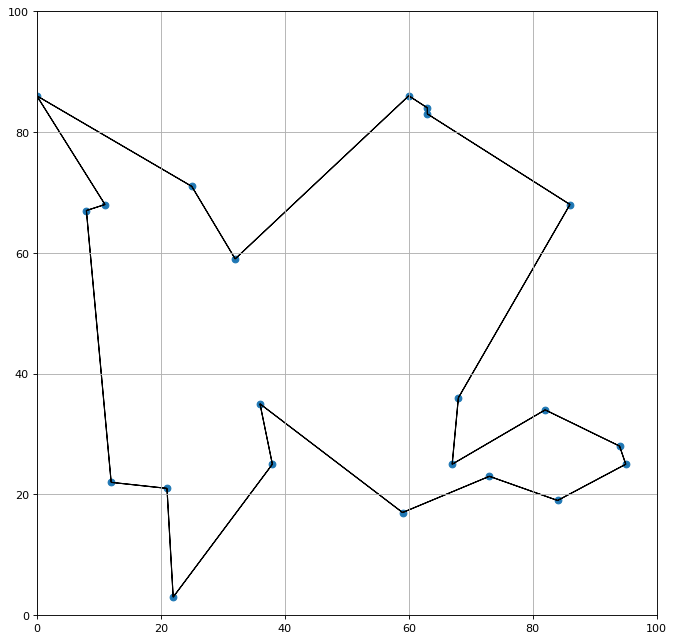

156	382   	440.204	103.039	398.432	1051.1 


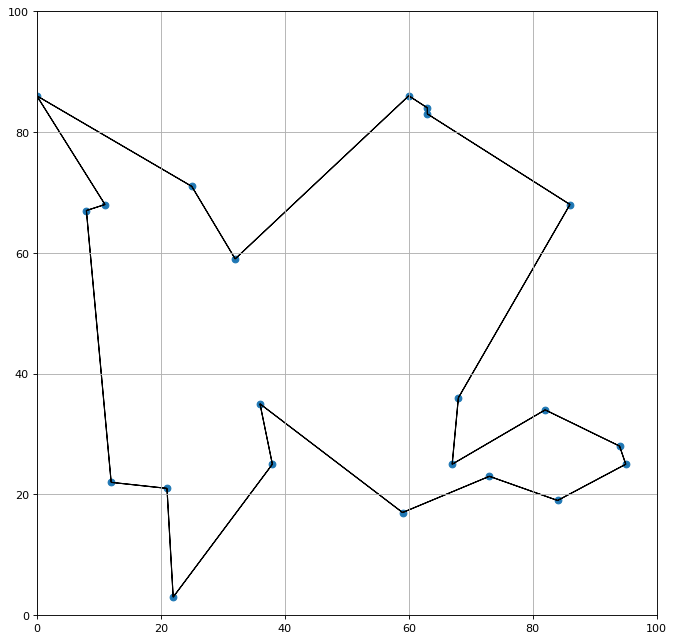

157	404   	436.008	91.0623	398.432	946.592


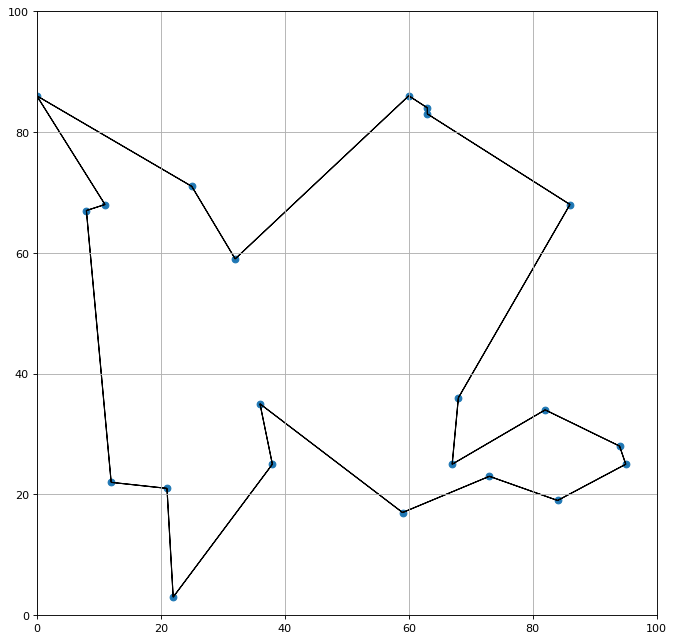

158	382   	447.189	104.871	398.432	965.808


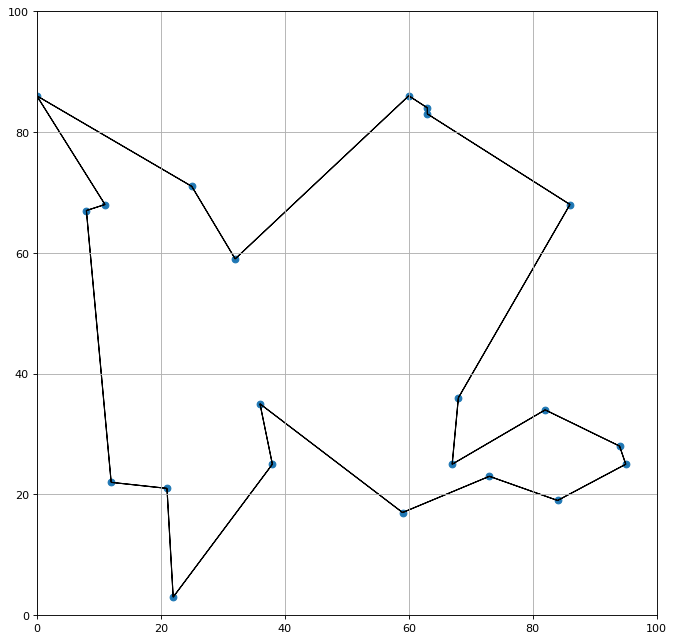

159	401   	443.767	104.743	398.432	1072.6 


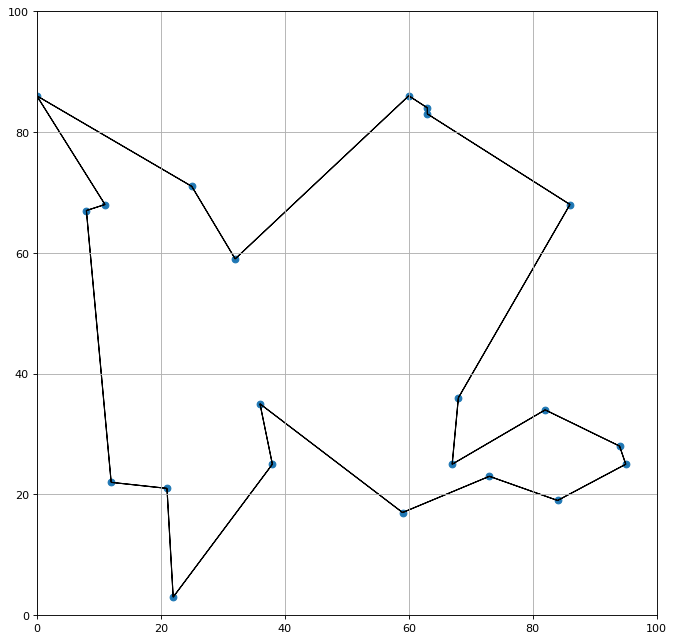

160	394   	441.398	99.2241	398.432	1024.3 


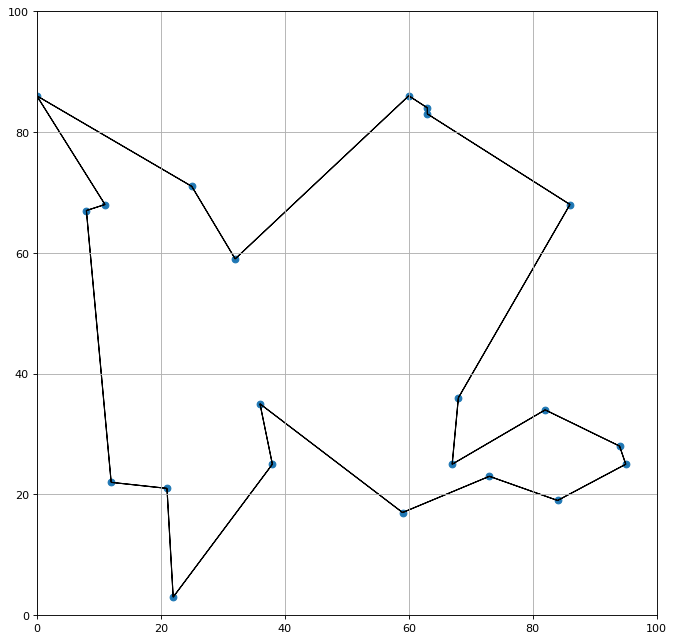

161	388   	439.528	98.3588	398.432	888.828


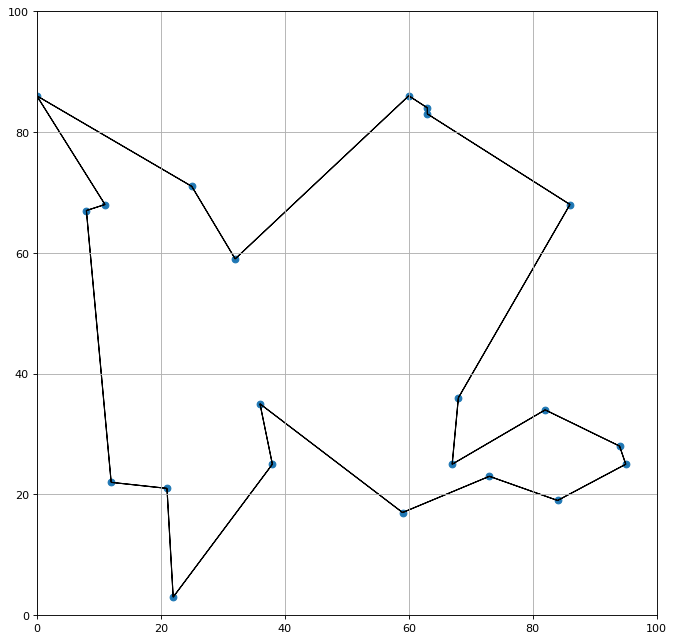

162	383   	437.415	95.8591	398.432	992.556


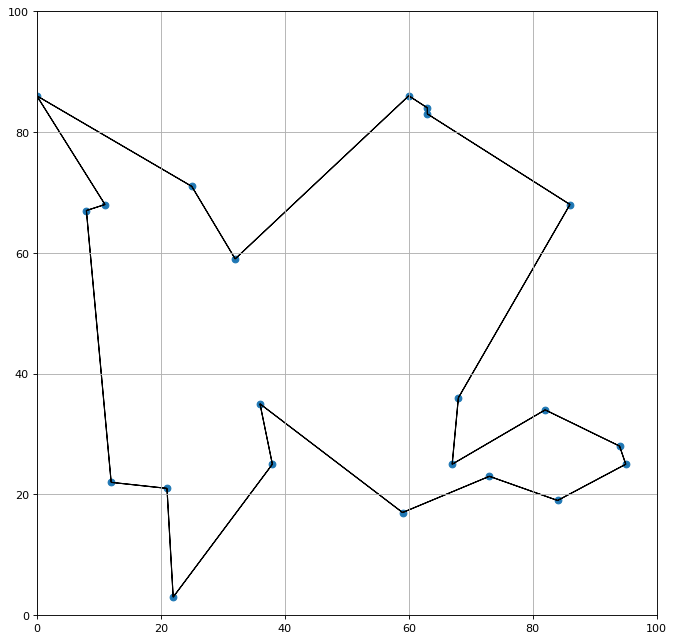

163	393   	438.772	99.1834	398.432	1065.43


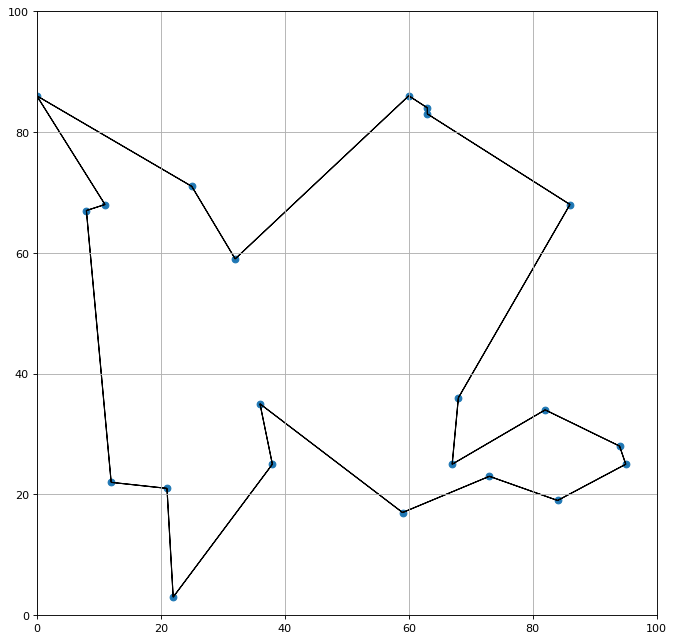

164	373   	443.378	112.777	398.432	1128.4 


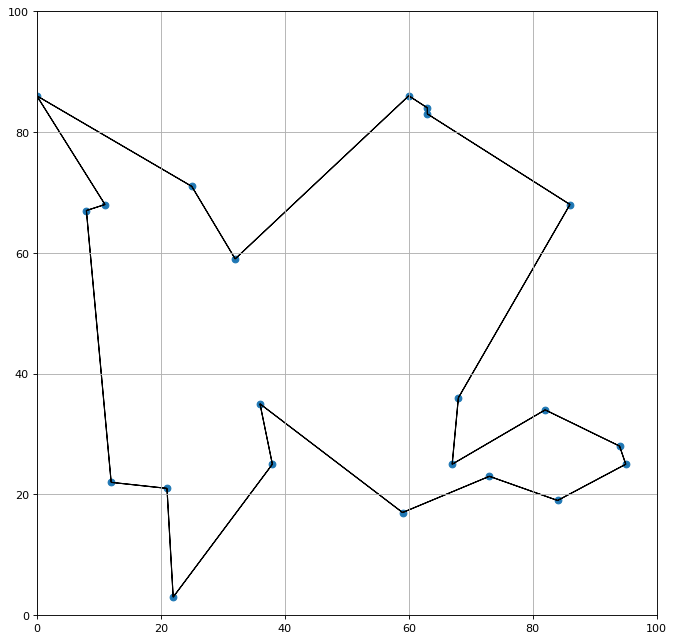

165	415   	443.784	105.583	398.432	1007.13


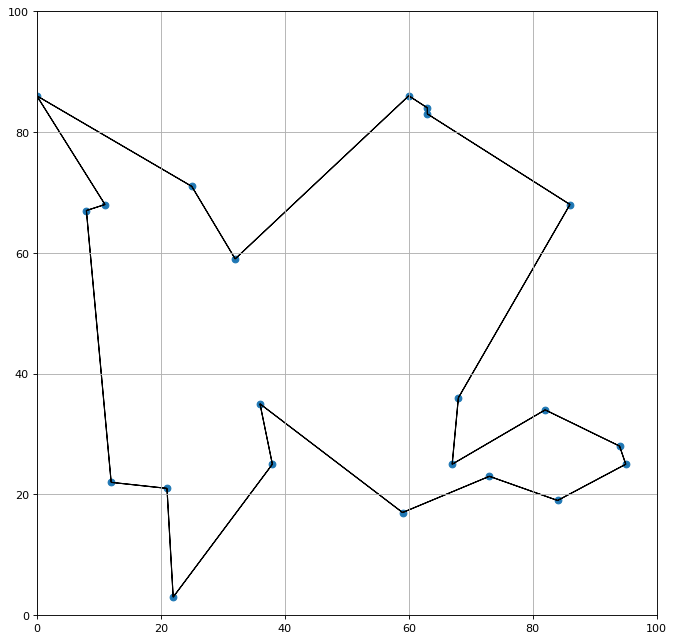

166	422   	440.883	99.2646	398.432	929.618


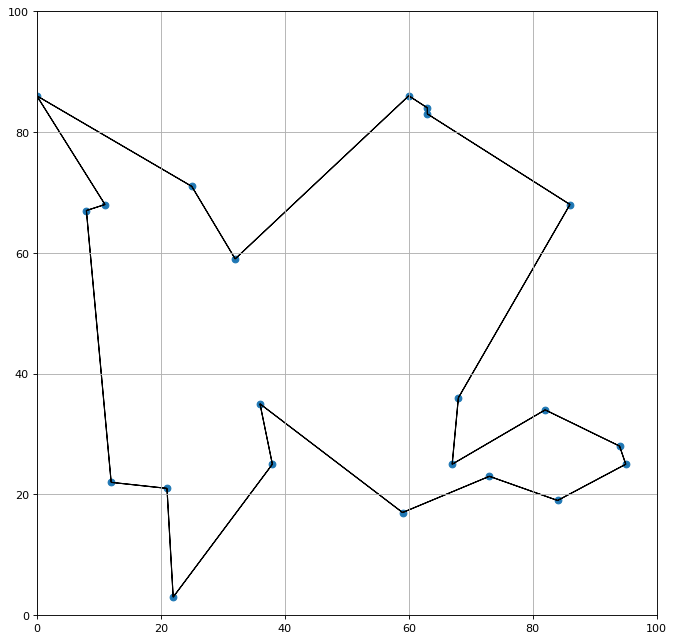

167	390   	449.402	112.204	398.432	1047.3 


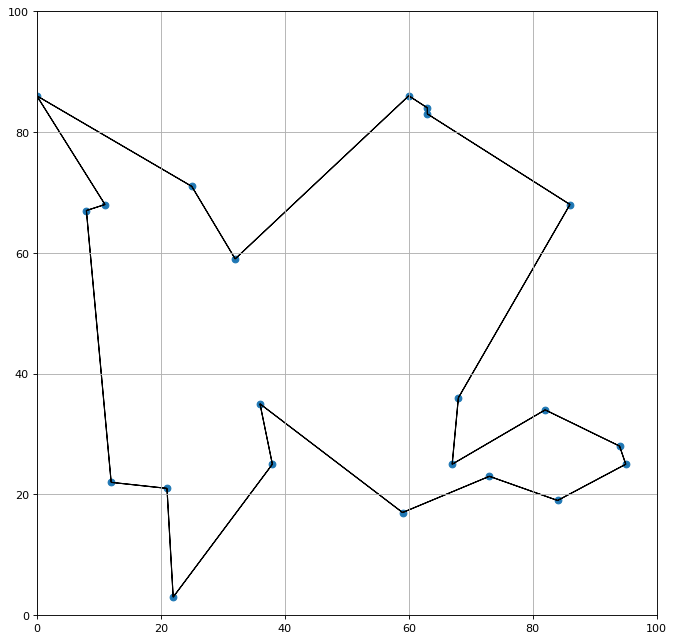

168	392   	441.29 	105.458	398.432	1029.8 


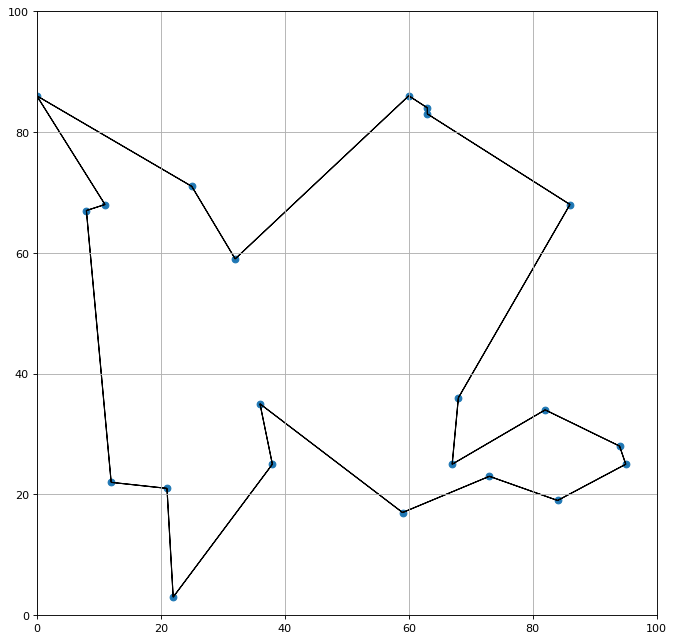

169	387   	441.789	108.397	398.432	1141.19


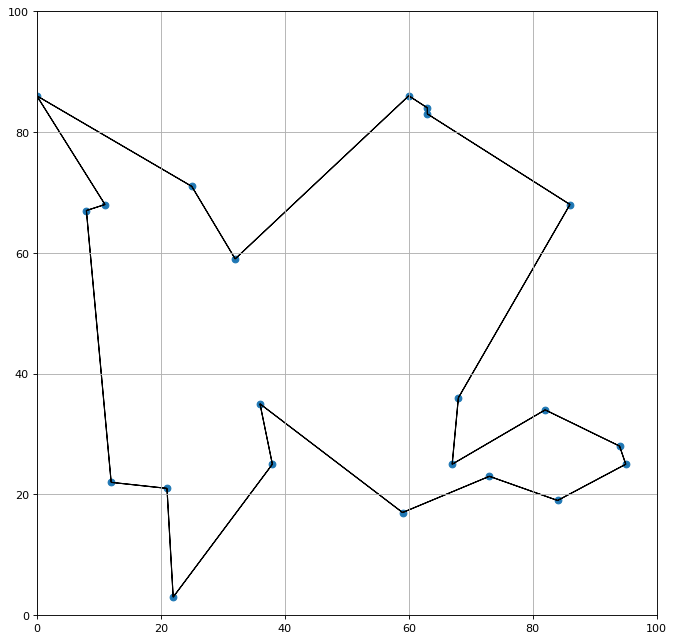

170	376   	435.945	93.8457	398.432	949.563


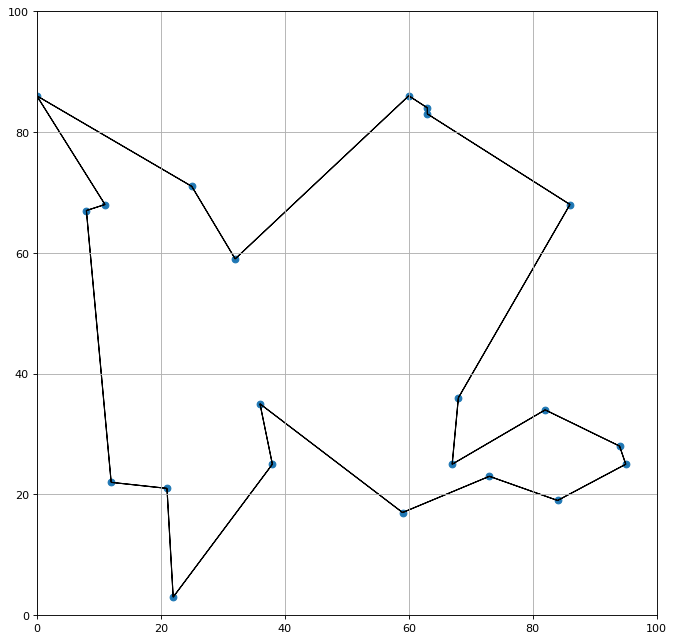

171	406   	448.586	107.998	398.432	1042.42


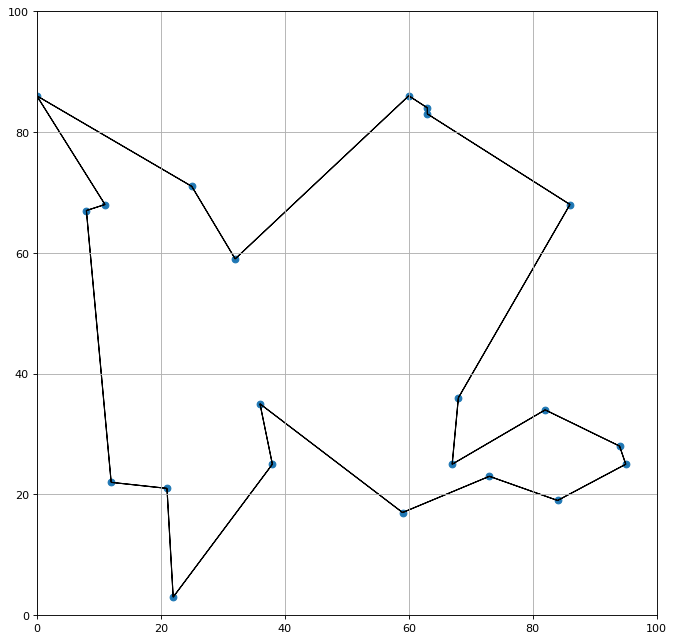

172	416   	441.52 	96.3792	398.432	876.86 


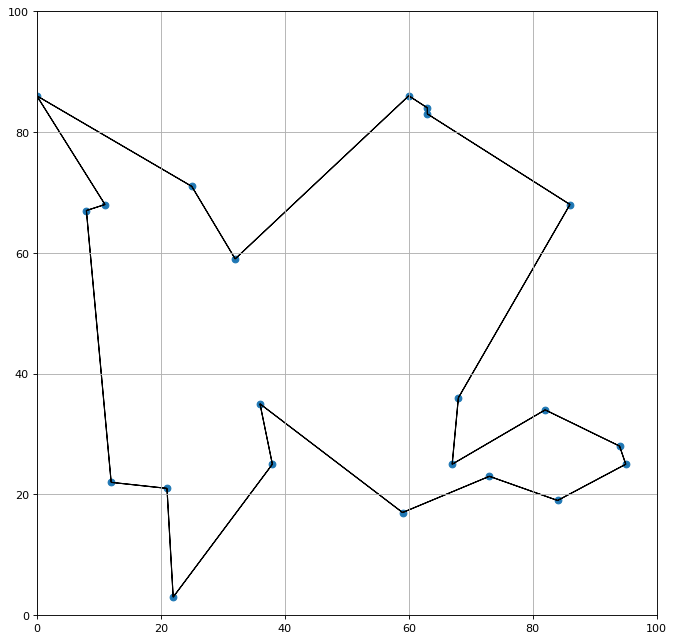

173	427   	443.752	104.825	398.432	995.477


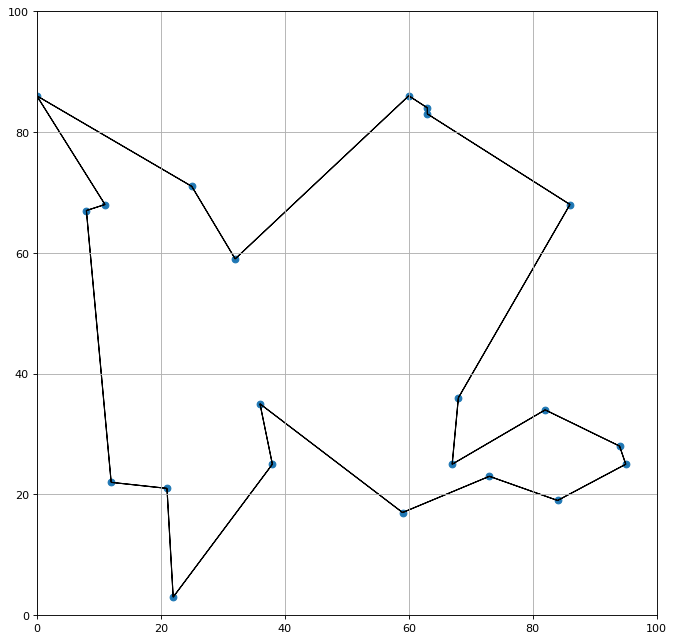

174	401   	436.749	102.207	398.432	1128.99


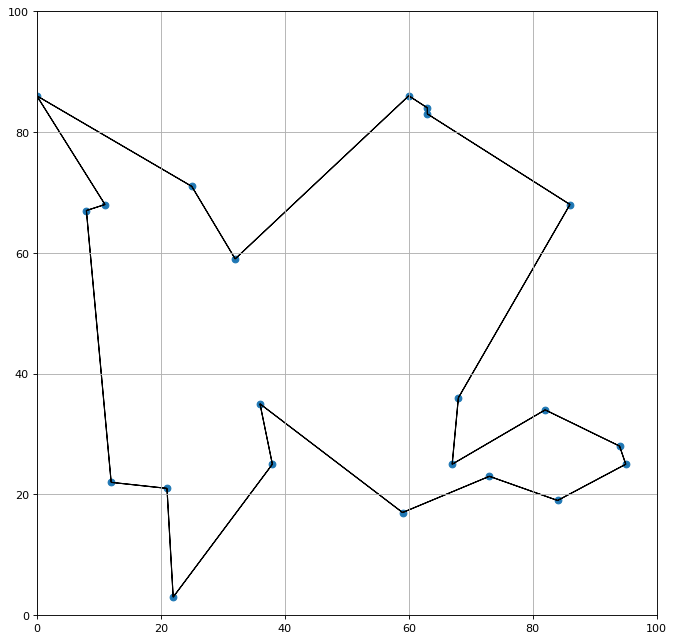

175	404   	435.345	91.6965	398.432	910.769


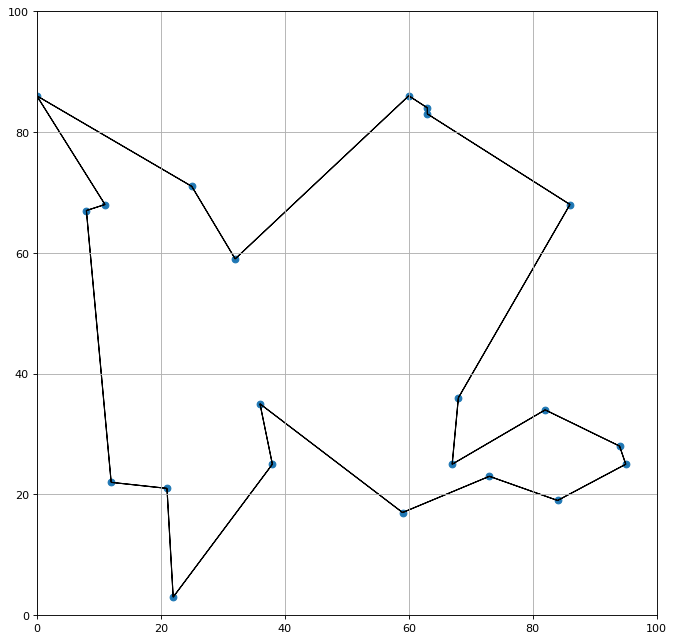

176	404   	441.002	101.057	398.432	994.311


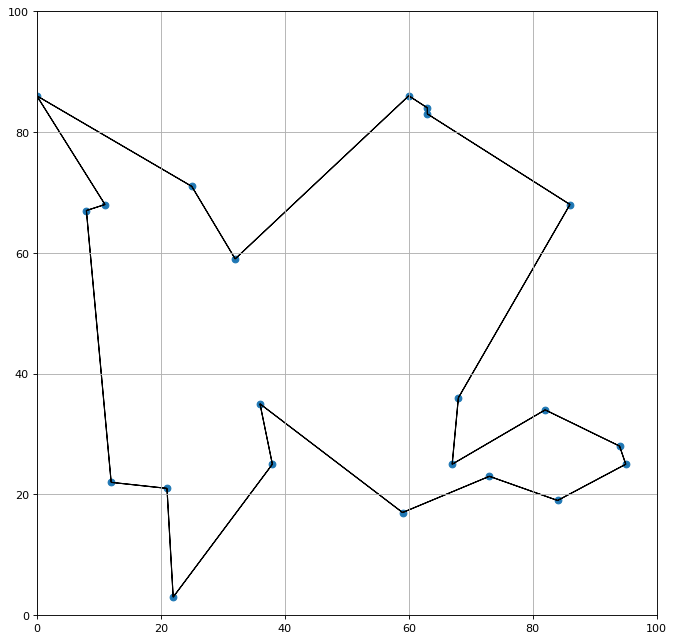

177	416   	440.811	105.99 	398.432	982.154


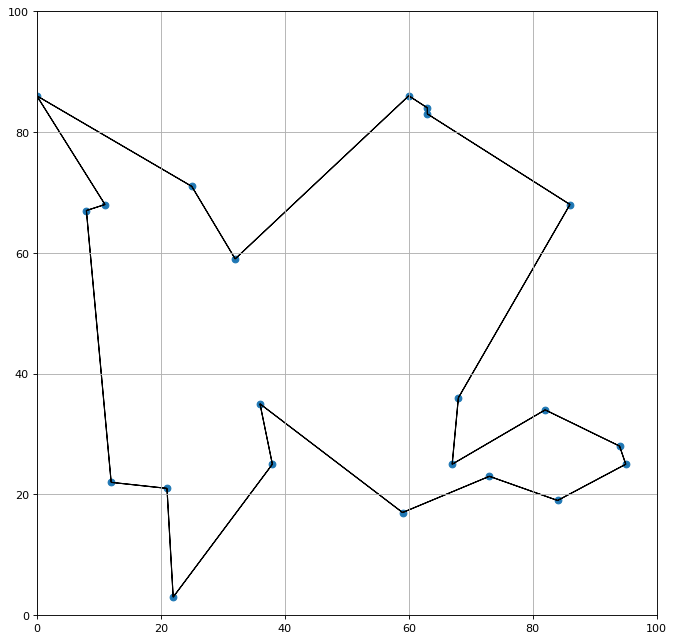

178	407   	441.129	97.4868	398.432	905.116


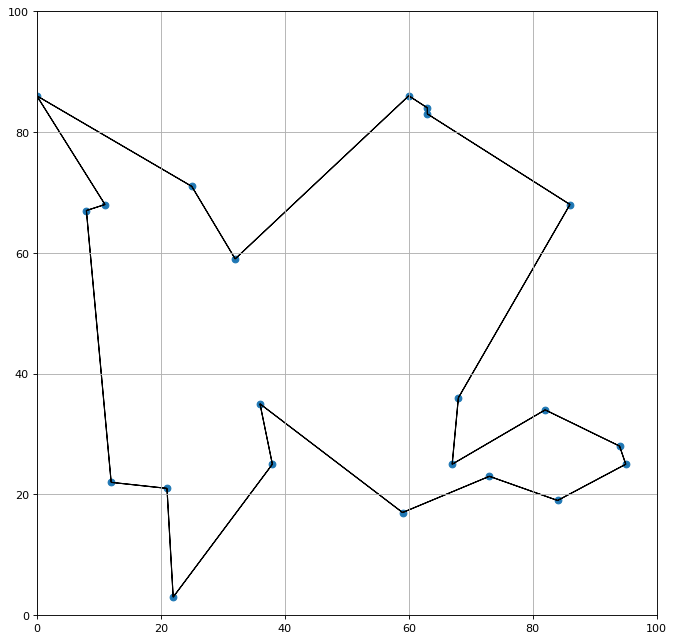

179	395   	441.023	106.03 	398.432	1101.32


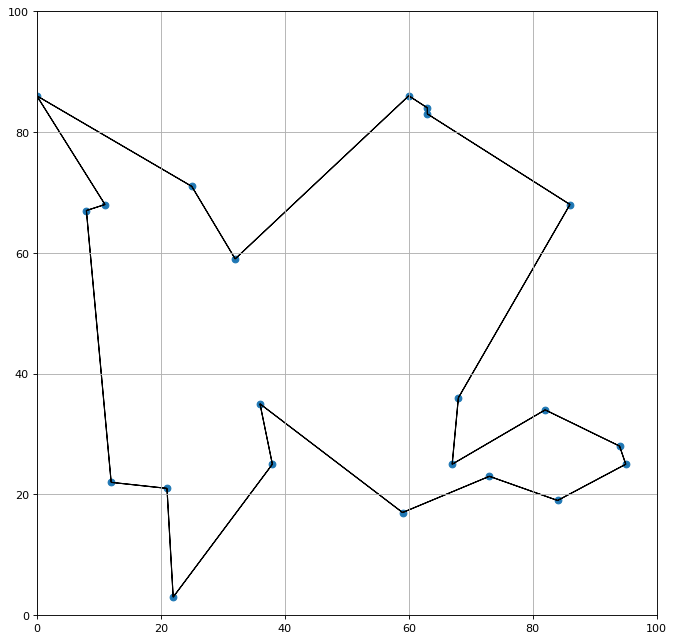

180	403   	439.054	103.004	398.432	1030.81


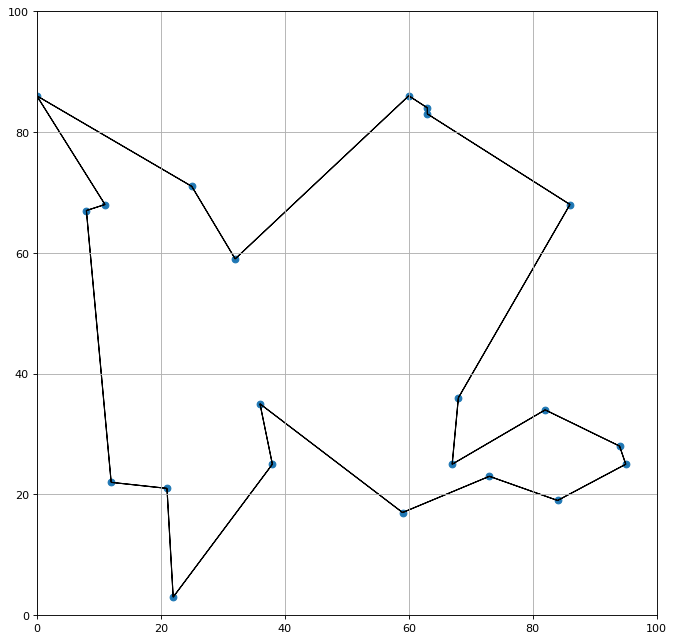

181	390   	442.179	104.858	398.432	911.47 


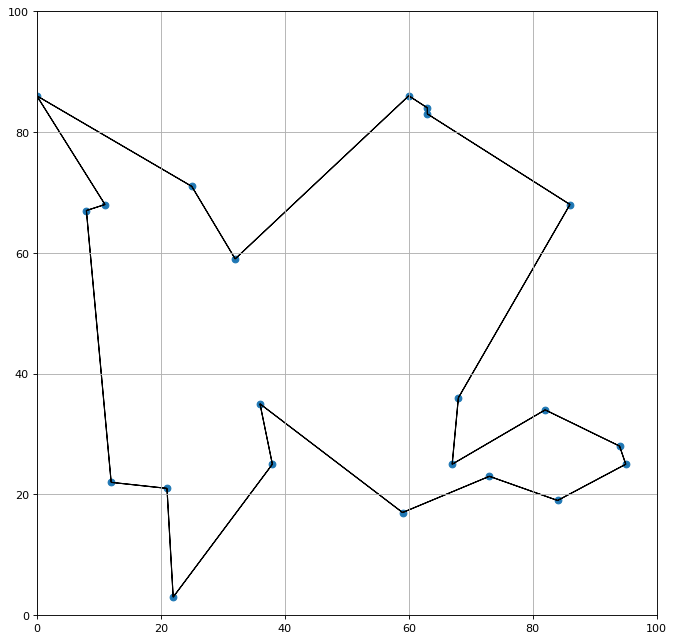

182	403   	448.828	112.866	398.432	951.514


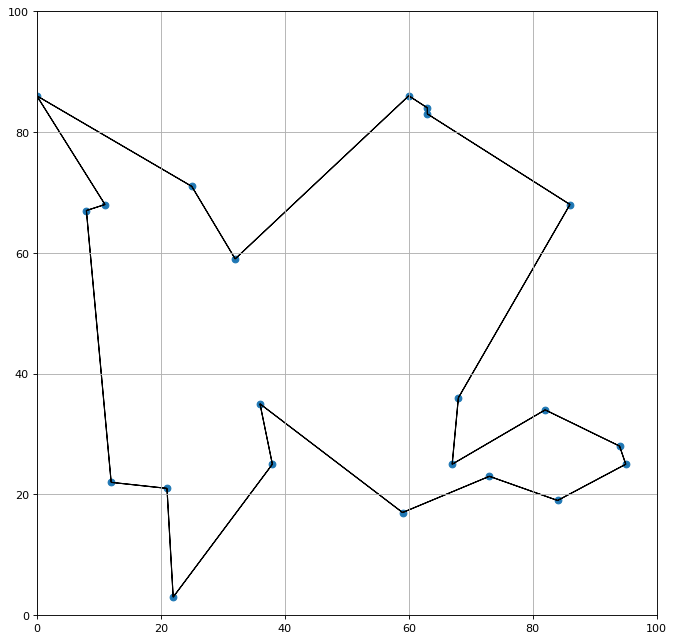

183	407   	437.536	98.9707	398.432	986.868


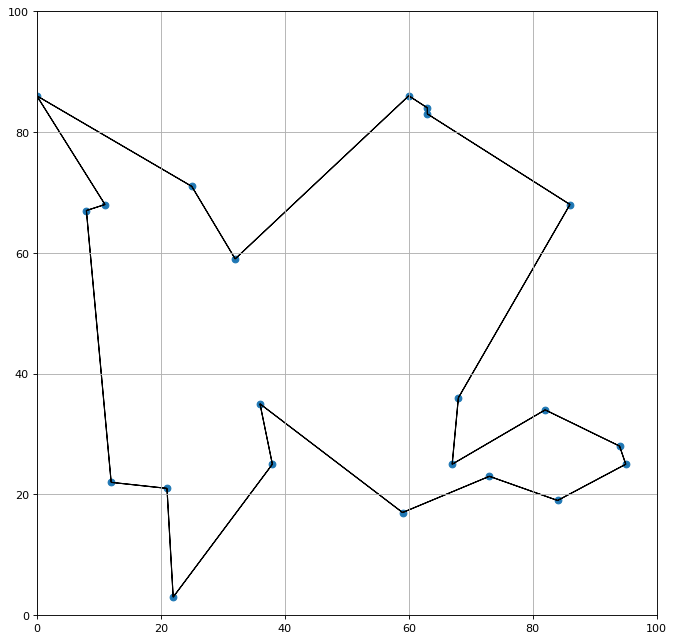

184	389   	448.172	111.879	398.432	956.202


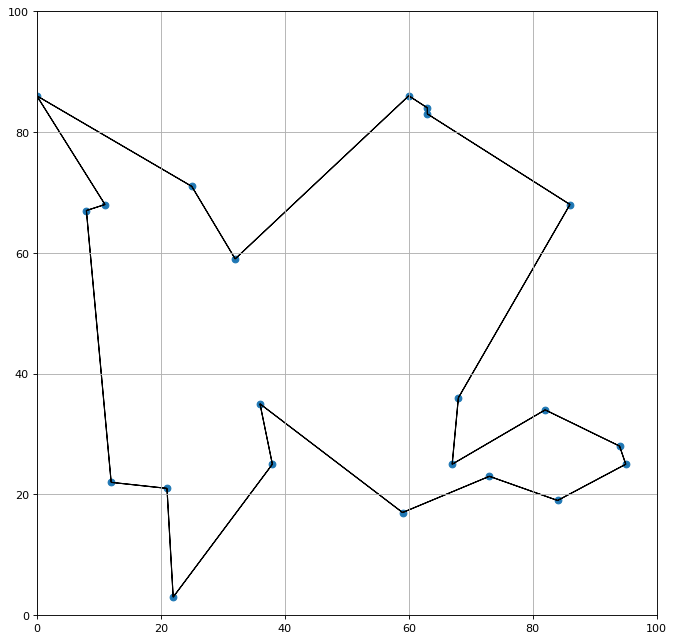

185	396   	440.878	99.7637	398.432	968.891


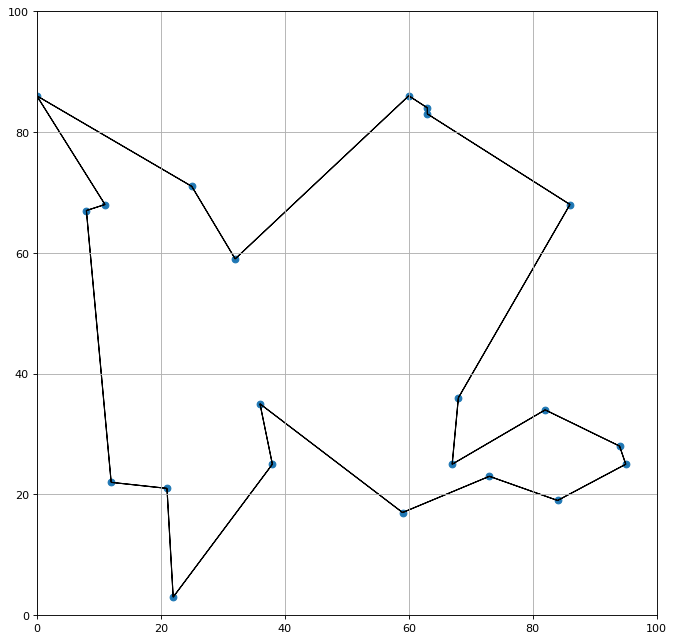

186	386   	443.011	102.073	398.432	1020.46


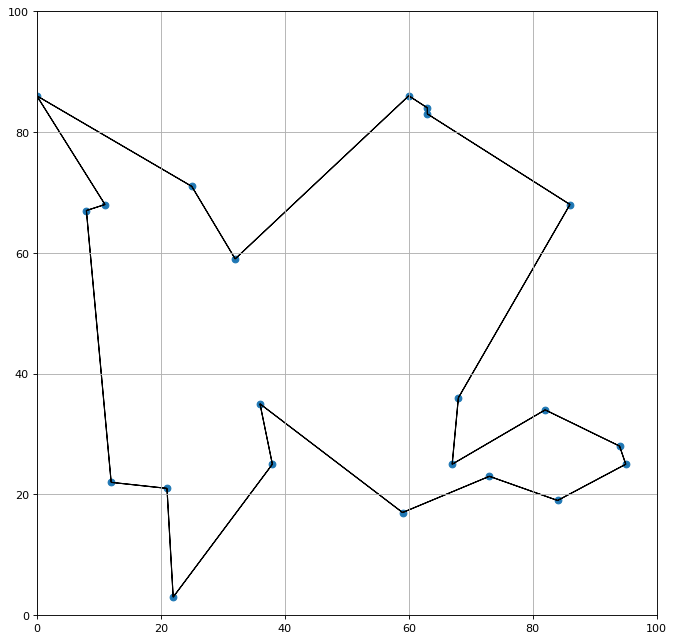

187	386   	447.306	109.786	398.432	1034.82


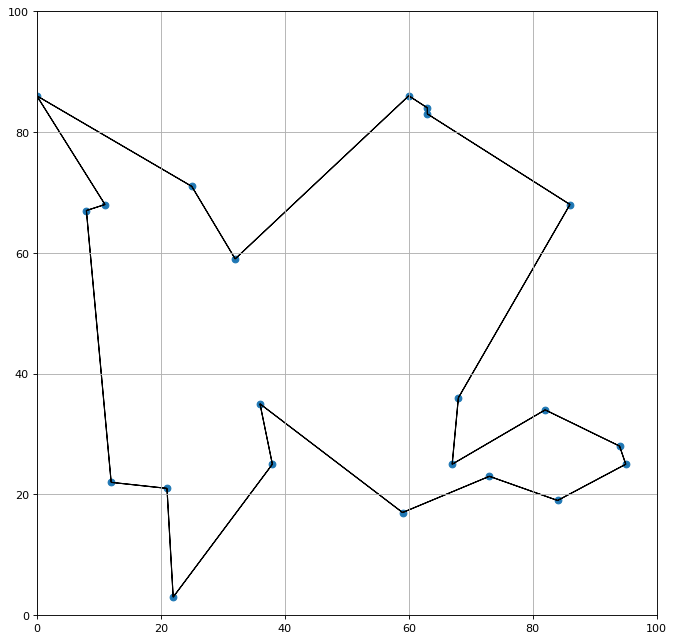

188	381   	441.503	97.3708	398.432	869.816


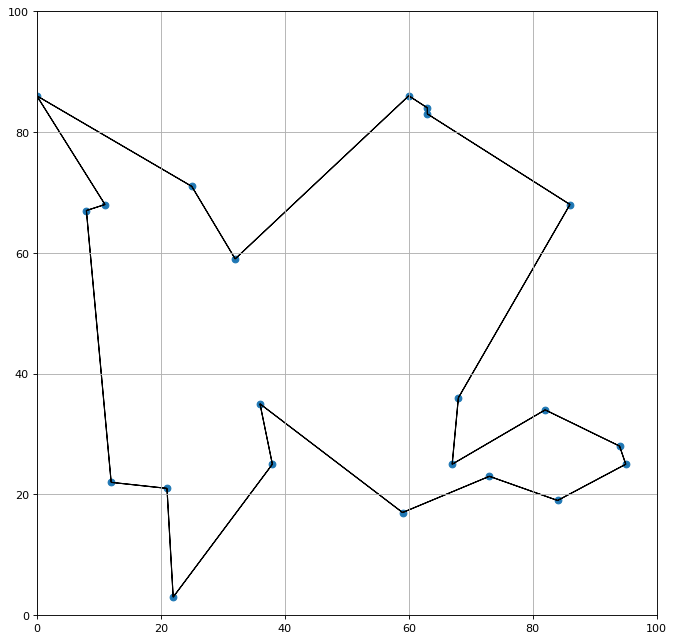

189	361   	442.156	102.738	398.432	911.146


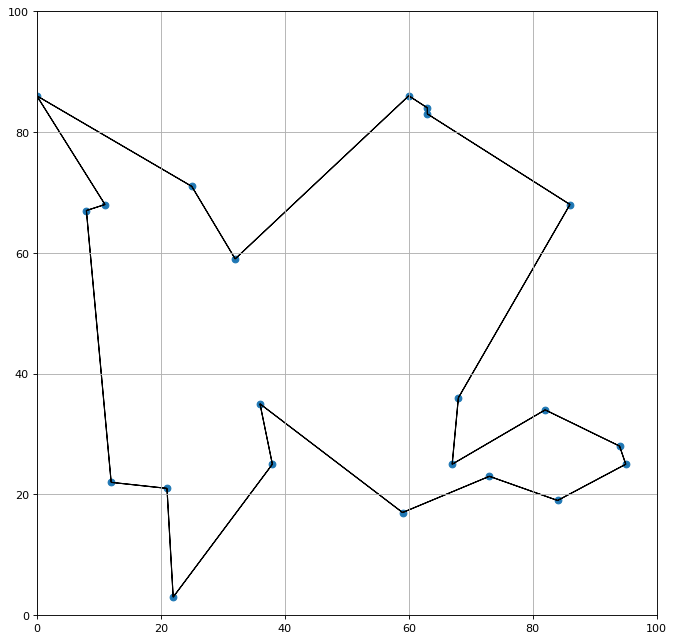

190	398   	443.299	102.557	398.432	997.132


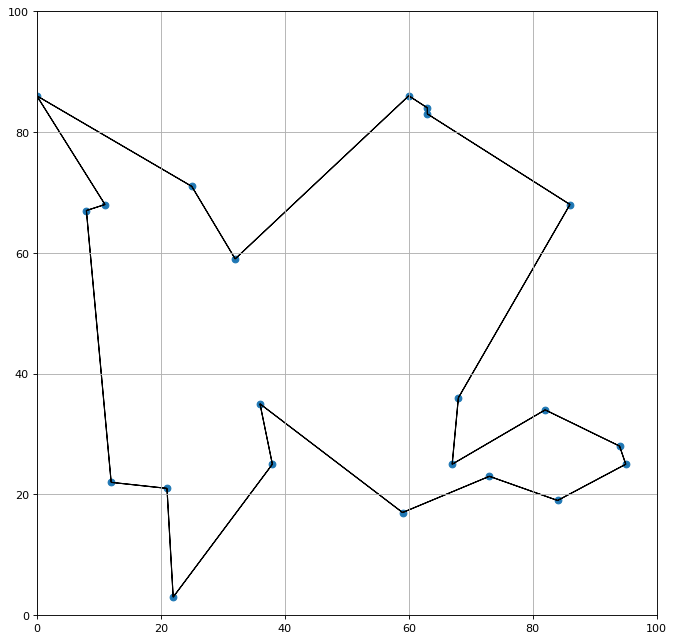

191	385   	439.316	101.893	398.432	1017.16


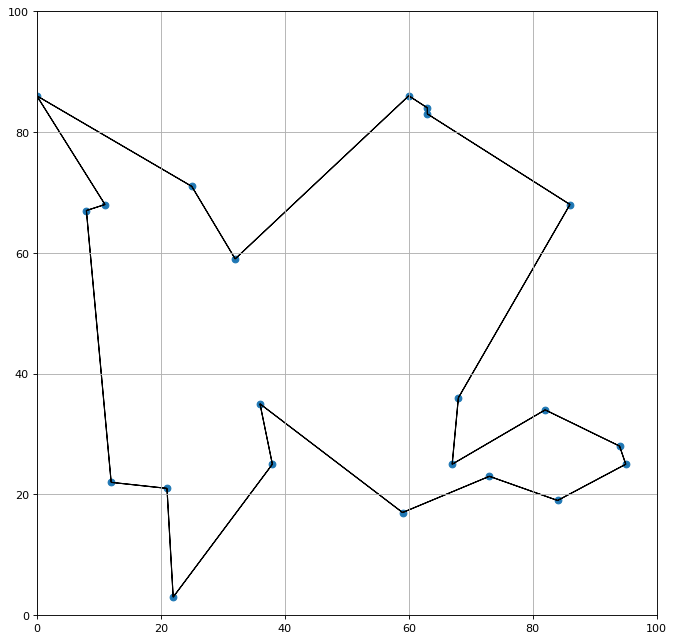

192	401   	445.482	109.146	398.432	995.002


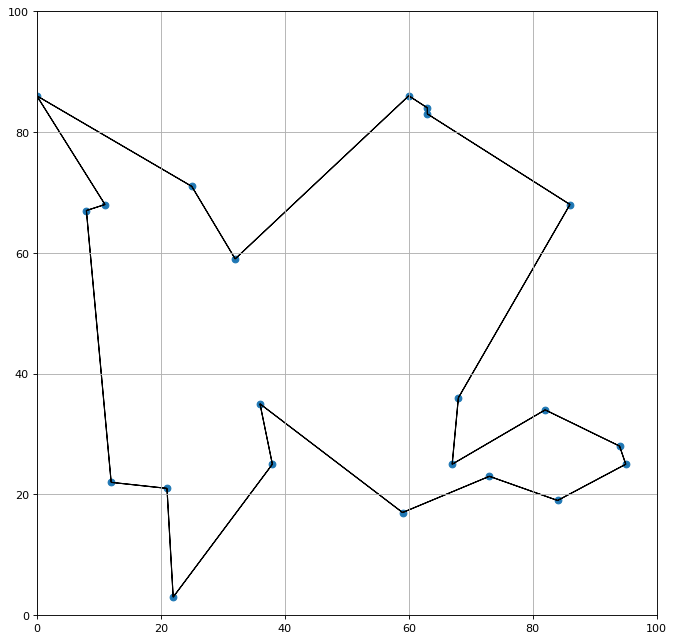

193	390   	448.422	116.587	398.432	1018.26


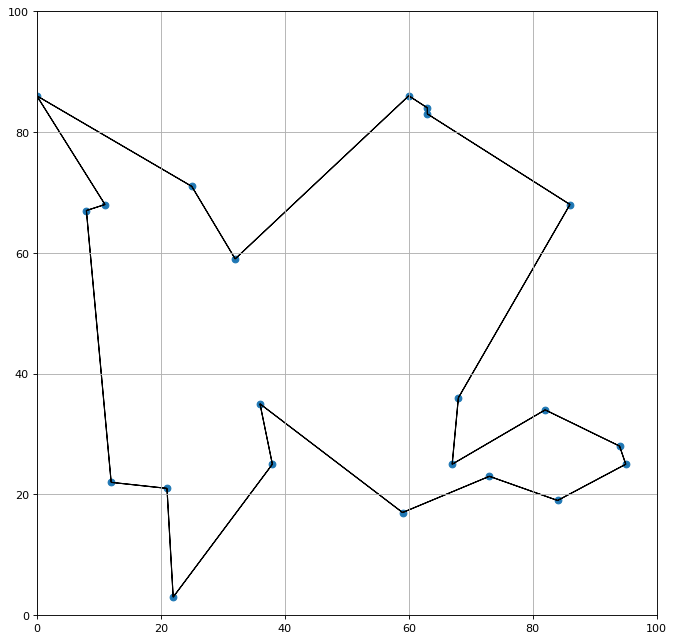

194	393   	437.228	95.198 	398.432	981.355


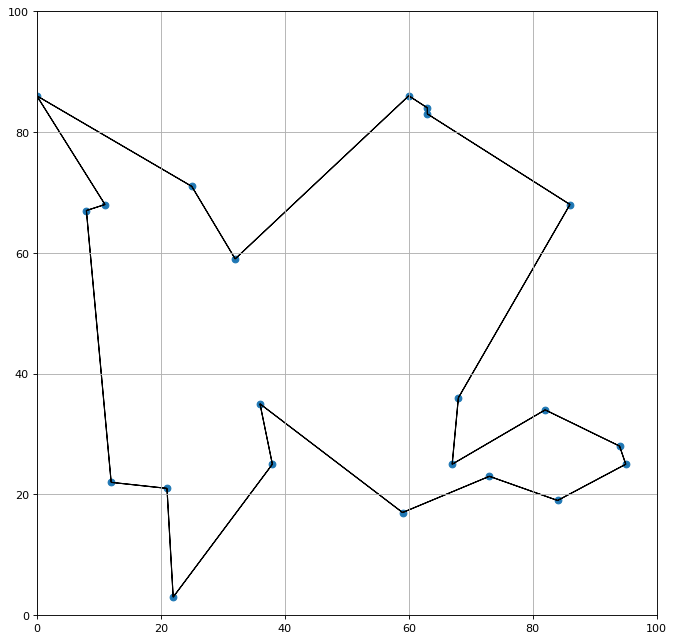

195	398   	437.73 	100.018	398.432	1019.42


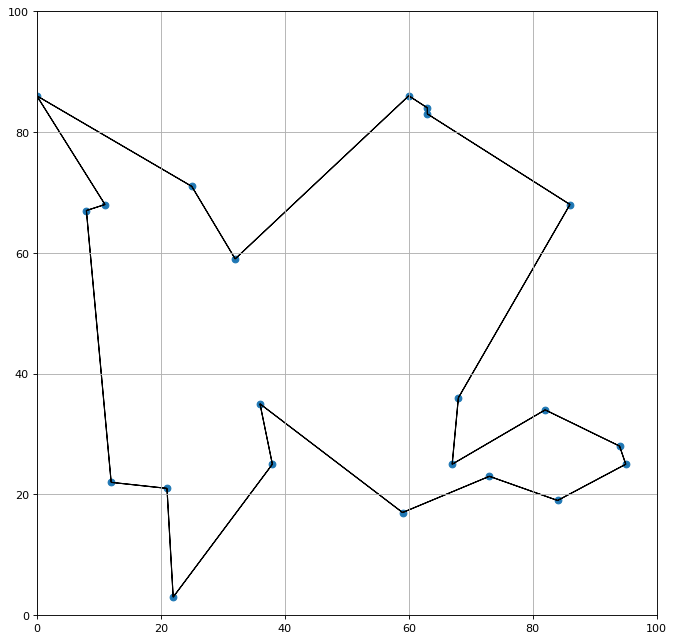

196	402   	446.615	107.802	398.432	1128.66


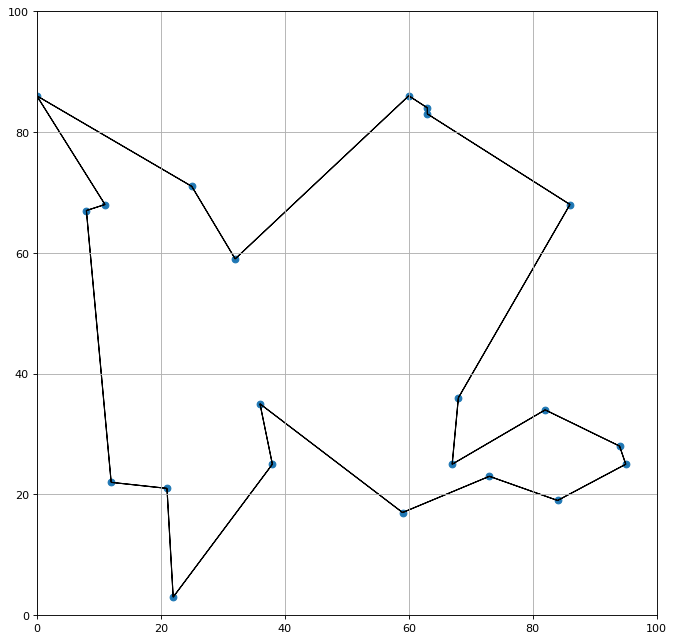

197	377   	442.813	104.226	398.432	1010.15


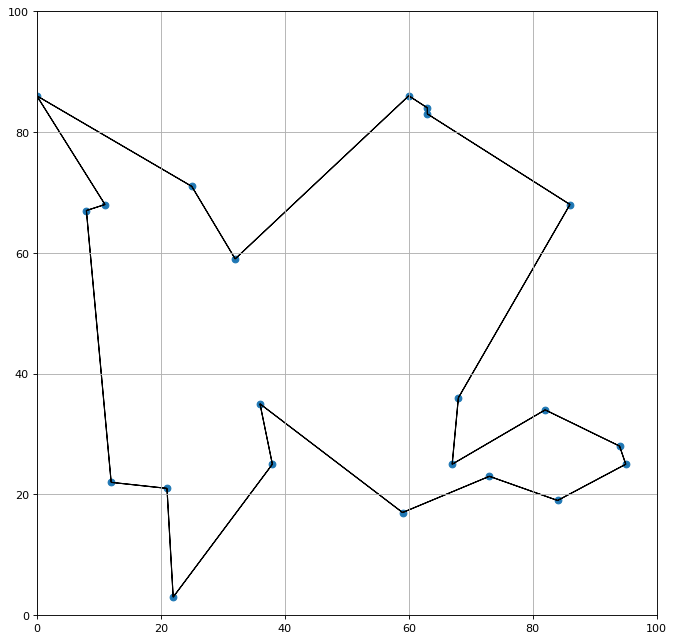

198	396   	441.784	101.64 	398.432	949.781


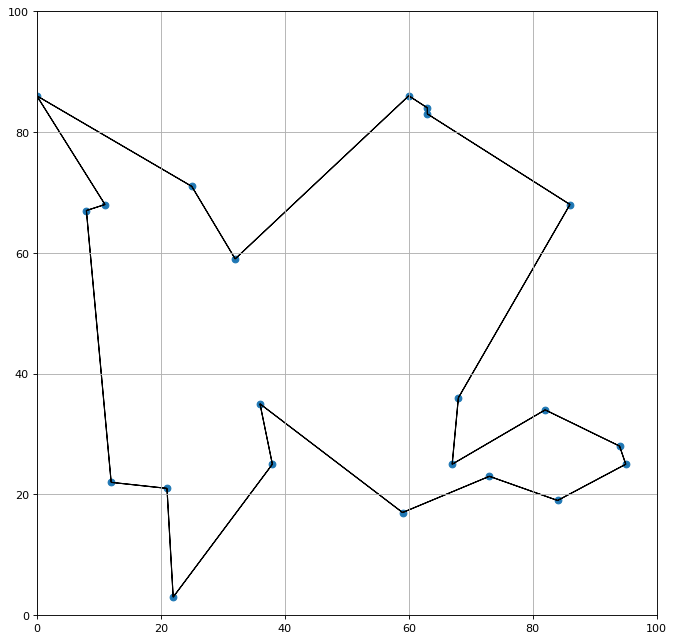

199	398   	443.442	106.072	398.432	965.897


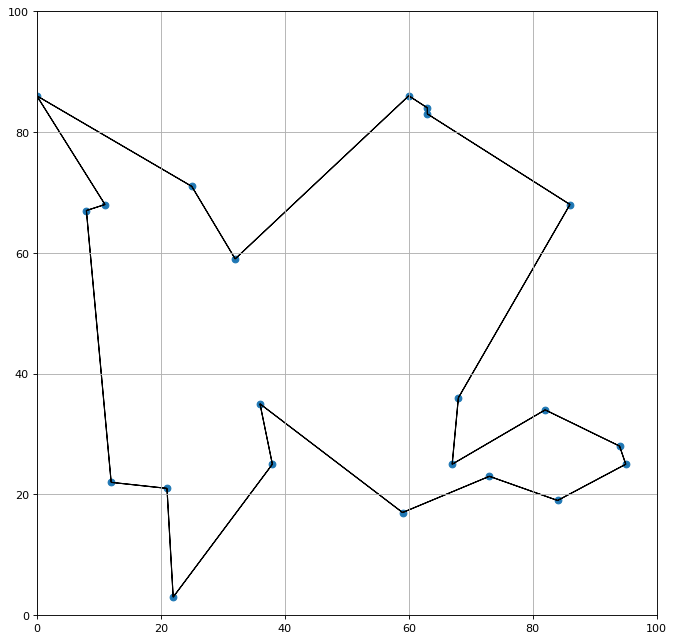

200	414   	444.689	106.335	398.432	1052.59


In [11]:
#@title Evolution
pop = toolbox.population(n=500)

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

eaSimple(pop, toolbox, 0.7, 0.3, 200, stats=stats, halloffame=hof)